In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

"Benchmark all the baseline agents\non a given CyberBattleSim environment and compare\nthem to the dumb 'random agent' baseline.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n"

In [2]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Papermill notebook parameters
gymid = "CyberBattleChain-v0"
env_size = 10
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
plots_dir = "output/plots"

In [5]:
# Parameters
gymid = "CyberBattleChain-v0"
iteration_count = 2000
training_episode_count = 20
eval_episode_count = 3
maximum_node_count = 20
maximum_total_credentials = 20
env_size = 10
plots_dir = "notebooks/output/benchmark/plots"


In [6]:
os.makedirs(plots_dir, exist_ok=True)

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast

gym_env = cast(CyberBattleEnv, _gym_env.unwrapped)
assert isinstance(gym_env, CyberBattleEnv), f"Expected CyberBattleEnv, got {type(gym_env)}"

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/envs/registration.py:481: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes']
  logger.warn(


In [7]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, t, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=2000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  132.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  140.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  140.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  146.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  146.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:  152.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:  152.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  252.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  252.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  266.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  266.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:  366.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:  366.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 35|reward:  377.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 35|reward:  377.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  379.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  379.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  385.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  385.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:  387.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:  387.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  395.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  395.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 62|reward:  401.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 62|reward:  401.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 1|Iteration 74|reward:  410.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 1|Iteration 74|reward:  410.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:  510.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:  510.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 87|reward:  524.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 87|reward:  524.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 1|Iteration 91|reward:  528.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 1|Iteration 91|reward:  528.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  530.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  530.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  630.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  630.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 118|reward:  636.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 118|reward:  636.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 1|Iteration 124|reward:  647.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 1|Iteration 124|reward:  647.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 1|Iteration 138|reward:  655.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 1|Iteration 138|reward:  655.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 1|Iteration 144|reward:  661.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 1|Iteration 144|reward:  661.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 1|Iteration 152|reward:  670.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 1|Iteration 152|reward:  670.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 1|Iteration 156|reward:  770.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 1|Iteration 156|reward:  770.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 1|Iteration 188|reward:  781.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 1|Iteration 188|reward:  781.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 1|Iteration 198|reward:  790.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 1|Iteration 198|reward:  790.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 1|Iteration 199|reward:  890.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 1|Iteration 199|reward:  890.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 1|Iteration 202|reward:  892.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 1|Iteration 202|reward:  892.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 1|Iteration 226|reward:  906.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 1|Iteration 226|reward:  906.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 1|Iteration 230|reward:  914.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 1|Iteration 230|reward:  914.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 1|Iteration 239|reward: 1014.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 1|Iteration 239|reward: 1014.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 1|Iteration 240|reward: 1020.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 1|Iteration 240|reward: 1020.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 1|Iteration 244|reward: 1026.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 1|Iteration 244|reward: 1026.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 1|Iteration 255|reward: 1037.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 1|Iteration 255|reward: 1037.0|last_reward_at:  255|Elapsed Time: 0:00:00||

Episode 1|Iteration 256|reward: 1039.0|last_reward_at:  255|Elapsed Time: 0:00:00||

Episode 1|Iteration 256|reward: 1039.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 1|Iteration 279|reward: 1039.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 1|Iteration 302|reward: 1043.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 1|Iteration 302|reward: 1043.0|last_reward_at:  302|Elapsed Time: 0:00:00||

Episode 1|Iteration 309|reward: 1045.0|last_reward_at:  302|Elapsed Time: 0:00:00||

Episode 1|Iteration 309|reward: 1045.0|last_reward_at:  309|Elapsed Time: 0:00:00||

Episode 1|Iteration 330|reward: 1045.0|last_reward_at:  309|Elapsed Time: 0:00:00||

Episode 1|Iteration 343|reward: 1054.0|last_reward_at:  309|Elapsed Time: 0:00:00||

Episode 1|Iteration 343|reward: 1054.0|last_reward_at:  343|Elapsed Time: 0:00:00||

Episode 1|Iteration 347|reward: 1154.0|last_reward_at:  343|Elapsed Time: 0:00:00||

Episode 1|Iteration 347|reward: 1154.0|last_reward_at:  347|Elapsed Time: 0:00:00||

Episode 1|Iteration 379|reward: 1165.0|last_reward_at:  347|Elapsed Time: 0:00:00||

Episode 1|Iteration 379|reward: 1165.0|last_reward_at:  379|Elapsed Time: 0:00:00||

Episode 1|Iteration 389|reward: 1171.0|last_reward_at:  379|Elapsed Time: 0:00:01||

Episode 1|Iteration 389|reward: 1171.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 1|Iteration 391|reward: 1180.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 1|Iteration 391|reward: 1180.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 1|Iteration 403|reward: 1188.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 1|Iteration 403|reward: 1188.0|last_reward_at:  403|Elapsed Time: 0:00:01||

Episode 1|Iteration 406|reward: 1288.0|last_reward_at:  403|Elapsed Time: 0:00:01||

Episode 1|Iteration 406|reward: 1288.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 1|Iteration 431|reward: 1288.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 1|Iteration 436|reward: 1299.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 1|Iteration 436|reward: 1299.0|last_reward_at:  436|Elapsed Time: 0:00:01||

Episode 1|Iteration 450|reward: 1308.0|last_reward_at:  436|Elapsed Time: 0:00:01||

Episode 1|Iteration 450|reward: 1308.0|last_reward_at:  450|Elapsed Time: 0:00:01||

Episode 1|Iteration 458|reward: 6308.0|last_reward_at:  450|Elapsed Time: 0:00:01||

Episode 1|Iteration 458|reward: 6308.0|last_reward_at:  458|Elapsed Time: 0:00:01||

  Episode 1 ended at t=458 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/180 (0.10)
    explore-remote: 20/226 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 40
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8643, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  127.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  127.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  135.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  135.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  144.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  144.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  146.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  146.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  152.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  152.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  252.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  252.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  263.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  263.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  267.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  267.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  269.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  269.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:  278.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:  278.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  378.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  378.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 87|reward:  389.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 87|reward:  389.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 2|Iteration 101|reward:  395.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 2|Iteration 101|reward:  395.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 2|Iteration 112|reward:  404.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 2|Iteration 112|reward:  404.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  504.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  504.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  510.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  510.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 160|reward:  521.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 160|reward:  521.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 2|Iteration 175|reward:  525.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 2|Iteration 175|reward:  525.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 2|Iteration 184|reward:  527.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 2|Iteration 184|reward:  527.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  527.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 2|Iteration 237|reward:  536.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 2|Iteration 237|reward:  536.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 2|Iteration 239|reward:  636.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 2|Iteration 239|reward:  636.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 2|Iteration 253|reward:  647.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 2|Iteration 253|reward:  647.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 2|Iteration 274|reward:  656.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 2|Iteration 274|reward:  656.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 2|Iteration 279|reward:  662.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 2|Iteration 279|reward:  662.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 2|Iteration 288|reward:  670.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 2|Iteration 288|reward:  670.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 2|Iteration 293|reward:  770.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 2|Iteration 293|reward:  770.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 2|Iteration 300|reward:  781.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 2|Iteration 300|reward:  781.0|last_reward_at:  300|Elapsed Time: 0:00:00||

Episode 2|Iteration 303|reward:  785.0|last_reward_at:  300|Elapsed Time: 0:00:00||

Episode 2|Iteration 303|reward:  785.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 2|Iteration 306|reward:  787.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 2|Iteration 306|reward:  787.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 2|Iteration 330|reward:  787.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 2|Iteration 355|reward:  787.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 2|Iteration 357|reward:  796.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 2|Iteration 357|reward:  796.0|last_reward_at:  357|Elapsed Time: 0:00:00||

Episode 2|Iteration 361|reward:  896.0|last_reward_at:  357|Elapsed Time: 0:00:00||

Episode 2|Iteration 361|reward:  896.0|last_reward_at:  361|Elapsed Time: 0:00:00||

Episode 2|Iteration 362|reward:  907.0|last_reward_at:  361|Elapsed Time: 0:00:00||

Episode 2|Iteration 362|reward:  907.0|last_reward_at:  362|Elapsed Time: 0:00:00||

Episode 2|Iteration 380|reward:  907.0|last_reward_at:  362|Elapsed Time: 0:00:00||

Episode 2|Iteration 384|reward:  916.0|last_reward_at:  362|Elapsed Time: 0:00:00||

Episode 2|Iteration 384|reward:  916.0|last_reward_at:  384|Elapsed Time: 0:00:00||

Episode 2|Iteration 386|reward:  924.0|last_reward_at:  384|Elapsed Time: 0:00:00||

Episode 2|Iteration 386|reward:  924.0|last_reward_at:  386|Elapsed Time: 0:00:00||

Episode 2|Iteration 393|reward: 1024.0|last_reward_at:  386|Elapsed Time: 0:00:00||

Episode 2|Iteration 393|reward: 1024.0|last_reward_at:  393|Elapsed Time: 0:00:00||

Episode 2|Iteration 431|reward: 1024.0|last_reward_at:  393|Elapsed Time: 0:00:00||

Episode 2|Iteration 449|reward: 1030.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 2|Iteration 449|reward: 1030.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 2|Iteration 454|reward: 1041.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 2|Iteration 454|reward: 1041.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 2|Iteration 457|reward: 1050.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 2|Iteration 457|reward: 1050.0|last_reward_at:  457|Elapsed Time: 0:00:01||

Episode 2|Iteration 462|reward: 1150.0|last_reward_at:  457|Elapsed Time: 0:00:01||

Episode 2|Iteration 462|reward: 1150.0|last_reward_at:  462|Elapsed Time: 0:00:01||

Episode 2|Iteration 482|reward: 1150.0|last_reward_at:  462|Elapsed Time: 0:00:01||

Episode 2|Iteration 484|reward: 1152.0|last_reward_at:  462|Elapsed Time: 0:00:01||

Episode 2|Iteration 484|reward: 1152.0|last_reward_at:  484|Elapsed Time: 0:00:01||

Episode 2|Iteration 486|reward: 1154.0|last_reward_at:  484|Elapsed Time: 0:00:01||

Episode 2|Iteration 486|reward: 1154.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 2|Iteration 507|reward: 1154.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 2|Iteration 532|reward: 1154.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 2|Iteration 557|reward: 1154.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 2|Iteration 559|reward: 1165.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 2|Iteration 559|reward: 1165.0|last_reward_at:  559|Elapsed Time: 0:00:01||

Episode 2|Iteration 560|reward: 1171.0|last_reward_at:  559|Elapsed Time: 0:00:01||

Episode 2|Iteration 560|reward: 1171.0|last_reward_at:  560|Elapsed Time: 0:00:01||

Episode 2|Iteration 576|reward: 1180.0|last_reward_at:  560|Elapsed Time: 0:00:01||

Episode 2|Iteration 576|reward: 1180.0|last_reward_at:  576|Elapsed Time: 0:00:01||

Episode 2|Iteration 587|reward: 1280.0|last_reward_at:  576|Elapsed Time: 0:00:01||

Episode 2|Iteration 587|reward: 1280.0|last_reward_at:  587|Elapsed Time: 0:00:01||

Episode 2|Iteration 607|reward: 1286.0|last_reward_at:  587|Elapsed Time: 0:00:01||

Episode 2|Iteration 607|reward: 1286.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 2|Iteration 633|reward: 1286.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 2|Iteration 655|reward: 1300.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 2|Iteration 655|reward: 1300.0|last_reward_at:  655|Elapsed Time: 0:00:01||

Episode 2|Iteration 656|reward: 6300.0|last_reward_at:  655|Elapsed Time: 0:00:01||

Episode 2|Iteration 656|reward: 6300.0|last_reward_at:  656|Elapsed Time: 0:00:01||

  Episode 2 ended at t=656 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/266 (0.07)
    explore-remote: 20/339 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 93
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8157, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  125.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  125.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  127.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  127.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  133.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  133.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  141.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  141.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  143.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  152.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  152.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  252.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  252.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:  263.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:  263.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 67|reward:  265.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 67|reward:  265.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 68|reward:  274.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 68|reward:  274.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 77|reward:  374.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 77|reward:  374.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward:  385.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward:  385.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 3|Iteration 87|reward:  393.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 3|Iteration 87|reward:  393.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 3|Iteration 117|reward:  399.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 3|Iteration 117|reward:  399.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 3|Iteration 139|reward:  408.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 3|Iteration 139|reward:  408.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 3|Iteration 143|reward:  508.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 3|Iteration 143|reward:  508.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 3|Iteration 149|reward:  522.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 3|Iteration 149|reward:  522.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 3|Iteration 151|reward:  524.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 3|Iteration 151|reward:  524.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:  624.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:  624.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 3|Iteration 162|reward:  638.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 3|Iteration 162|reward:  638.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 3|Iteration 164|reward:  738.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 3|Iteration 164|reward:  738.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 3|Iteration 170|reward:  740.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 3|Iteration 170|reward:  740.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 3|Iteration 176|reward:  746.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 3|Iteration 176|reward:  746.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 3|Iteration 179|reward:  752.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 3|Iteration 179|reward:  752.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 3|Iteration 191|reward:  766.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 3|Iteration 191|reward:  766.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 3|Iteration 193|reward:  768.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 3|Iteration 193|reward:  768.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 3|Iteration 195|reward:  772.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 3|Iteration 195|reward:  772.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 3|Iteration 199|reward:  872.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 3|Iteration 199|reward:  872.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward:  874.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward:  874.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 3|Iteration 203|reward:  880.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 3|Iteration 203|reward:  880.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 3|Iteration 210|reward:  886.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 3|Iteration 210|reward:  886.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 3|Iteration 244|reward:  886.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 3|Iteration 268|reward:  886.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 3|Iteration 289|reward:  892.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 3|Iteration 289|reward:  892.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 3|Iteration 307|reward:  906.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 3|Iteration 307|reward:  906.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 3|Iteration 308|reward: 1006.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 3|Iteration 308|reward: 1006.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 3|Iteration 314|reward: 1017.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 3|Iteration 314|reward: 1017.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 3|Iteration 315|reward: 1021.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 3|Iteration 315|reward: 1021.0|last_reward_at:  315|Elapsed Time: 0:00:00||

Episode 3|Iteration 329|reward: 1023.0|last_reward_at:  315|Elapsed Time: 0:00:00||

Episode 3|Iteration 329|reward: 1023.0|last_reward_at:  329|Elapsed Time: 0:00:00||

Episode 3|Iteration 339|reward: 1029.0|last_reward_at:  329|Elapsed Time: 0:00:00||

Episode 3|Iteration 339|reward: 1029.0|last_reward_at:  339|Elapsed Time: 0:00:00||

Episode 3|Iteration 355|reward: 1029.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 3|Iteration 362|reward: 1035.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 3|Iteration 362|reward: 1035.0|last_reward_at:  362|Elapsed Time: 0:00:01||

Episode 3|Iteration 380|reward: 1035.0|last_reward_at:  362|Elapsed Time: 0:00:01||

Episode 3|Iteration 406|reward: 1035.0|last_reward_at:  362|Elapsed Time: 0:00:01||

Episode 3|Iteration 430|reward: 1041.0|last_reward_at:  362|Elapsed Time: 0:00:01||

Episode 3|Iteration 430|reward: 1041.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 3|Iteration 456|reward: 1041.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 3|Iteration 482|reward: 1041.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 3|Iteration 507|reward: 1041.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 3|Iteration 514|reward: 1050.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 3|Iteration 514|reward: 1050.0|last_reward_at:  514|Elapsed Time: 0:00:01||

Episode 3|Iteration 517|reward: 1150.0|last_reward_at:  514|Elapsed Time: 0:00:01||

Episode 3|Iteration 517|reward: 1150.0|last_reward_at:  517|Elapsed Time: 0:00:01||

Episode 3|Iteration 553|reward: 1150.0|last_reward_at:  517|Elapsed Time: 0:00:01||

Episode 3|Iteration 554|reward: 1164.0|last_reward_at:  517|Elapsed Time: 0:00:01||

Episode 3|Iteration 554|reward: 1164.0|last_reward_at:  554|Elapsed Time: 0:00:01||

Episode 3|Iteration 555|reward: 1264.0|last_reward_at:  554|Elapsed Time: 0:00:01||

Episode 3|Iteration 555|reward: 1264.0|last_reward_at:  555|Elapsed Time: 0:00:01||

Episode 3|Iteration 568|reward: 1270.0|last_reward_at:  555|Elapsed Time: 0:00:01||

Episode 3|Iteration 568|reward: 1270.0|last_reward_at:  568|Elapsed Time: 0:00:01||

Episode 3|Iteration 579|reward: 1284.0|last_reward_at:  568|Elapsed Time: 0:00:01||

Episode 3|Iteration 579|reward: 1284.0|last_reward_at:  579|Elapsed Time: 0:00:01||

Episode 3|Iteration 581|reward: 6284.0|last_reward_at:  579|Elapsed Time: 0:00:01||

Episode 3|Iteration 581|reward: 6284.0|last_reward_at:  581|Elapsed Time: 0:00:01||

  Episode 3 ended at t=581 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/228 (0.08)
    explore-remote: 19/304 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 116
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.7753, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:   20.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  120.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  120.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 60|reward:  134.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 60|reward:  134.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 4|Iteration 61|reward:  140.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 4|Iteration 61|reward:  140.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 4|Iteration 65|reward:  146.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 4|Iteration 65|reward:  146.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  246.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  246.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:  257.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:  257.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  263.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  263.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 86|reward:  265.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 86|reward:  265.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 4|Iteration 91|reward:  269.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 4|Iteration 91|reward:  269.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 4|Iteration 127|reward:  269.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 4|Iteration 142|reward:  278.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 4|Iteration 142|reward:  278.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 4|Iteration 145|reward:  378.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 4|Iteration 145|reward:  378.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 4|Iteration 156|reward:  389.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 4|Iteration 156|reward:  389.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 4|Iteration 158|reward:  398.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 4|Iteration 158|reward:  398.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 4|Iteration 161|reward:  498.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 4|Iteration 161|reward:  498.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:  509.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:  509.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 4|Iteration 178|reward:  515.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 4|Iteration 178|reward:  515.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 4|Iteration 179|reward:  517.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 4|Iteration 179|reward:  517.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 4|Iteration 184|reward:  526.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 4|Iteration 184|reward:  526.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 4|Iteration 190|reward:  626.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 4|Iteration 190|reward:  626.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 4|Iteration 199|reward:  628.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 4|Iteration 199|reward:  628.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 4|Iteration 211|reward:  642.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 4|Iteration 211|reward:  642.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 4|Iteration 214|reward:  742.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 4|Iteration 214|reward:  742.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 4|Iteration 218|reward:  748.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 4|Iteration 218|reward:  748.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 4|Iteration 220|reward:  754.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 4|Iteration 220|reward:  754.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 4|Iteration 227|reward:  768.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 4|Iteration 227|reward:  768.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 4|Iteration 230|reward:  868.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 4|Iteration 230|reward:  868.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 4|Iteration 233|reward:  870.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 4|Iteration 233|reward:  870.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 4|Iteration 239|reward:  884.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 4|Iteration 239|reward:  884.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 4|Iteration 240|reward:  890.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 4|Iteration 240|reward:  890.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 4|Iteration 243|reward:  892.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 4|Iteration 243|reward:  892.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 4|Iteration 245|reward:  992.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 4|Iteration 245|reward:  992.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 259|reward:  998.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 259|reward:  998.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 4|Iteration 262|reward: 1009.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 4|Iteration 262|reward: 1009.0|last_reward_at:  262|Elapsed Time: 0:00:00||

Episode 4|Iteration 271|reward: 1015.0|last_reward_at:  262|Elapsed Time: 0:00:00||

Episode 4|Iteration 271|reward: 1015.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 4|Iteration 284|reward: 1021.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 4|Iteration 284|reward: 1021.0|last_reward_at:  284|Elapsed Time: 0:00:00||

Episode 4|Iteration 288|reward: 1025.0|last_reward_at:  284|Elapsed Time: 0:00:00||

Episode 4|Iteration 288|reward: 1025.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 4|Iteration 320|reward: 1025.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 4|Iteration 355|reward: 1025.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 4|Iteration 358|reward: 1031.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 4|Iteration 358|reward: 1031.0|last_reward_at:  358|Elapsed Time: 0:00:00||

Episode 4|Iteration 380|reward: 1031.0|last_reward_at:  358|Elapsed Time: 0:00:00||

Episode 4|Iteration 389|reward: 1033.0|last_reward_at:  358|Elapsed Time: 0:00:00||

Episode 4|Iteration 389|reward: 1033.0|last_reward_at:  389|Elapsed Time: 0:00:00||

Episode 4|Iteration 406|reward: 1033.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 4|Iteration 431|reward: 1033.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 4|Iteration 436|reward: 1039.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 4|Iteration 436|reward: 1039.0|last_reward_at:  436|Elapsed Time: 0:00:01||

Episode 4|Iteration 456|reward: 1039.0|last_reward_at:  436|Elapsed Time: 0:00:01||

Episode 4|Iteration 482|reward: 1039.0|last_reward_at:  436|Elapsed Time: 0:00:01||

Episode 4|Iteration 507|reward: 1039.0|last_reward_at:  436|Elapsed Time: 0:00:01||

Episode 4|Iteration 517|reward: 1048.0|last_reward_at:  436|Elapsed Time: 0:00:01||

Episode 4|Iteration 517|reward: 1048.0|last_reward_at:  517|Elapsed Time: 0:00:01||

Episode 4|Iteration 518|reward: 1148.0|last_reward_at:  517|Elapsed Time: 0:00:01||

Episode 4|Iteration 518|reward: 1148.0|last_reward_at:  518|Elapsed Time: 0:00:01||

Episode 4|Iteration 530|reward: 1162.0|last_reward_at:  518|Elapsed Time: 0:00:01||

Episode 4|Iteration 530|reward: 1162.0|last_reward_at:  530|Elapsed Time: 0:00:01||

Episode 4|Iteration 531|reward: 1262.0|last_reward_at:  530|Elapsed Time: 0:00:01||

Episode 4|Iteration 531|reward: 1262.0|last_reward_at:  531|Elapsed Time: 0:00:01||

Episode 4|Iteration 553|reward: 1268.0|last_reward_at:  531|Elapsed Time: 0:00:01||

Episode 4|Iteration 553|reward: 1268.0|last_reward_at:  553|Elapsed Time: 0:00:01||

Episode 4|Iteration 556|reward: 1274.0|last_reward_at:  553|Elapsed Time: 0:00:01||

Episode 4|Iteration 556|reward: 1274.0|last_reward_at:  556|Elapsed Time: 0:00:01||

Episode 4|Iteration 573|reward: 1285.0|last_reward_at:  556|Elapsed Time: 0:00:01||

Episode 4|Iteration 573|reward: 1285.0|last_reward_at:  573|Elapsed Time: 0:00:01||

Episode 4|Iteration 577|reward: 1294.0|last_reward_at:  573|Elapsed Time: 0:00:01||

Episode 4|Iteration 577|reward: 1294.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 4|Iteration 578|reward: 6294.0|last_reward_at:  577|Elapsed Time: 0:00:01||

Episode 4|Iteration 578|reward: 6294.0|last_reward_at:  578|Elapsed Time: 0:00:01||

  Episode 4 ended at t=578 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/209 (0.09)
    explore-remote: 19/318 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 116
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.7374, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  134.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  234.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  234.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  240.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  240.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  246.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  246.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  257.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  257.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  261.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  261.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  263.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  263.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  269.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  269.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  278.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  278.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  378.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  378.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:  389.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:  389.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 5|Iteration 67|reward:  395.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 5|Iteration 67|reward:  395.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:  404.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:  404.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 73|reward:  504.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 73|reward:  504.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  515.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  515.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 99|reward:  517.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 99|reward:  517.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 5|Iteration 103|reward:  523.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 5|Iteration 103|reward:  523.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 5|Iteration 118|reward:  527.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 5|Iteration 118|reward:  527.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 5|Iteration 147|reward:  536.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 5|Iteration 147|reward:  536.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 5|Iteration 150|reward:  636.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 5|Iteration 150|reward:  636.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 5|Iteration 178|reward:  636.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 5|Iteration 184|reward:  650.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 5|Iteration 184|reward:  650.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 5|Iteration 191|reward:  750.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 5|Iteration 191|reward:  750.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 5|Iteration 203|reward:  756.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 5|Iteration 203|reward:  756.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 5|Iteration 213|reward:  762.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 5|Iteration 213|reward:  762.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 5|Iteration 230|reward:  768.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 5|Iteration 230|reward:  768.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 5|Iteration 254|reward:  768.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 5|Iteration 272|reward:  782.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 5|Iteration 272|reward:  782.0|last_reward_at:  272|Elapsed Time: 0:00:00||

Episode 5|Iteration 289|reward:  784.0|last_reward_at:  272|Elapsed Time: 0:00:00||

Episode 5|Iteration 289|reward:  784.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 5|Iteration 291|reward:  884.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 5|Iteration 291|reward:  884.0|last_reward_at:  291|Elapsed Time: 0:00:00||

Episode 5|Iteration 293|reward:  886.0|last_reward_at:  291|Elapsed Time: 0:00:00||

Episode 5|Iteration 293|reward:  886.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 5|Iteration 324|reward:  900.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 5|Iteration 324|reward:  900.0|last_reward_at:  324|Elapsed Time: 0:00:00||

Episode 5|Iteration 328|reward: 1000.0|last_reward_at:  324|Elapsed Time: 0:00:00||

Episode 5|Iteration 328|reward: 1000.0|last_reward_at:  328|Elapsed Time: 0:00:00||

Episode 5|Iteration 348|reward: 1014.0|last_reward_at:  328|Elapsed Time: 0:00:00||

Episode 5|Iteration 348|reward: 1014.0|last_reward_at:  348|Elapsed Time: 0:00:00||

Episode 5|Iteration 351|reward: 1114.0|last_reward_at:  348|Elapsed Time: 0:00:00||

Episode 5|Iteration 351|reward: 1114.0|last_reward_at:  351|Elapsed Time: 0:00:00||

Episode 5|Iteration 354|reward: 1120.0|last_reward_at:  351|Elapsed Time: 0:00:00||

Episode 5|Iteration 354|reward: 1120.0|last_reward_at:  354|Elapsed Time: 0:00:00||

Episode 5|Iteration 359|reward: 1126.0|last_reward_at:  354|Elapsed Time: 0:00:00||

Episode 5|Iteration 359|reward: 1126.0|last_reward_at:  359|Elapsed Time: 0:00:00||

Episode 5|Iteration 367|reward: 1140.0|last_reward_at:  359|Elapsed Time: 0:00:00||

Episode 5|Iteration 367|reward: 1140.0|last_reward_at:  367|Elapsed Time: 0:00:00||

Episode 5|Iteration 368|reward: 1240.0|last_reward_at:  367|Elapsed Time: 0:00:00||

Episode 5|Iteration 368|reward: 1240.0|last_reward_at:  368|Elapsed Time: 0:00:00||

Episode 5|Iteration 373|reward: 1242.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 5|Iteration 373|reward: 1242.0|last_reward_at:  373|Elapsed Time: 0:00:01||

Episode 5|Iteration 375|reward: 1244.0|last_reward_at:  373|Elapsed Time: 0:00:01||

Episode 5|Iteration 375|reward: 1244.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 5|Iteration 381|reward: 1250.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 5|Iteration 381|reward: 1250.0|last_reward_at:  381|Elapsed Time: 0:00:01||

Episode 5|Iteration 383|reward: 1256.0|last_reward_at:  381|Elapsed Time: 0:00:01||

Episode 5|Iteration 383|reward: 1256.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 5|Iteration 401|reward: 1262.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 5|Iteration 401|reward: 1262.0|last_reward_at:  401|Elapsed Time: 0:00:01||

Episode 5|Iteration 405|reward: 1276.0|last_reward_at:  401|Elapsed Time: 0:00:01||

Episode 5|Iteration 405|reward: 1276.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 5|Iteration 410|reward: 1282.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 5|Iteration 410|reward: 1282.0|last_reward_at:  410|Elapsed Time: 0:00:01||

Episode 5|Iteration 411|reward: 6282.0|last_reward_at:  410|Elapsed Time: 0:00:01||

Episode 5|Iteration 411|reward: 6282.0|last_reward_at:  411|Elapsed Time: 0:00:01||

  Episode 5 ended at t=411 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/170 (0.10)
    explore-remote: 19/192 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 102
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.7117, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  132.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  132.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  232.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  232.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  238.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  238.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  244.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  244.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 44|reward:  258.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 44|reward:  258.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 6|Iteration 45|reward:  264.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 6|Iteration 45|reward:  264.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 6|Iteration 47|reward:  266.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 6|Iteration 47|reward:  266.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 6|Iteration 49|reward:  366.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 6|Iteration 49|reward:  366.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 6|Iteration 52|reward:  368.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 6|Iteration 52|reward:  368.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 6|Iteration 64|reward:  379.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 6|Iteration 64|reward:  379.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 6|Iteration 67|reward:  385.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 6|Iteration 67|reward:  385.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 6|Iteration 76|reward:  393.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 6|Iteration 76|reward:  393.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 6|Iteration 127|reward:  393.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 6|Iteration 132|reward:  399.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 6|Iteration 132|reward:  399.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 6|Iteration 164|reward:  408.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 6|Iteration 164|reward:  408.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 6|Iteration 165|reward:  508.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 6|Iteration 165|reward:  508.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 6|Iteration 203|reward:  508.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 6|Iteration 214|reward:  522.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 6|Iteration 214|reward:  522.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 6|Iteration 216|reward:  622.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 6|Iteration 216|reward:  622.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 6|Iteration 217|reward:  624.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 6|Iteration 217|reward:  624.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 6|Iteration 223|reward:  626.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 6|Iteration 223|reward:  626.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 6|Iteration 236|reward:  632.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 6|Iteration 236|reward:  632.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 6|Iteration 276|reward:  632.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 6|Iteration 279|reward:  643.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 6|Iteration 279|reward:  643.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 6|Iteration 288|reward:  651.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 6|Iteration 288|reward:  651.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 6|Iteration 304|reward:  651.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 6|Iteration 308|reward:  660.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 6|Iteration 308|reward:  660.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 6|Iteration 309|reward:  760.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 6|Iteration 309|reward:  760.0|last_reward_at:  309|Elapsed Time: 0:00:00||

Episode 6|Iteration 311|reward:  766.0|last_reward_at:  309|Elapsed Time: 0:00:00||

Episode 6|Iteration 311|reward:  766.0|last_reward_at:  311|Elapsed Time: 0:00:00||

Episode 6|Iteration 355|reward:  766.0|last_reward_at:  311|Elapsed Time: 0:00:00||

Episode 6|Iteration 380|reward:  766.0|last_reward_at:  311|Elapsed Time: 0:00:00||

Episode 6|Iteration 406|reward:  766.0|last_reward_at:  311|Elapsed Time: 0:00:00||

Episode 6|Iteration 407|reward:  777.0|last_reward_at:  311|Elapsed Time: 0:00:00||

Episode 6|Iteration 407|reward:  777.0|last_reward_at:  407|Elapsed Time: 0:00:00||

Episode 6|Iteration 417|reward:  786.0|last_reward_at:  407|Elapsed Time: 0:00:00||

Episode 6|Iteration 417|reward:  786.0|last_reward_at:  417|Elapsed Time: 0:00:00||

Episode 6|Iteration 418|reward:  886.0|last_reward_at:  417|Elapsed Time: 0:00:00||

Episode 6|Iteration 418|reward:  886.0|last_reward_at:  418|Elapsed Time: 0:00:00||

Episode 6|Iteration 419|reward:  888.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 6|Iteration 419|reward:  888.0|last_reward_at:  419|Elapsed Time: 0:00:01||

Episode 6|Iteration 433|reward:  902.0|last_reward_at:  419|Elapsed Time: 0:00:01||

Episode 6|Iteration 433|reward:  902.0|last_reward_at:  433|Elapsed Time: 0:00:01||

Episode 6|Iteration 437|reward: 1002.0|last_reward_at:  433|Elapsed Time: 0:00:01||

Episode 6|Iteration 437|reward: 1002.0|last_reward_at:  437|Elapsed Time: 0:00:01||

Episode 6|Iteration 441|reward: 1008.0|last_reward_at:  437|Elapsed Time: 0:00:01||

Episode 6|Iteration 441|reward: 1008.0|last_reward_at:  441|Elapsed Time: 0:00:01||

Episode 6|Iteration 470|reward: 1019.0|last_reward_at:  441|Elapsed Time: 0:00:01||

Episode 6|Iteration 470|reward: 1019.0|last_reward_at:  470|Elapsed Time: 0:00:01||

Episode 6|Iteration 483|reward: 1021.0|last_reward_at:  470|Elapsed Time: 0:00:01||

Episode 6|Iteration 483|reward: 1021.0|last_reward_at:  483|Elapsed Time: 0:00:01||

Episode 6|Iteration 496|reward: 1030.0|last_reward_at:  483|Elapsed Time: 0:00:01||

Episode 6|Iteration 496|reward: 1030.0|last_reward_at:  496|Elapsed Time: 0:00:01||

Episode 6|Iteration 497|reward: 1130.0|last_reward_at:  496|Elapsed Time: 0:00:01||

Episode 6|Iteration 497|reward: 1130.0|last_reward_at:  497|Elapsed Time: 0:00:01||

Episode 6|Iteration 503|reward: 1132.0|last_reward_at:  497|Elapsed Time: 0:00:01||

Episode 6|Iteration 503|reward: 1132.0|last_reward_at:  503|Elapsed Time: 0:00:01||

Episode 6|Iteration 504|reward: 1138.0|last_reward_at:  503|Elapsed Time: 0:00:01||

Episode 6|Iteration 504|reward: 1138.0|last_reward_at:  504|Elapsed Time: 0:00:01||

Episode 6|Iteration 506|reward: 1140.0|last_reward_at:  504|Elapsed Time: 0:00:01||

Episode 6|Iteration 506|reward: 1140.0|last_reward_at:  506|Elapsed Time: 0:00:01||

Episode 6|Iteration 517|reward: 1146.0|last_reward_at:  506|Elapsed Time: 0:00:01||

Episode 6|Iteration 517|reward: 1146.0|last_reward_at:  517|Elapsed Time: 0:00:01||

Episode 6|Iteration 532|reward: 1146.0|last_reward_at:  517|Elapsed Time: 0:00:01||

Episode 6|Iteration 557|reward: 1146.0|last_reward_at:  517|Elapsed Time: 0:00:01||

Episode 6|Iteration 583|reward: 1146.0|last_reward_at:  517|Elapsed Time: 0:00:01||

Episode 6|Iteration 608|reward: 1146.0|last_reward_at:  517|Elapsed Time: 0:00:01||

Episode 6|Iteration 609|reward: 1157.0|last_reward_at:  517|Elapsed Time: 0:00:01||

Episode 6|Iteration 609|reward: 1157.0|last_reward_at:  609|Elapsed Time: 0:00:01||

Episode 6|Iteration 615|reward: 1163.0|last_reward_at:  609|Elapsed Time: 0:00:01||

Episode 6|Iteration 615|reward: 1163.0|last_reward_at:  615|Elapsed Time: 0:00:01||

Episode 6|Iteration 633|reward: 1163.0|last_reward_at:  615|Elapsed Time: 0:00:01||

Episode 6|Iteration 659|reward: 1163.0|last_reward_at:  615|Elapsed Time: 0:00:01||

Episode 6|Iteration 679|reward: 1171.0|last_reward_at:  615|Elapsed Time: 0:00:01||

Episode 6|Iteration 679|reward: 1171.0|last_reward_at:  679|Elapsed Time: 0:00:01||

Episode 6|Iteration 709|reward: 1171.0|last_reward_at:  679|Elapsed Time: 0:00:02||

Episode 6|Iteration 728|reward: 1180.0|last_reward_at:  679|Elapsed Time: 0:00:02||

Episode 6|Iteration 728|reward: 1180.0|last_reward_at:  728|Elapsed Time: 0:00:02||

Episode 6|Iteration 732|reward: 1280.0|last_reward_at:  728|Elapsed Time: 0:00:02||

Episode 6|Iteration 732|reward: 1280.0|last_reward_at:  732|Elapsed Time: 0:00:02||

Episode 6|Iteration 735|reward: 1291.0|last_reward_at:  732|Elapsed Time: 0:00:02||

Episode 6|Iteration 735|reward: 1291.0|last_reward_at:  735|Elapsed Time: 0:00:02||

Episode 6|Iteration 760|reward: 1291.0|last_reward_at:  735|Elapsed Time: 0:00:02||

Episode 6|Iteration 781|reward: 1300.0|last_reward_at:  735|Elapsed Time: 0:00:02||

Episode 6|Iteration 781|reward: 1300.0|last_reward_at:  781|Elapsed Time: 0:00:02||

Episode 6|Iteration 792|reward: 6300.0|last_reward_at:  781|Elapsed Time: 0:00:02||

Episode 6|Iteration 792|reward: 6300.0|last_reward_at:  792|Elapsed Time: 0:00:02||

  Episode 6 ended at t=792 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/299 (0.07)
    explore-remote: 20/441 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 203
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.6652, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  130.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  236.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  236.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  238.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  238.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward:  244.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward:  244.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  255.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  255.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 32|reward:  259.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 32|reward:  259.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 7|Iteration 39|reward:  261.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 7|Iteration 39|reward:  261.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:  270.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:  270.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 41|reward:  370.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 41|reward:  370.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 7|Iteration 43|reward:  376.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 7|Iteration 43|reward:  376.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 7|Iteration 48|reward:  390.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 7|Iteration 48|reward:  390.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  490.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  490.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 53|reward:  496.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 53|reward:  496.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 7|Iteration 61|reward:  502.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 7|Iteration 61|reward:  502.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 7|Iteration 62|reward:  516.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 7|Iteration 62|reward:  516.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 7|Iteration 63|reward:  616.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 7|Iteration 63|reward:  616.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 7|Iteration 66|reward:  622.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 7|Iteration 66|reward:  622.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 7|Iteration 82|reward:  633.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 7|Iteration 82|reward:  633.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 7|Iteration 84|reward:  639.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 7|Iteration 84|reward:  639.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 7|Iteration 92|reward:  647.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 7|Iteration 92|reward:  647.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 7|Iteration 96|reward:  649.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 7|Iteration 96|reward:  649.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 7|Iteration 106|reward:  655.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 7|Iteration 106|reward:  655.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 7|Iteration 127|reward:  655.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 7|Iteration 139|reward:  657.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 7|Iteration 139|reward:  657.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 7|Iteration 177|reward:  657.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 7|Iteration 188|reward:  666.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 7|Iteration 188|reward:  666.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 7|Iteration 189|reward:  766.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 7|Iteration 189|reward:  766.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 7|Iteration 228|reward:  766.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 7|Iteration 238|reward:  777.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 7|Iteration 238|reward:  777.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 7|Iteration 253|reward:  779.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 7|Iteration 253|reward:  779.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 7|Iteration 274|reward:  783.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 7|Iteration 274|reward:  783.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 7|Iteration 295|reward:  783.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 7|Iteration 324|reward:  783.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 7|Iteration 334|reward:  792.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 7|Iteration 334|reward:  792.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 7|Iteration 339|reward:  892.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 7|Iteration 339|reward:  892.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 7|Iteration 342|reward:  906.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 7|Iteration 342|reward:  906.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 7|Iteration 345|reward: 1006.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 7|Iteration 345|reward: 1006.0|last_reward_at:  345|Elapsed Time: 0:00:01||

Episode 7|Iteration 367|reward: 1012.0|last_reward_at:  345|Elapsed Time: 0:00:01||

Episode 7|Iteration 367|reward: 1012.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 7|Iteration 371|reward: 1018.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 7|Iteration 371|reward: 1018.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 7|Iteration 378|reward: 1029.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 7|Iteration 378|reward: 1029.0|last_reward_at:  378|Elapsed Time: 0:00:01||

Episode 7|Iteration 381|reward: 1031.0|last_reward_at:  378|Elapsed Time: 0:00:01||

Episode 7|Iteration 381|reward: 1031.0|last_reward_at:  381|Elapsed Time: 0:00:01||

Episode 7|Iteration 402|reward: 1035.0|last_reward_at:  381|Elapsed Time: 0:00:01||

Episode 7|Iteration 402|reward: 1035.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 7|Iteration 405|reward: 1041.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 7|Iteration 405|reward: 1041.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 7|Iteration 431|reward: 1041.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 7|Iteration 456|reward: 1041.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 7|Iteration 480|reward: 1041.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 7|Iteration 507|reward: 1041.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 7|Iteration 532|reward: 1041.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 7|Iteration 557|reward: 1041.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 7|Iteration 583|reward: 1041.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 7|Iteration 608|reward: 1041.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 7|Iteration 627|reward: 1050.0|last_reward_at:  405|Elapsed Time: 0:00:02||

Episode 7|Iteration 627|reward: 1050.0|last_reward_at:  627|Elapsed Time: 0:00:02||

Episode 7|Iteration 629|reward: 1150.0|last_reward_at:  627|Elapsed Time: 0:00:02||

Episode 7|Iteration 629|reward: 1150.0|last_reward_at:  629|Elapsed Time: 0:00:02||

Episode 7|Iteration 657|reward: 1150.0|last_reward_at:  629|Elapsed Time: 0:00:02||

Episode 7|Iteration 683|reward: 1164.0|last_reward_at:  629|Elapsed Time: 0:00:02||

Episode 7|Iteration 683|reward: 1164.0|last_reward_at:  683|Elapsed Time: 0:00:02||

Episode 7|Iteration 684|reward: 1264.0|last_reward_at:  683|Elapsed Time: 0:00:02||

Episode 7|Iteration 684|reward: 1264.0|last_reward_at:  684|Elapsed Time: 0:00:02||

Episode 7|Iteration 685|reward: 1270.0|last_reward_at:  684|Elapsed Time: 0:00:02||

Episode 7|Iteration 685|reward: 1270.0|last_reward_at:  685|Elapsed Time: 0:00:02||

Episode 7|Iteration 707|reward: 1270.0|last_reward_at:  685|Elapsed Time: 0:00:02||

Episode 7|Iteration 720|reward: 1276.0|last_reward_at:  685|Elapsed Time: 0:00:02||

Episode 7|Iteration 720|reward: 1276.0|last_reward_at:  720|Elapsed Time: 0:00:02||

Episode 7|Iteration 735|reward: 1276.0|last_reward_at:  720|Elapsed Time: 0:00:02||

Episode 7|Iteration 737|reward: 1290.0|last_reward_at:  720|Elapsed Time: 0:00:02||

Episode 7|Iteration 737|reward: 1290.0|last_reward_at:  737|Elapsed Time: 0:00:02||

Episode 7|Iteration 738|reward: 6290.0|last_reward_at:  737|Elapsed Time: 0:00:02||

Episode 7|Iteration 738|reward: 6290.0|last_reward_at:  738|Elapsed Time: 0:00:02||

  Episode 7 ended at t=738 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/301 (0.06)
    explore-remote: 19/387 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 268
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.6250, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  132.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:  232.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:  232.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward:  243.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward:  243.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  245.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  245.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:  251.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:  251.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward:  257.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward:  257.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward:  263.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward:  263.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 8|Iteration 45|reward:  267.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 8|Iteration 45|reward:  267.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 8|Iteration 53|reward:  276.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 8|Iteration 53|reward:  276.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 8|Iteration 54|reward:  376.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 8|Iteration 54|reward:  376.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 8|Iteration 60|reward:  390.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 8|Iteration 60|reward:  390.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 8|Iteration 61|reward:  490.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 8|Iteration 61|reward:  490.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 8|Iteration 62|reward:  496.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 8|Iteration 62|reward:  496.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 8|Iteration 72|reward:  510.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 8|Iteration 72|reward:  510.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 8|Iteration 73|reward:  610.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 8|Iteration 73|reward:  610.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 8|Iteration 89|reward:  612.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 8|Iteration 89|reward:  612.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 8|Iteration 96|reward:  623.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 8|Iteration 96|reward:  623.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 8|Iteration 97|reward:  625.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 8|Iteration 97|reward:  625.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 8|Iteration 112|reward:  633.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 8|Iteration 112|reward:  633.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 8|Iteration 126|reward:  639.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 8|Iteration 126|reward:  639.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 8|Iteration 129|reward:  645.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 8|Iteration 129|reward:  645.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 8|Iteration 132|reward:  651.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 8|Iteration 132|reward:  651.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 8|Iteration 135|reward:  660.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 8|Iteration 135|reward:  660.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 8|Iteration 136|reward:  760.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 8|Iteration 136|reward:  760.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 8|Iteration 140|reward:  766.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 8|Iteration 140|reward:  766.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 8|Iteration 170|reward:  777.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 8|Iteration 170|reward:  777.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 8|Iteration 182|reward:  781.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 8|Iteration 182|reward:  781.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 8|Iteration 191|reward:  790.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 8|Iteration 191|reward:  790.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 8|Iteration 192|reward:  890.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 8|Iteration 192|reward:  890.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 8|Iteration 208|reward:  904.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 8|Iteration 208|reward:  904.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 8|Iteration 210|reward: 1004.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 8|Iteration 210|reward: 1004.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 8|Iteration 213|reward: 1010.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 8|Iteration 213|reward: 1010.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 8|Iteration 214|reward: 1012.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 8|Iteration 214|reward: 1012.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 8|Iteration 228|reward: 1018.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 8|Iteration 228|reward: 1018.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 8|Iteration 245|reward: 1029.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 8|Iteration 245|reward: 1029.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 8|Iteration 250|reward: 1031.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 8|Iteration 250|reward: 1031.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 8|Iteration 251|reward: 1037.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 8|Iteration 251|reward: 1037.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 8|Iteration 257|reward: 1041.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 8|Iteration 257|reward: 1041.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 8|Iteration 267|reward: 1050.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 8|Iteration 267|reward: 1050.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 8|Iteration 271|reward: 1150.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 8|Iteration 271|reward: 1150.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 8|Iteration 282|reward: 1164.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 8|Iteration 282|reward: 1164.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 8|Iteration 290|reward: 1264.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 8|Iteration 290|reward: 1264.0|last_reward_at:  290|Elapsed Time: 0:00:01||

Episode 8|Iteration 299|reward: 1270.0|last_reward_at:  290|Elapsed Time: 0:00:01||

Episode 8|Iteration 299|reward: 1270.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 8|Iteration 300|reward: 1276.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 8|Iteration 300|reward: 1276.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 8|Iteration 321|reward: 1276.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 8|Iteration 323|reward: 1287.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 8|Iteration 323|reward: 1287.0|last_reward_at:  323|Elapsed Time: 0:00:01||

Episode 8|Iteration 329|reward: 1293.0|last_reward_at:  323|Elapsed Time: 0:00:01||

Episode 8|Iteration 329|reward: 1293.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 8|Iteration 342|reward: 1302.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 8|Iteration 342|reward: 1302.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 8|Iteration 347|reward: 6302.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 8|Iteration 347|reward: 6302.0|last_reward_at:  347|Elapsed Time: 0:00:01||

  Episode 8 ended at t=347 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/133 (0.14)
    explore-remote: 20/162 (0.11)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 116
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.6071, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  136.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  142.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  142.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  150.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  150.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  250.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  250.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  252.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  252.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  263.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  263.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 44|reward:  265.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 44|reward:  265.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 9|Iteration 47|reward:  269.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 9|Iteration 47|reward:  269.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  269.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 9|Iteration 89|reward:  278.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 9|Iteration 89|reward:  278.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 9|Iteration 92|reward:  378.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 9|Iteration 92|reward:  378.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 9|Iteration 107|reward:  389.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 9|Iteration 107|reward:  389.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 9|Iteration 108|reward:  395.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 9|Iteration 108|reward:  395.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 9|Iteration 118|reward:  404.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 9|Iteration 118|reward:  404.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 9|Iteration 119|reward:  412.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 9|Iteration 119|reward:  412.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 9|Iteration 121|reward:  512.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 9|Iteration 121|reward:  512.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 9|Iteration 131|reward:  526.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 9|Iteration 131|reward:  526.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 9|Iteration 132|reward:  626.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 9|Iteration 132|reward:  626.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 9|Iteration 136|reward:  632.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 9|Iteration 136|reward:  632.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 9|Iteration 166|reward:  646.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 9|Iteration 166|reward:  646.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 9|Iteration 167|reward:  648.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 9|Iteration 167|reward:  648.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 9|Iteration 169|reward:  748.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 9|Iteration 169|reward:  748.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 9|Iteration 174|reward:  754.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 9|Iteration 174|reward:  754.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 9|Iteration 179|reward:  756.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 9|Iteration 179|reward:  756.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 9|Iteration 192|reward:  762.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 9|Iteration 192|reward:  762.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 9|Iteration 201|reward:  776.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 9|Iteration 201|reward:  776.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 9|Iteration 203|reward:  876.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 9|Iteration 203|reward:  876.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 9|Iteration 206|reward:  887.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 9|Iteration 206|reward:  887.0|last_reward_at:  206|Elapsed Time: 0:00:00||

Episode 9|Iteration 213|reward:  896.0|last_reward_at:  206|Elapsed Time: 0:00:00||

Episode 9|Iteration 213|reward:  896.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 9|Iteration 215|reward:  996.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 9|Iteration 215|reward:  996.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 9|Iteration 227|reward: 1010.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 9|Iteration 227|reward: 1010.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 9|Iteration 228|reward: 1110.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 9|Iteration 228|reward: 1110.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 9|Iteration 230|reward: 1112.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 9|Iteration 230|reward: 1112.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 9|Iteration 233|reward: 1114.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 9|Iteration 233|reward: 1114.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 9|Iteration 234|reward: 1120.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 9|Iteration 234|reward: 1120.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 9|Iteration 236|reward: 1122.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 9|Iteration 236|reward: 1122.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 9|Iteration 254|reward: 1122.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 9|Iteration 259|reward: 1128.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 9|Iteration 259|reward: 1128.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 9|Iteration 260|reward: 1130.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 9|Iteration 260|reward: 1130.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 9|Iteration 279|reward: 1130.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 9|Iteration 287|reward: 1136.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 9|Iteration 287|reward: 1136.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 9|Iteration 290|reward: 1150.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 9|Iteration 290|reward: 1150.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 9|Iteration 292|reward: 1250.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 9|Iteration 292|reward: 1250.0|last_reward_at:  292|Elapsed Time: 0:00:00||

Episode 9|Iteration 294|reward: 1256.0|last_reward_at:  292|Elapsed Time: 0:00:00||

Episode 9|Iteration 294|reward: 1256.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 9|Iteration 296|reward: 1262.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 9|Iteration 296|reward: 1262.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 9|Iteration 298|reward: 1276.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 9|Iteration 298|reward: 1276.0|last_reward_at:  298|Elapsed Time: 0:00:00||

Episode 9|Iteration 302|reward: 6276.0|last_reward_at:  298|Elapsed Time: 0:00:00||

Episode 9|Iteration 302|reward: 6276.0|last_reward_at:  302|Elapsed Time: 0:00:00||

  Episode 9 ended at t=302 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/113 (0.13)
    explore-remote: 20/141 (0.12)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 118
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.5920, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  129.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  129.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:  135.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:  135.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward:  143.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward:  143.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 40|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 40|reward:  152.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 10|Iteration 42|reward:  252.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 10|Iteration 42|reward:  252.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 10|Iteration 44|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 10|Iteration 44|reward:  266.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 10|Iteration 45|reward:  366.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 10|Iteration 45|reward:  366.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 10|Iteration 57|reward:  368.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 10|Iteration 57|reward:  368.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 10|Iteration 58|reward:  370.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 10|Iteration 58|reward:  370.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 10|Iteration 60|reward:  384.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 10|Iteration 60|reward:  384.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 10|Iteration 61|reward:  484.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 10|Iteration 61|reward:  484.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 10|Iteration 65|reward:  490.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 10|Iteration 65|reward:  490.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 10|Iteration 85|reward:  496.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 10|Iteration 85|reward:  496.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 10|Iteration 94|reward:  510.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 10|Iteration 94|reward:  510.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 10|Iteration 96|reward:  610.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 10|Iteration 96|reward:  610.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 10|Iteration 102|reward:  616.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 10|Iteration 102|reward:  616.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 10|Iteration 104|reward:  618.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 10|Iteration 104|reward:  618.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 10|Iteration 106|reward:  620.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 10|Iteration 106|reward:  620.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 10|Iteration 127|reward:  620.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 10|Iteration 145|reward:  626.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 10|Iteration 145|reward:  626.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 10|Iteration 163|reward:  637.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 10|Iteration 163|reward:  637.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 10|Iteration 164|reward:  645.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 10|Iteration 164|reward:  645.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 10|Iteration 195|reward:  645.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 10|Iteration 202|reward:  651.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 10|Iteration 202|reward:  651.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 10|Iteration 228|reward:  651.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 10|Iteration 254|reward:  651.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 10|Iteration 257|reward:  657.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 10|Iteration 257|reward:  657.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 10|Iteration 279|reward:  657.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 10|Iteration 299|reward:  666.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 10|Iteration 299|reward:  666.0|last_reward_at:  299|Elapsed Time: 0:00:00||

Episode 10|Iteration 301|reward:  766.0|last_reward_at:  299|Elapsed Time: 0:00:00||

Episode 10|Iteration 301|reward:  766.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 10|Iteration 330|reward:  766.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 10|Iteration 331|reward:  780.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 10|Iteration 331|reward:  780.0|last_reward_at:  331|Elapsed Time: 0:00:00||

Episode 10|Iteration 334|reward:  880.0|last_reward_at:  331|Elapsed Time: 0:00:00||

Episode 10|Iteration 334|reward:  880.0|last_reward_at:  334|Elapsed Time: 0:00:00||

Episode 10|Iteration 338|reward:  882.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 10|Iteration 338|reward:  882.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 10|Iteration 341|reward:  884.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 10|Iteration 341|reward:  884.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 10|Iteration 369|reward:  898.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 10|Iteration 369|reward:  898.0|last_reward_at:  369|Elapsed Time: 0:00:01||

Episode 10|Iteration 370|reward:  904.0|last_reward_at:  369|Elapsed Time: 0:00:01||

Episode 10|Iteration 370|reward:  904.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 10|Iteration 374|reward: 1004.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 10|Iteration 374|reward: 1004.0|last_reward_at:  374|Elapsed Time: 0:00:01||

Episode 10|Iteration 375|reward: 1010.0|last_reward_at:  374|Elapsed Time: 0:00:01||

Episode 10|Iteration 375|reward: 1010.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 10|Iteration 380|reward: 1024.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 10|Iteration 380|reward: 1024.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 10|Iteration 385|reward: 1124.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 10|Iteration 385|reward: 1124.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 10|Iteration 391|reward: 1126.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 10|Iteration 391|reward: 1126.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 10|Iteration 394|reward: 1140.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 10|Iteration 394|reward: 1140.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 10|Iteration 395|reward: 1240.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 10|Iteration 395|reward: 1240.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 10|Iteration 398|reward: 1246.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 10|Iteration 398|reward: 1246.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 10|Iteration 404|reward: 1248.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 10|Iteration 404|reward: 1248.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 10|Iteration 420|reward: 1254.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 10|Iteration 420|reward: 1254.0|last_reward_at:  420|Elapsed Time: 0:00:01||

Episode 10|Iteration 423|reward: 1260.0|last_reward_at:  420|Elapsed Time: 0:00:01||

Episode 10|Iteration 423|reward: 1260.0|last_reward_at:  423|Elapsed Time: 0:00:01||

Episode 10|Iteration 443|reward: 1260.0|last_reward_at:  423|Elapsed Time: 0:00:01||

Episode 10|Iteration 445|reward: 1266.0|last_reward_at:  423|Elapsed Time: 0:00:01||

Episode 10|Iteration 445|reward: 1266.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 10|Iteration 471|reward: 1266.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 10|Iteration 482|reward: 1277.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 10|Iteration 482|reward: 1277.0|last_reward_at:  482|Elapsed Time: 0:00:01||

Episode 10|Iteration 507|reward: 1277.0|last_reward_at:  482|Elapsed Time: 0:00:01||

Episode 10|Iteration 531|reward: 1277.0|last_reward_at:  482|Elapsed Time: 0:00:01||

Episode 10|Iteration 543|reward: 1286.0|last_reward_at:  482|Elapsed Time: 0:00:01||

Episode 10|Iteration 543|reward: 1286.0|last_reward_at:  543|Elapsed Time: 0:00:01||

Episode 10|Iteration 546|reward: 6286.0|last_reward_at:  543|Elapsed Time: 0:00:01||

Episode 10|Iteration 546|reward: 6286.0|last_reward_at:  546|Elapsed Time: 0:00:01||

  Episode 10 ended at t=546 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/200 (0.09)
    explore-remote: 20/296 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 212
simulation ended


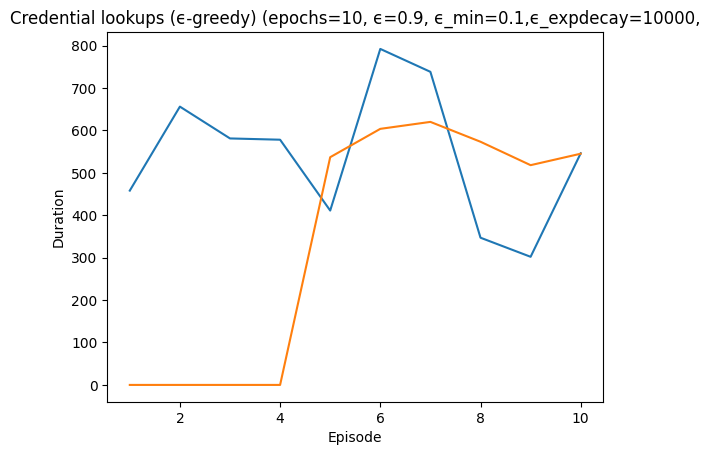

In [8]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)",
)

In [9]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning",
)

###### Tabular Q-learning
Learning with: episode_count=20,iteration_count=2000,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/20 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  114.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  116.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  127.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  127.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  136.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  136.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  236.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  236.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  247.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  247.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  253.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  253.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  259.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  259.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  263.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  263.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  272.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  272.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  274.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  274.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward:  374.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward:  374.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  385.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  385.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  391.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  391.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  393.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  393.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 55|reward:  402.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 55|reward:  402.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  502.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  502.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 82|reward:  516.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 82|reward:  516.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 93|reward:  520.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 93|reward:  520.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  526.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  526.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 122|reward:  626.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 122|reward:  626.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 1|Iteration 136|reward:  637.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 1|Iteration 136|reward:  637.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 1|Iteration 149|reward:  643.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 1|Iteration 149|reward:  643.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 1|Iteration 156|reward:  645.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 1|Iteration 156|reward:  645.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 1|Iteration 175|reward:  651.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 1|Iteration 175|reward:  651.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 1|Iteration 182|reward:  659.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 1|Iteration 182|reward:  659.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  659.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  659.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 1|Iteration 254|reward:  659.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 1|Iteration 279|reward:  659.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 1|Iteration 304|reward:  659.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 1|Iteration 330|reward:  659.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 1|Iteration 355|reward:  659.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 1|Iteration 365|reward:  668.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 1|Iteration 365|reward:  668.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 1|Iteration 371|reward:  768.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 1|Iteration 371|reward:  768.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 1|Iteration 397|reward:  768.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 1|Iteration 399|reward:  782.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 1|Iteration 399|reward:  782.0|last_reward_at:  399|Elapsed Time: 0:00:01||

Episode 1|Iteration 401|reward:  788.0|last_reward_at:  399|Elapsed Time: 0:00:01||

Episode 1|Iteration 401|reward:  788.0|last_reward_at:  401|Elapsed Time: 0:00:01||

Episode 1|Iteration 405|reward:  888.0|last_reward_at:  401|Elapsed Time: 0:00:01||

Episode 1|Iteration 405|reward:  888.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 1|Iteration 420|reward:  890.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 1|Iteration 420|reward:  890.0|last_reward_at:  420|Elapsed Time: 0:00:01||

Episode 1|Iteration 449|reward:  890.0|last_reward_at:  420|Elapsed Time: 0:00:01||

Episode 1|Iteration 478|reward:  890.0|last_reward_at:  420|Elapsed Time: 0:00:01||

Episode 1|Iteration 507|reward:  890.0|last_reward_at:  420|Elapsed Time: 0:00:01||

Episode 1|Iteration 532|reward:  890.0|last_reward_at:  420|Elapsed Time: 0:00:01||

Episode 1|Iteration 534|reward:  892.0|last_reward_at:  420|Elapsed Time: 0:00:01||

Episode 1|Iteration 534|reward:  892.0|last_reward_at:  534|Elapsed Time: 0:00:01||

Episode 1|Iteration 557|reward:  892.0|last_reward_at:  534|Elapsed Time: 0:00:01||

Episode 1|Iteration 583|reward:  892.0|last_reward_at:  534|Elapsed Time: 0:00:01||

Episode 1|Iteration 598|reward:  906.0|last_reward_at:  534|Elapsed Time: 0:00:01||

Episode 1|Iteration 598|reward:  906.0|last_reward_at:  598|Elapsed Time: 0:00:01||

Episode 1|Iteration 602|reward: 1006.0|last_reward_at:  598|Elapsed Time: 0:00:01||

Episode 1|Iteration 602|reward: 1006.0|last_reward_at:  602|Elapsed Time: 0:00:01||

Episode 1|Iteration 619|reward: 1012.0|last_reward_at:  602|Elapsed Time: 0:00:02||

Episode 1|Iteration 619|reward: 1012.0|last_reward_at:  619|Elapsed Time: 0:00:02||

Episode 1|Iteration 633|reward: 1012.0|last_reward_at:  619|Elapsed Time: 0:00:02||

Episode 1|Iteration 637|reward: 1018.0|last_reward_at:  619|Elapsed Time: 0:00:02||

Episode 1|Iteration 637|reward: 1018.0|last_reward_at:  637|Elapsed Time: 0:00:02||

Episode 1|Iteration 643|reward: 1032.0|last_reward_at:  637|Elapsed Time: 0:00:02||

Episode 1|Iteration 643|reward: 1032.0|last_reward_at:  643|Elapsed Time: 0:00:02||

Episode 1|Iteration 646|reward: 1132.0|last_reward_at:  643|Elapsed Time: 0:00:02||

Episode 1|Iteration 646|reward: 1132.0|last_reward_at:  646|Elapsed Time: 0:00:02||

Episode 1|Iteration 651|reward: 1143.0|last_reward_at:  646|Elapsed Time: 0:00:02||

Episode 1|Iteration 651|reward: 1143.0|last_reward_at:  651|Elapsed Time: 0:00:02||

Episode 1|Iteration 659|reward: 1149.0|last_reward_at:  651|Elapsed Time: 0:00:02||

Episode 1|Iteration 659|reward: 1149.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 1|Iteration 678|reward: 1157.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 1|Iteration 678|reward: 1157.0|last_reward_at:  678|Elapsed Time: 0:00:02||

Episode 1|Iteration 692|reward: 1159.0|last_reward_at:  678|Elapsed Time: 0:00:02||

Episode 1|Iteration 692|reward: 1159.0|last_reward_at:  692|Elapsed Time: 0:00:02||

Episode 1|Iteration 695|reward: 1168.0|last_reward_at:  692|Elapsed Time: 0:00:02||

Episode 1|Iteration 695|reward: 1168.0|last_reward_at:  695|Elapsed Time: 0:00:02||

Episode 1|Iteration 696|reward: 1268.0|last_reward_at:  695|Elapsed Time: 0:00:02||

Episode 1|Iteration 696|reward: 1268.0|last_reward_at:  696|Elapsed Time: 0:00:02||

Episode 1|Iteration 709|reward: 1268.0|last_reward_at:  696|Elapsed Time: 0:00:02||

Episode 1|Iteration 716|reward: 1274.0|last_reward_at:  696|Elapsed Time: 0:00:02||

Episode 1|Iteration 716|reward: 1274.0|last_reward_at:  716|Elapsed Time: 0:00:02||

Episode 1|Iteration 735|reward: 1274.0|last_reward_at:  716|Elapsed Time: 0:00:02||

Episode 1|Iteration 736|reward: 1285.0|last_reward_at:  716|Elapsed Time: 0:00:02||

Episode 1|Iteration 736|reward: 1285.0|last_reward_at:  736|Elapsed Time: 0:00:02||

Episode 1|Iteration 742|reward: 1294.0|last_reward_at:  736|Elapsed Time: 0:00:02||

Episode 1|Iteration 742|reward: 1294.0|last_reward_at:  742|Elapsed Time: 0:00:02||

Episode 1|Iteration 744|reward: 6294.0|last_reward_at:  742|Elapsed Time: 0:00:02||

Episode 1|Iteration 744|reward: 6294.0|last_reward_at:  744|Elapsed Time: 0:00:02||

  Episode 1 ended at t=744 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/186 (0.09)
    explore-remote: 15/205 (0.07)
    explore-connect: 1/232 (0.00)
    exploit-local: 2/7 (0.22)
    exploit-remote: 4/64 (0.06)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 24
  ## Episode: 2/20 'Tabular Q-learning' ϵ=0.7771, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  116.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  127.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  127.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  129.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  129.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  137.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  137.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  146.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  146.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  252.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  252.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  266.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  266.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  268.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  368.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  368.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  370.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  370.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 82|reward:  376.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 82|reward:  376.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 2|Iteration 101|reward:  387.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 2|Iteration 101|reward:  387.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 2|Iteration 108|reward:  393.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 2|Iteration 108|reward:  393.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 2|Iteration 130|reward:  401.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 2|Iteration 130|reward:  401.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 2|Iteration 152|reward:  401.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 2|Iteration 178|reward:  401.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 2|Iteration 189|reward:  410.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 2|Iteration 189|reward:  410.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward:  510.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward:  510.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 2|Iteration 191|reward:  524.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 2|Iteration 191|reward:  524.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 2|Iteration 195|reward:  624.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 2|Iteration 195|reward:  624.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  624.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 2|Iteration 234|reward:  626.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 2|Iteration 234|reward:  626.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 2|Iteration 242|reward:  628.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 2|Iteration 242|reward:  628.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 2|Iteration 253|reward:  634.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 2|Iteration 253|reward:  634.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 2|Iteration 279|reward:  634.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 2|Iteration 287|reward:  648.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 2|Iteration 287|reward:  648.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 2|Iteration 295|reward:  748.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 2|Iteration 295|reward:  748.0|last_reward_at:  295|Elapsed Time: 0:00:00||

Episode 2|Iteration 323|reward:  762.0|last_reward_at:  295|Elapsed Time: 0:00:00||

Episode 2|Iteration 323|reward:  762.0|last_reward_at:  323|Elapsed Time: 0:00:00||

Episode 2|Iteration 327|reward:  862.0|last_reward_at:  323|Elapsed Time: 0:00:01||

Episode 2|Iteration 327|reward:  862.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 2|Iteration 339|reward:  868.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 2|Iteration 339|reward:  868.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 2|Iteration 354|reward:  874.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 2|Iteration 354|reward:  874.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 2|Iteration 364|reward:  880.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 2|Iteration 364|reward:  880.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 2|Iteration 372|reward:  891.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 2|Iteration 372|reward:  891.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 2|Iteration 381|reward:  893.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 2|Iteration 381|reward:  893.0|last_reward_at:  381|Elapsed Time: 0:00:01||

Episode 2|Iteration 406|reward:  893.0|last_reward_at:  381|Elapsed Time: 0:00:01||

Episode 2|Iteration 412|reward:  901.0|last_reward_at:  381|Elapsed Time: 0:00:01||

Episode 2|Iteration 412|reward:  901.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 2|Iteration 431|reward:  901.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 2|Iteration 454|reward:  901.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 2|Iteration 480|reward:  901.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 2|Iteration 505|reward:  901.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 2|Iteration 529|reward:  901.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 2|Iteration 539|reward:  907.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 2|Iteration 539|reward:  907.0|last_reward_at:  539|Elapsed Time: 0:00:01||

Episode 2|Iteration 555|reward:  909.0|last_reward_at:  539|Elapsed Time: 0:00:01||

Episode 2|Iteration 555|reward:  909.0|last_reward_at:  555|Elapsed Time: 0:00:01||

Episode 2|Iteration 579|reward:  909.0|last_reward_at:  555|Elapsed Time: 0:00:02||

Episode 2|Iteration 606|reward:  909.0|last_reward_at:  555|Elapsed Time: 0:00:02||

Episode 2|Iteration 630|reward:  909.0|last_reward_at:  555|Elapsed Time: 0:00:02||

Episode 2|Iteration 645|reward:  918.0|last_reward_at:  555|Elapsed Time: 0:00:02||

Episode 2|Iteration 645|reward:  918.0|last_reward_at:  645|Elapsed Time: 0:00:02||

Episode 2|Iteration 647|reward: 1018.0|last_reward_at:  645|Elapsed Time: 0:00:02||

Episode 2|Iteration 647|reward: 1018.0|last_reward_at:  647|Elapsed Time: 0:00:02||

Episode 2|Iteration 650|reward: 1029.0|last_reward_at:  647|Elapsed Time: 0:00:02||

Episode 2|Iteration 650|reward: 1029.0|last_reward_at:  650|Elapsed Time: 0:00:02||

Episode 2|Iteration 674|reward: 1029.0|last_reward_at:  650|Elapsed Time: 0:00:02||

Episode 2|Iteration 681|reward: 1033.0|last_reward_at:  650|Elapsed Time: 0:00:02||

Episode 2|Iteration 681|reward: 1033.0|last_reward_at:  681|Elapsed Time: 0:00:02||

Episode 2|Iteration 685|reward: 1035.0|last_reward_at:  681|Elapsed Time: 0:00:02||

Episode 2|Iteration 685|reward: 1035.0|last_reward_at:  685|Elapsed Time: 0:00:02||

Episode 2|Iteration 709|reward: 1035.0|last_reward_at:  685|Elapsed Time: 0:00:02||

Episode 2|Iteration 730|reward: 1035.0|last_reward_at:  685|Elapsed Time: 0:00:02||

Episode 2|Iteration 751|reward: 1035.0|last_reward_at:  685|Elapsed Time: 0:00:02||

Episode 2|Iteration 773|reward: 1035.0|last_reward_at:  685|Elapsed Time: 0:00:02||

Episode 2|Iteration 785|reward: 1035.0|last_reward_at:  685|Elapsed Time: 0:00:02||

Episode 2|Iteration 795|reward: 1044.0|last_reward_at:  685|Elapsed Time: 0:00:02||

Episode 2|Iteration 795|reward: 1044.0|last_reward_at:  795|Elapsed Time: 0:00:02||

Episode 2|Iteration 800|reward: 1144.0|last_reward_at:  795|Elapsed Time: 0:00:03||

Episode 2|Iteration 800|reward: 1144.0|last_reward_at:  800|Elapsed Time: 0:00:03||

Episode 2|Iteration 811|reward: 1144.0|last_reward_at:  800|Elapsed Time: 0:00:03||

Episode 2|Iteration 826|reward: 1150.0|last_reward_at:  800|Elapsed Time: 0:00:03||

Episode 2|Iteration 826|reward: 1150.0|last_reward_at:  826|Elapsed Time: 0:00:03||

Episode 2|Iteration 848|reward: 1150.0|last_reward_at:  826|Elapsed Time: 0:00:03||

Episode 2|Iteration 861|reward: 1150.0|last_reward_at:  826|Elapsed Time: 0:00:03||

Episode 2|Iteration 881|reward: 1150.0|last_reward_at:  826|Elapsed Time: 0:00:03||

Episode 2|Iteration 900|reward: 1150.0|last_reward_at:  826|Elapsed Time: 0:00:03||

Episode 2|Iteration 915|reward: 1161.0|last_reward_at:  826|Elapsed Time: 0:00:03||

Episode 2|Iteration 915|reward: 1161.0|last_reward_at:  915|Elapsed Time: 0:00:03||

Episode 2|Iteration 932|reward: 1170.0|last_reward_at:  915|Elapsed Time: 0:00:03||

Episode 2|Iteration 932|reward: 1170.0|last_reward_at:  932|Elapsed Time: 0:00:03||

Episode 2|Iteration 933|reward: 1270.0|last_reward_at:  932|Elapsed Time: 0:00:03||

Episode 2|Iteration 933|reward: 1270.0|last_reward_at:  933|Elapsed Time: 0:00:03||

Episode 2|Iteration 943|reward: 1284.0|last_reward_at:  933|Elapsed Time: 0:00:03||

Episode 2|Iteration 943|reward: 1284.0|last_reward_at:  943|Elapsed Time: 0:00:03||

Episode 2|Iteration 944|reward: 6284.0|last_reward_at:  943|Elapsed Time: 0:00:03||

Episode 2|Iteration 944|reward: 6284.0|last_reward_at:  944|Elapsed Time: 0:00:03||

  Episode 2 ended at t=944 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/206 (0.06)
    explore-remote: 18/297 (0.06)
    explore-connect: 0/275 (0.00)
    exploit-local: 6/51 (0.11)
    exploit-remote: 0/66 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 97
  ## Episode: 3/20 'Tabular Q-learning' ϵ=0.6451, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  129.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  129.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  137.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  137.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  143.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  143.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  143.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 68|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 68|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  252.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  252.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  263.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  263.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward:  267.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 3|Iteration 101|reward:  276.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 3|Iteration 101|reward:  276.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 3|Iteration 107|reward:  376.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 3|Iteration 107|reward:  376.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 115|reward:  387.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 115|reward:  387.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 3|Iteration 117|reward:  395.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 3|Iteration 117|reward:  395.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 3|Iteration 122|reward:  397.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 3|Iteration 122|reward:  397.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 3|Iteration 143|reward:  403.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 3|Iteration 143|reward:  403.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 3|Iteration 174|reward:  403.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 3|Iteration 203|reward:  403.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  403.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 3|Iteration 254|reward:  403.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 3|Iteration 269|reward:  412.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 3|Iteration 269|reward:  412.0|last_reward_at:  269|Elapsed Time: 0:00:00||

Episode 3|Iteration 270|reward:  512.0|last_reward_at:  269|Elapsed Time: 0:00:00||

Episode 3|Iteration 270|reward:  512.0|last_reward_at:  270|Elapsed Time: 0:00:00||

Episode 3|Iteration 295|reward:  512.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 3|Iteration 321|reward:  512.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 3|Iteration 348|reward:  512.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 3|Iteration 354|reward:  523.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 3|Iteration 354|reward:  523.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 3|Iteration 355|reward:  532.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 3|Iteration 355|reward:  532.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 3|Iteration 356|reward:  632.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 3|Iteration 356|reward:  632.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 3|Iteration 358|reward:  643.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 3|Iteration 358|reward:  643.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 3|Iteration 364|reward:  652.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 3|Iteration 364|reward:  652.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 3|Iteration 365|reward:  752.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 3|Iteration 365|reward:  752.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 3|Iteration 367|reward:  758.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 3|Iteration 367|reward:  758.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 3|Iteration 374|reward:  764.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 3|Iteration 374|reward:  764.0|last_reward_at:  374|Elapsed Time: 0:00:01||

Episode 3|Iteration 376|reward:  766.0|last_reward_at:  374|Elapsed Time: 0:00:01||

Episode 3|Iteration 376|reward:  766.0|last_reward_at:  376|Elapsed Time: 0:00:01||

Episode 3|Iteration 382|reward:  768.0|last_reward_at:  376|Elapsed Time: 0:00:01||

Episode 3|Iteration 382|reward:  768.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 3|Iteration 383|reward:  782.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 3|Iteration 383|reward:  782.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 3|Iteration 385|reward:  882.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 3|Iteration 385|reward:  882.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 3|Iteration 399|reward:  893.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 3|Iteration 399|reward:  893.0|last_reward_at:  399|Elapsed Time: 0:00:01||

Episode 3|Iteration 402|reward:  895.0|last_reward_at:  399|Elapsed Time: 0:00:01||

Episode 3|Iteration 402|reward:  895.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 3|Iteration 409|reward:  903.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 3|Iteration 409|reward:  903.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 3|Iteration 431|reward:  903.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 3|Iteration 438|reward:  909.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 3|Iteration 438|reward:  909.0|last_reward_at:  438|Elapsed Time: 0:00:01||

Episode 3|Iteration 445|reward:  911.0|last_reward_at:  438|Elapsed Time: 0:00:01||

Episode 3|Iteration 445|reward:  911.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 3|Iteration 469|reward:  911.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 3|Iteration 475|reward:  917.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 3|Iteration 475|reward:  917.0|last_reward_at:  475|Elapsed Time: 0:00:01||

Episode 3|Iteration 497|reward:  917.0|last_reward_at:  475|Elapsed Time: 0:00:01||

Episode 3|Iteration 517|reward:  926.0|last_reward_at:  475|Elapsed Time: 0:00:02||

Episode 3|Iteration 517|reward:  926.0|last_reward_at:  517|Elapsed Time: 0:00:02||

Episode 3|Iteration 519|reward: 1026.0|last_reward_at:  517|Elapsed Time: 0:00:02||

Episode 3|Iteration 519|reward: 1026.0|last_reward_at:  519|Elapsed Time: 0:00:02||

Episode 3|Iteration 526|reward: 1037.0|last_reward_at:  519|Elapsed Time: 0:00:02||

Episode 3|Iteration 526|reward: 1037.0|last_reward_at:  526|Elapsed Time: 0:00:02||

Episode 3|Iteration 530|reward: 1039.0|last_reward_at:  526|Elapsed Time: 0:00:02||

Episode 3|Iteration 530|reward: 1039.0|last_reward_at:  530|Elapsed Time: 0:00:02||

Episode 3|Iteration 547|reward: 1039.0|last_reward_at:  530|Elapsed Time: 0:00:02||

Episode 3|Iteration 557|reward: 1039.0|last_reward_at:  530|Elapsed Time: 0:00:02||

Episode 3|Iteration 571|reward: 1039.0|last_reward_at:  530|Elapsed Time: 0:00:02||

Episode 3|Iteration 581|reward: 1043.0|last_reward_at:  530|Elapsed Time: 0:00:02||

Episode 3|Iteration 581|reward: 1043.0|last_reward_at:  581|Elapsed Time: 0:00:02||

Episode 3|Iteration 598|reward: 1043.0|last_reward_at:  581|Elapsed Time: 0:00:02||

Episode 3|Iteration 608|reward: 1043.0|last_reward_at:  581|Elapsed Time: 0:00:02||

Episode 3|Iteration 628|reward: 1043.0|last_reward_at:  581|Elapsed Time: 0:00:02||

Episode 3|Iteration 640|reward: 1052.0|last_reward_at:  581|Elapsed Time: 0:00:02||

Episode 3|Iteration 640|reward: 1052.0|last_reward_at:  640|Elapsed Time: 0:00:02||

Episode 3|Iteration 644|reward: 1152.0|last_reward_at:  640|Elapsed Time: 0:00:02||

Episode 3|Iteration 644|reward: 1152.0|last_reward_at:  644|Elapsed Time: 0:00:02||

Episode 3|Iteration 659|reward: 1152.0|last_reward_at:  644|Elapsed Time: 0:00:02||

Episode 3|Iteration 676|reward: 1163.0|last_reward_at:  644|Elapsed Time: 0:00:02||

Episode 3|Iteration 676|reward: 1163.0|last_reward_at:  676|Elapsed Time: 0:00:02||

Episode 3|Iteration 683|reward: 1171.0|last_reward_at:  676|Elapsed Time: 0:00:03||

Episode 3|Iteration 683|reward: 1171.0|last_reward_at:  683|Elapsed Time: 0:00:03||

Episode 3|Iteration 702|reward: 1171.0|last_reward_at:  683|Elapsed Time: 0:00:03||

Episode 3|Iteration 725|reward: 1171.0|last_reward_at:  683|Elapsed Time: 0:00:03||

Episode 3|Iteration 745|reward: 1171.0|last_reward_at:  683|Elapsed Time: 0:00:03||

Episode 3|Iteration 760|reward: 1171.0|last_reward_at:  683|Elapsed Time: 0:00:03||

Episode 3|Iteration 773|reward: 1177.0|last_reward_at:  683|Elapsed Time: 0:00:03||

Episode 3|Iteration 773|reward: 1177.0|last_reward_at:  773|Elapsed Time: 0:00:03||

Episode 3|Iteration 785|reward: 1177.0|last_reward_at:  773|Elapsed Time: 0:00:03||

Episode 3|Iteration 802|reward: 1177.0|last_reward_at:  773|Elapsed Time: 0:00:03||

Episode 3|Iteration 811|reward: 1177.0|last_reward_at:  773|Elapsed Time: 0:00:03||

Episode 3|Iteration 829|reward: 1177.0|last_reward_at:  773|Elapsed Time: 0:00:03||

Episode 3|Iteration 850|reward: 1177.0|last_reward_at:  773|Elapsed Time: 0:00:03||

Episode 3|Iteration 861|reward: 1177.0|last_reward_at:  773|Elapsed Time: 0:00:03||

Episode 3|Iteration 881|reward: 1177.0|last_reward_at:  773|Elapsed Time: 0:00:04||

Episode 3|Iteration 901|reward: 1177.0|last_reward_at:  773|Elapsed Time: 0:00:04||

Episode 3|Iteration 905|reward: 1186.0|last_reward_at:  773|Elapsed Time: 0:00:04||

Episode 3|Iteration 905|reward: 1186.0|last_reward_at:  905|Elapsed Time: 0:00:04||

Episode 3|Iteration 914|reward: 1286.0|last_reward_at:  905|Elapsed Time: 0:00:04||

Episode 3|Iteration 914|reward: 1286.0|last_reward_at:  914|Elapsed Time: 0:00:04||

Episode 3|Iteration 933|reward: 1286.0|last_reward_at:  914|Elapsed Time: 0:00:04||

Episode 3|Iteration 951|reward: 1286.0|last_reward_at:  914|Elapsed Time: 0:00:04||

Episode 3|Iteration 963|reward: 1286.0|last_reward_at:  914|Elapsed Time: 0:00:04||

Episode 3|Iteration 979|reward: 1286.0|last_reward_at:  914|Elapsed Time: 0:00:04||

Episode 3|Iteration 998|reward: 1286.0|last_reward_at:  914|Elapsed Time: 0:00:04||

Episode 3|Iteration 1013|reward: 1286.0|last_reward_at:  914|Elapsed Time: 0:00:04||

Episode 3|Iteration 1030|reward: 1286.0|last_reward_at:  914|Elapsed Time: 0:00:04||

Episode 3|Iteration 1048|reward: 1286.0|last_reward_at:  914|Elapsed Time: 0:00:04||

Episode 3|Iteration 1055|reward: 1300.0|last_reward_at:  914|Elapsed Time: 0:00:05||

Episode 3|Iteration 1055|reward: 1300.0|last_reward_at: 1055|Elapsed Time: 0:00:05||

Episode 3|Iteration 1057|reward: 6300.0|last_reward_at: 1055|Elapsed Time: 0:00:05||

Episode 3|Iteration 1057|reward: 6300.0|last_reward_at: 1057|Elapsed Time: 0:00:05||

  Episode 3 ended at t=1057 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/218 (0.06)
    explore-remote: 16/346 (0.04)
    explore-connect: 0/320 (0.00)
    exploit-local: 5/2 (0.71)
    exploit-remote: 4/120 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 278
  ## Episode: 4/20 'Tabular Q-learning' ϵ=0.5241, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  125.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  125.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  127.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  133.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  133.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  135.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  135.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  143.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  143.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  143.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  152.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  252.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  252.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  263.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  263.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 62|reward:  265.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 62|reward:  265.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 4|Iteration 88|reward:  269.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 4|Iteration 88|reward:  269.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 4|Iteration 102|reward:  269.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 4|Iteration 113|reward:  278.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 4|Iteration 113|reward:  278.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 4|Iteration 115|reward:  378.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 4|Iteration 115|reward:  378.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 126|reward:  389.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 126|reward:  389.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 4|Iteration 129|reward:  395.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 4|Iteration 129|reward:  395.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 4|Iteration 152|reward:  395.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 4|Iteration 155|reward:  403.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 4|Iteration 155|reward:  403.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 4|Iteration 178|reward:  403.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 4|Iteration 199|reward:  403.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 4|Iteration 201|reward:  412.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 4|Iteration 201|reward:  412.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 4|Iteration 202|reward:  512.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 4|Iteration 202|reward:  512.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 4|Iteration 225|reward:  523.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 4|Iteration 225|reward:  523.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 4|Iteration 239|reward:  532.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 4|Iteration 239|reward:  532.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 4|Iteration 240|reward:  632.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 4|Iteration 240|reward:  632.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 4|Iteration 254|reward:  632.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 4|Iteration 255|reward:  643.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 4|Iteration 255|reward:  643.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 4|Iteration 262|reward:  645.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 4|Iteration 262|reward:  645.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 4|Iteration 273|reward:  647.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 4|Iteration 273|reward:  647.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 4|Iteration 276|reward:  655.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 4|Iteration 276|reward:  655.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 4|Iteration 300|reward:  655.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 4|Iteration 316|reward:  664.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 4|Iteration 316|reward:  664.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 4|Iteration 317|reward:  764.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 4|Iteration 317|reward:  764.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 4|Iteration 330|reward:  764.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 4|Iteration 354|reward:  764.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 4|Iteration 375|reward:  770.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 4|Iteration 375|reward:  770.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 4|Iteration 398|reward:  770.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 4|Iteration 411|reward:  781.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 4|Iteration 411|reward:  781.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 4|Iteration 431|reward:  781.0|last_reward_at:  411|Elapsed Time: 0:00:01||

Episode 4|Iteration 449|reward:  781.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 4|Iteration 468|reward:  781.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 4|Iteration 482|reward:  781.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 4|Iteration 499|reward:  783.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 4|Iteration 499|reward:  783.0|last_reward_at:  499|Elapsed Time: 0:00:02||

Episode 4|Iteration 518|reward:  783.0|last_reward_at:  499|Elapsed Time: 0:00:02||

Episode 4|Iteration 532|reward:  783.0|last_reward_at:  499|Elapsed Time: 0:00:02||

Episode 4|Iteration 537|reward:  787.0|last_reward_at:  499|Elapsed Time: 0:00:02||

Episode 4|Iteration 537|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 4|Iteration 555|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 4|Iteration 578|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 4|Iteration 596|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 4|Iteration 620|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 4|Iteration 633|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 4|Iteration 655|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 4|Iteration 676|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 4|Iteration 697|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 4|Iteration 709|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 4|Iteration 727|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 4|Iteration 750|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 4|Iteration 769|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 4|Iteration 785|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 4|Iteration 805|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 4|Iteration 830|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 4|Iteration 856|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 4|Iteration 869|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:04||

Episode 4|Iteration 887|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:04||

Episode 4|Iteration 907|reward:  787.0|last_reward_at:  537|Elapsed Time: 0:00:04||

Episode 4|Iteration 924|reward:  796.0|last_reward_at:  537|Elapsed Time: 0:00:04||

Episode 4|Iteration 924|reward:  796.0|last_reward_at:  924|Elapsed Time: 0:00:04||

Episode 4|Iteration 927|reward:  896.0|last_reward_at:  924|Elapsed Time: 0:00:04||

Episode 4|Iteration 927|reward:  896.0|last_reward_at:  927|Elapsed Time: 0:00:04||

Episode 4|Iteration 945|reward:  910.0|last_reward_at:  927|Elapsed Time: 0:00:04||

Episode 4|Iteration 945|reward:  910.0|last_reward_at:  945|Elapsed Time: 0:00:04||

Episode 4|Iteration 946|reward: 1010.0|last_reward_at:  945|Elapsed Time: 0:00:04||

Episode 4|Iteration 946|reward: 1010.0|last_reward_at:  946|Elapsed Time: 0:00:04||

Episode 4|Iteration 963|reward: 1010.0|last_reward_at:  946|Elapsed Time: 0:00:04||

Episode 4|Iteration 971|reward: 1016.0|last_reward_at:  946|Elapsed Time: 0:00:04||

Episode 4|Iteration 971|reward: 1016.0|last_reward_at:  971|Elapsed Time: 0:00:04||

Episode 4|Iteration 974|reward: 1030.0|last_reward_at:  971|Elapsed Time: 0:00:04||

Episode 4|Iteration 974|reward: 1030.0|last_reward_at:  974|Elapsed Time: 0:00:04||

Episode 4|Iteration 976|reward: 1130.0|last_reward_at:  974|Elapsed Time: 0:00:04||

Episode 4|Iteration 976|reward: 1130.0|last_reward_at:  976|Elapsed Time: 0:00:04||

Episode 4|Iteration 988|reward: 1130.0|last_reward_at:  976|Elapsed Time: 0:00:04||

Episode 4|Iteration 996|reward: 1132.0|last_reward_at:  976|Elapsed Time: 0:00:04||

Episode 4|Iteration 996|reward: 1132.0|last_reward_at:  996|Elapsed Time: 0:00:04||

Episode 4|Iteration 999|reward: 1134.0|last_reward_at:  996|Elapsed Time: 0:00:04||

Episode 4|Iteration 999|reward: 1134.0|last_reward_at:  999|Elapsed Time: 0:00:04||

Episode 4|Iteration 1013|reward: 1134.0|last_reward_at:  999|Elapsed Time: 0:00:04||

Episode 4|Iteration 1029|reward: 1134.0|last_reward_at:  999|Elapsed Time: 0:00:05||

Episode 4|Iteration 1038|reward: 1134.0|last_reward_at:  999|Elapsed Time: 0:00:05||

Episode 4|Iteration 1052|reward: 1134.0|last_reward_at:  999|Elapsed Time: 0:00:05||

Episode 4|Iteration 1064|reward: 1134.0|last_reward_at:  999|Elapsed Time: 0:00:05||

Episode 4|Iteration 1071|reward: 1140.0|last_reward_at:  999|Elapsed Time: 0:00:05||

Episode 4|Iteration 1071|reward: 1140.0|last_reward_at: 1071|Elapsed Time: 0:00:05||

Episode 4|Iteration 1080|reward: 1140.0|last_reward_at: 1071|Elapsed Time: 0:00:05||

Episode 4|Iteration 1089|reward: 1140.0|last_reward_at: 1071|Elapsed Time: 0:00:05||

Episode 4|Iteration 1100|reward: 1140.0|last_reward_at: 1071|Elapsed Time: 0:00:05||

Episode 4|Iteration 1114|reward: 1140.0|last_reward_at: 1071|Elapsed Time: 0:00:05||

Episode 4|Iteration 1127|reward: 1140.0|last_reward_at: 1071|Elapsed Time: 0:00:05||

Episode 4|Iteration 1140|reward: 1140.0|last_reward_at: 1071|Elapsed Time: 0:00:05||

Episode 4|Iteration 1141|reward: 1151.0|last_reward_at: 1071|Elapsed Time: 0:00:05||

Episode 4|Iteration 1141|reward: 1151.0|last_reward_at: 1141|Elapsed Time: 0:00:05||

Episode 4|Iteration 1148|reward: 1157.0|last_reward_at: 1141|Elapsed Time: 0:00:05||

Episode 4|Iteration 1148|reward: 1157.0|last_reward_at: 1148|Elapsed Time: 0:00:05||

Episode 4|Iteration 1162|reward: 1157.0|last_reward_at: 1148|Elapsed Time: 0:00:06||

Episode 4|Iteration 1176|reward: 1157.0|last_reward_at: 1148|Elapsed Time: 0:00:06||

Episode 4|Iteration 1190|reward: 1157.0|last_reward_at: 1148|Elapsed Time: 0:00:06||

Episode 4|Iteration 1198|reward: 1165.0|last_reward_at: 1148|Elapsed Time: 0:00:06||

Episode 4|Iteration 1198|reward: 1165.0|last_reward_at: 1198|Elapsed Time: 0:00:06||

Episode 4|Iteration 1211|reward: 1165.0|last_reward_at: 1198|Elapsed Time: 0:00:06||

Episode 4|Iteration 1220|reward: 1174.0|last_reward_at: 1198|Elapsed Time: 0:00:06||

Episode 4|Iteration 1220|reward: 1174.0|last_reward_at: 1220|Elapsed Time: 0:00:06||

Episode 4|Iteration 1221|reward: 1274.0|last_reward_at: 1220|Elapsed Time: 0:00:06||

Episode 4|Iteration 1221|reward: 1274.0|last_reward_at: 1221|Elapsed Time: 0:00:06||

Episode 4|Iteration 1237|reward: 1274.0|last_reward_at: 1221|Elapsed Time: 0:00:06||

Episode 4|Iteration 1252|reward: 1274.0|last_reward_at: 1221|Elapsed Time: 0:00:06||

Episode 4|Iteration 1263|reward: 1285.0|last_reward_at: 1221|Elapsed Time: 0:00:06||

Episode 4|Iteration 1263|reward: 1285.0|last_reward_at: 1263|Elapsed Time: 0:00:06||

Episode 4|Iteration 1279|reward: 1285.0|last_reward_at: 1263|Elapsed Time: 0:00:06||

Episode 4|Iteration 1291|reward: 1294.0|last_reward_at: 1263|Elapsed Time: 0:00:06||

Episode 4|Iteration 1291|reward: 1294.0|last_reward_at: 1291|Elapsed Time: 0:00:06||

Episode 4|Iteration 1293|reward: 6294.0|last_reward_at: 1291|Elapsed Time: 0:00:06||

Episode 4|Iteration 1293|reward: 6294.0|last_reward_at: 1293|Elapsed Time: 0:00:06||

  Episode 4 ended at t=1293 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/275 (0.05)
    explore-remote: 17/396 (0.04)
    explore-connect: 0/415 (0.00)
    exploit-local: 6/4 (0.60)
    exploit-remote: 2/153 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 534
  ## Episode: 5/20 'Tabular Q-learning' ϵ=0.4070, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  127.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  135.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  135.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  141.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  141.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  143.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  143.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  143.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  152.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  152.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 61|reward:  252.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 61|reward:  252.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:  266.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:  266.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  366.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  366.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 65|reward:  368.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 65|reward:  368.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 5|Iteration 71|reward:  370.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 5|Iteration 71|reward:  370.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  384.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  384.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:  484.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:  484.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 93|reward:  490.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 93|reward:  490.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 5|Iteration 94|reward:  504.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 5|Iteration 94|reward:  504.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 5|Iteration 95|reward:  604.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 5|Iteration 95|reward:  604.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 5|Iteration 101|reward:  610.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 5|Iteration 101|reward:  610.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 107|reward:  612.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 107|reward:  612.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 5|Iteration 121|reward:  612.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 5|Iteration 123|reward:  618.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 5|Iteration 123|reward:  618.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 5|Iteration 139|reward:  618.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 5|Iteration 142|reward:  620.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 5|Iteration 142|reward:  620.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 5|Iteration 152|reward:  620.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 5|Iteration 152|reward:  626.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 5|Iteration 152|reward:  626.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 5|Iteration 172|reward:  640.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 5|Iteration 172|reward:  640.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 5|Iteration 176|reward:  740.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 5|Iteration 176|reward:  740.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 5|Iteration 186|reward:  754.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 5|Iteration 186|reward:  754.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 5|Iteration 187|reward:  854.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 5|Iteration 187|reward:  854.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 5|Iteration 198|reward:  856.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 5|Iteration 198|reward:  856.0|last_reward_at:  198|Elapsed Time: 0:00:01||

Episode 5|Iteration 199|reward:  858.0|last_reward_at:  198|Elapsed Time: 0:00:01||

Episode 5|Iteration 199|reward:  858.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 5|Iteration 207|reward:  864.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 5|Iteration 207|reward:  864.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 5|Iteration 211|reward:  870.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 5|Iteration 211|reward:  870.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 5|Iteration 225|reward:  870.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 5|Iteration 240|reward:  870.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 5|Iteration 249|reward:  876.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 5|Iteration 249|reward:  876.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 5|Iteration 260|reward:  876.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 5|Iteration 270|reward:  876.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 5|Iteration 279|reward:  876.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 5|Iteration 293|reward:  876.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 5|Iteration 301|reward:  890.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 5|Iteration 301|reward:  890.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 5|Iteration 302|reward:  990.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 5|Iteration 302|reward:  990.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 5|Iteration 307|reward: 1004.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 5|Iteration 307|reward: 1004.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 5|Iteration 308|reward: 1104.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 5|Iteration 308|reward: 1104.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 5|Iteration 311|reward: 1110.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 5|Iteration 311|reward: 1110.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 5|Iteration 318|reward: 1116.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 5|Iteration 318|reward: 1116.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 5|Iteration 320|reward: 1118.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 5|Iteration 320|reward: 1118.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 5|Iteration 330|reward: 1118.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 5|Iteration 333|reward: 1124.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 5|Iteration 333|reward: 1124.0|last_reward_at:  333|Elapsed Time: 0:00:02||

Episode 5|Iteration 346|reward: 1124.0|last_reward_at:  333|Elapsed Time: 0:00:02||

Episode 5|Iteration 353|reward: 1126.0|last_reward_at:  333|Elapsed Time: 0:00:02||

Episode 5|Iteration 353|reward: 1126.0|last_reward_at:  353|Elapsed Time: 0:00:02||

Episode 5|Iteration 360|reward: 1132.0|last_reward_at:  353|Elapsed Time: 0:00:02||

Episode 5|Iteration 360|reward: 1132.0|last_reward_at:  360|Elapsed Time: 0:00:02||

Episode 5|Iteration 370|reward: 1146.0|last_reward_at:  360|Elapsed Time: 0:00:02||

Episode 5|Iteration 370|reward: 1146.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 5|Iteration 372|reward: 1246.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 5|Iteration 372|reward: 1246.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 5|Iteration 376|reward: 1252.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 5|Iteration 376|reward: 1252.0|last_reward_at:  376|Elapsed Time: 0:00:02||

Episode 5|Iteration 383|reward: 1258.0|last_reward_at:  376|Elapsed Time: 0:00:02||

Episode 5|Iteration 383|reward: 1258.0|last_reward_at:  383|Elapsed Time: 0:00:02||

Episode 5|Iteration 394|reward: 1264.0|last_reward_at:  383|Elapsed Time: 0:00:02||

Episode 5|Iteration 394|reward: 1264.0|last_reward_at:  394|Elapsed Time: 0:00:02||

Episode 5|Iteration 395|reward: 1278.0|last_reward_at:  394|Elapsed Time: 0:00:02||

Episode 5|Iteration 395|reward: 1278.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 5|Iteration 396|reward: 6278.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 5|Iteration 396|reward: 6278.0|last_reward_at:  396|Elapsed Time: 0:00:02||

  Episode 5 ended at t=396 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/81 (0.13)
    explore-remote: 17/110 (0.13)
    explore-connect: 0/146 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 3/10 (0.23)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 224
  ## Episode: 6/20 'Tabular Q-learning' ϵ=0.3767, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  120.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  131.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  131.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  140.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  140.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  240.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  254.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  254.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  354.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  354.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  356.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  356.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  358.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  358.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:  372.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:  372.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  472.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  472.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward:  486.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward:  486.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  586.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  586.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  592.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  592.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:  594.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:  594.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 50|reward:  594.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 52|reward:  600.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 52|reward:  600.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 6|Iteration 60|reward:  606.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 6|Iteration 60|reward:  606.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 6|Iteration 70|reward:  612.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 6|Iteration 70|reward:  612.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 6|Iteration 77|reward:  618.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 6|Iteration 77|reward:  618.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 6|Iteration 83|reward:  620.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 6|Iteration 83|reward:  620.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 6|Iteration 86|reward:  626.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 6|Iteration 86|reward:  626.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 6|Iteration 98|reward:  637.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 6|Iteration 98|reward:  637.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 6|Iteration 113|reward:  637.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 6|Iteration 119|reward:  645.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 6|Iteration 119|reward:  645.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 6|Iteration 127|reward:  645.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 6|Iteration 136|reward:  654.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 6|Iteration 136|reward:  654.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 6|Iteration 139|reward:  754.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 6|Iteration 139|reward:  754.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 6|Iteration 141|reward:  760.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 6|Iteration 141|reward:  760.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 6|Iteration 142|reward:  774.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 6|Iteration 142|reward:  774.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 6|Iteration 145|reward:  874.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 6|Iteration 145|reward:  874.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 6|Iteration 146|reward:  880.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 6|Iteration 146|reward:  880.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 6|Iteration 155|reward:  886.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 6|Iteration 155|reward:  886.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 6|Iteration 173|reward:  886.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 6|Iteration 176|reward:  888.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 6|Iteration 176|reward:  888.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 6|Iteration 194|reward:  888.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 6|Iteration 203|reward:  888.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 6|Iteration 204|reward:  890.0|last_reward_at:  176|Elapsed Time: 0:00:01||

Episode 6|Iteration 204|reward:  890.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 6|Iteration 212|reward:  904.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 6|Iteration 212|reward:  904.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 6|Iteration 213|reward: 1004.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 6|Iteration 213|reward: 1004.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 6|Iteration 216|reward: 1018.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 6|Iteration 216|reward: 1018.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 6|Iteration 217|reward: 1118.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 6|Iteration 217|reward: 1118.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 6|Iteration 222|reward: 1124.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 6|Iteration 222|reward: 1124.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 6|Iteration 234|reward: 1126.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 6|Iteration 234|reward: 1126.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 6|Iteration 241|reward: 1132.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 6|Iteration 241|reward: 1132.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 6|Iteration 254|reward: 1132.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 6|Iteration 262|reward: 1134.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 6|Iteration 262|reward: 1134.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 6|Iteration 276|reward: 1145.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 6|Iteration 276|reward: 1145.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 6|Iteration 285|reward: 1151.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 6|Iteration 285|reward: 1151.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 6|Iteration 292|reward: 1157.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 6|Iteration 292|reward: 1157.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 6|Iteration 304|reward: 1157.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 6|Iteration 317|reward: 1157.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 6|Iteration 330|reward: 1157.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 6|Iteration 341|reward: 1157.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 6|Iteration 347|reward: 1165.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 6|Iteration 347|reward: 1165.0|last_reward_at:  347|Elapsed Time: 0:00:02||

Episode 6|Iteration 355|reward: 1165.0|last_reward_at:  347|Elapsed Time: 0:00:02||

Episode 6|Iteration 365|reward: 1165.0|last_reward_at:  347|Elapsed Time: 0:00:02||

Episode 6|Iteration 377|reward: 1165.0|last_reward_at:  347|Elapsed Time: 0:00:02||

Episode 6|Iteration 384|reward: 1174.0|last_reward_at:  347|Elapsed Time: 0:00:02||

Episode 6|Iteration 384|reward: 1174.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 6|Iteration 385|reward: 1274.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 6|Iteration 385|reward: 1274.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 6|Iteration 397|reward: 1288.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 6|Iteration 397|reward: 1288.0|last_reward_at:  397|Elapsed Time: 0:00:02||

Episode 6|Iteration 401|reward: 6288.0|last_reward_at:  397|Elapsed Time: 0:00:02||

Episode 6|Iteration 401|reward: 6288.0|last_reward_at:  401|Elapsed Time: 0:00:02||

  Episode 6 ended at t=401 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/81 (0.13)
    explore-remote: 19/109 (0.15)
    explore-connect: 0/152 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 1/9 (0.10)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 228
  ## Episode: 7/20 'Tabular Q-learning' ϵ=0.3485, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  133.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  133.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:  139.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:  139.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:  141.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:  141.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  150.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  150.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  250.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  250.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward:  264.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward:  264.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:  266.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:  266.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  268.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  268.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward:  368.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward:  368.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 47|reward:  382.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 47|reward:  382.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  482.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  482.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 54|reward:  496.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 54|reward:  496.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 7|Iteration 55|reward:  596.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 7|Iteration 55|reward:  596.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 7|Iteration 58|reward:  598.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 7|Iteration 58|reward:  598.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 7|Iteration 67|reward:  604.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 7|Iteration 67|reward:  604.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 7|Iteration 71|reward:  610.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 7|Iteration 71|reward:  610.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:  616.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:  616.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 7|Iteration 83|reward:  618.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 7|Iteration 83|reward:  618.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 7|Iteration 87|reward:  620.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 7|Iteration 87|reward:  620.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 7|Iteration 102|reward:  620.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 7|Iteration 110|reward:  626.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 7|Iteration 110|reward:  626.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 7|Iteration 126|reward:  626.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 7|Iteration 130|reward:  640.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 7|Iteration 130|reward:  640.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 7|Iteration 131|reward:  740.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 7|Iteration 131|reward:  740.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 7|Iteration 135|reward:  746.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 7|Iteration 135|reward:  746.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 7|Iteration 139|reward:  752.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 7|Iteration 139|reward:  752.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 7|Iteration 142|reward:  766.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 7|Iteration 142|reward:  766.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 7|Iteration 143|reward:  866.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 7|Iteration 143|reward:  866.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 7|Iteration 153|reward:  872.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 7|Iteration 153|reward:  872.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 7|Iteration 169|reward:  872.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 7|Iteration 171|reward:  874.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 7|Iteration 171|reward:  874.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 7|Iteration 174|reward:  888.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 7|Iteration 174|reward:  888.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 7|Iteration 175|reward:  988.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 7|Iteration 175|reward:  988.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 7|Iteration 180|reward: 1002.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 7|Iteration 180|reward: 1002.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 7|Iteration 183|reward: 1102.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 7|Iteration 183|reward: 1102.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 7|Iteration 192|reward: 1108.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 7|Iteration 192|reward: 1108.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 7|Iteration 198|reward: 1114.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 7|Iteration 198|reward: 1114.0|last_reward_at:  198|Elapsed Time: 0:00:01||

Episode 7|Iteration 204|reward: 1116.0|last_reward_at:  198|Elapsed Time: 0:00:01||

Episode 7|Iteration 204|reward: 1116.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 7|Iteration 219|reward: 1122.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 7|Iteration 219|reward: 1122.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 7|Iteration 221|reward: 1124.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 7|Iteration 221|reward: 1124.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 7|Iteration 235|reward: 1124.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 7|Iteration 251|reward: 1124.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 7|Iteration 257|reward: 1130.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 7|Iteration 257|reward: 1130.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 7|Iteration 269|reward: 1130.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 7|Iteration 279|reward: 1130.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 7|Iteration 293|reward: 1130.0|last_reward_at:  257|Elapsed Time: 0:00:02||

Episode 7|Iteration 294|reward: 1132.0|last_reward_at:  257|Elapsed Time: 0:00:02||

Episode 7|Iteration 294|reward: 1132.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 7|Iteration 304|reward: 1132.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 7|Iteration 314|reward: 1132.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 7|Iteration 327|reward: 1132.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 7|Iteration 340|reward: 1132.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 7|Iteration 355|reward: 1132.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 7|Iteration 361|reward: 1138.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 7|Iteration 361|reward: 1138.0|last_reward_at:  361|Elapsed Time: 0:00:02||

Episode 7|Iteration 376|reward: 1138.0|last_reward_at:  361|Elapsed Time: 0:00:02||

Episode 7|Iteration 389|reward: 1149.0|last_reward_at:  361|Elapsed Time: 0:00:02||

Episode 7|Iteration 389|reward: 1149.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 399|reward: 1155.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 399|reward: 1155.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 7|Iteration 416|reward: 1155.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 7|Iteration 429|reward: 1155.0|last_reward_at:  399|Elapsed Time: 0:00:03||

Episode 7|Iteration 445|reward: 1155.0|last_reward_at:  399|Elapsed Time: 0:00:03||

Episode 7|Iteration 456|reward: 1155.0|last_reward_at:  399|Elapsed Time: 0:00:03||

Episode 7|Iteration 468|reward: 1164.0|last_reward_at:  399|Elapsed Time: 0:00:03||

Episode 7|Iteration 468|reward: 1164.0|last_reward_at:  468|Elapsed Time: 0:00:03||

Episode 7|Iteration 470|reward: 1264.0|last_reward_at:  468|Elapsed Time: 0:00:03||

Episode 7|Iteration 470|reward: 1264.0|last_reward_at:  470|Elapsed Time: 0:00:03||

Episode 7|Iteration 475|reward: 1278.0|last_reward_at:  470|Elapsed Time: 0:00:03||

Episode 7|Iteration 475|reward: 1278.0|last_reward_at:  475|Elapsed Time: 0:00:03||

Episode 7|Iteration 478|reward: 6278.0|last_reward_at:  475|Elapsed Time: 0:00:03||

Episode 7|Iteration 478|reward: 6278.0|last_reward_at:  478|Elapsed Time: 0:00:03||

  Episode 7 ended at t=478 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/115 (0.09)
    explore-remote: 18/119 (0.13)
    explore-connect: 0/146 (0.00)
    exploit-local: 8/13 (0.38)
    exploit-remote: 1/36 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 252
  ## Episode: 8/20 'Tabular Q-learning' ϵ=0.3176, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  131.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  131.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  133.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  133.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  135.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  135.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  143.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  143.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 41|reward:  143.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 44|reward:  152.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 44|reward:  152.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 8|Iteration 45|reward:  252.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 8|Iteration 45|reward:  252.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 8|Iteration 46|reward:  266.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 8|Iteration 46|reward:  266.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 8|Iteration 47|reward:  366.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 8|Iteration 47|reward:  366.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 8|Iteration 50|reward:  368.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 8|Iteration 50|reward:  368.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 8|Iteration 57|reward:  370.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 8|Iteration 57|reward:  370.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 8|Iteration 76|reward:  370.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 8|Iteration 95|reward:  381.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 8|Iteration 95|reward:  381.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 8|Iteration 98|reward:  390.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 8|Iteration 98|reward:  390.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 8|Iteration 99|reward:  490.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 8|Iteration 99|reward:  490.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 8|Iteration 103|reward:  504.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 8|Iteration 103|reward:  504.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 8|Iteration 104|reward:  604.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 8|Iteration 104|reward:  604.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 8|Iteration 106|reward:  618.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 8|Iteration 106|reward:  618.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 8|Iteration 107|reward:  718.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 8|Iteration 107|reward:  718.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 8|Iteration 110|reward:  724.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 8|Iteration 110|reward:  724.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 8|Iteration 114|reward:  738.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 8|Iteration 114|reward:  738.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 8|Iteration 115|reward:  838.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 8|Iteration 115|reward:  838.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 8|Iteration 127|reward:  838.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 8|Iteration 131|reward:  840.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 8|Iteration 131|reward:  840.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 8|Iteration 141|reward:  842.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 8|Iteration 141|reward:  842.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 8|Iteration 142|reward:  848.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 8|Iteration 142|reward:  848.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 8|Iteration 144|reward:  859.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 8|Iteration 144|reward:  859.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 8|Iteration 145|reward:  865.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 8|Iteration 145|reward:  865.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 8|Iteration 154|reward:  873.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 8|Iteration 154|reward:  873.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 8|Iteration 160|reward:  879.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 8|Iteration 160|reward:  879.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 8|Iteration 163|reward:  885.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 8|Iteration 163|reward:  885.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 8|Iteration 167|reward:  891.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 8|Iteration 167|reward:  891.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 8|Iteration 170|reward:  897.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 8|Iteration 170|reward:  897.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 8|Iteration 183|reward:  906.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 8|Iteration 183|reward:  906.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 8|Iteration 185|reward:  912.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 8|Iteration 185|reward:  912.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 8|Iteration 187|reward: 1012.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 8|Iteration 187|reward: 1012.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 8|Iteration 188|reward: 1018.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 8|Iteration 188|reward: 1018.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 8|Iteration 189|reward: 1032.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 8|Iteration 189|reward: 1032.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 8|Iteration 190|reward: 1132.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 8|Iteration 190|reward: 1132.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 8|Iteration 194|reward: 1134.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 8|Iteration 194|reward: 1134.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 8|Iteration 209|reward: 1134.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 8|Iteration 210|reward: 1136.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 8|Iteration 210|reward: 1136.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 8|Iteration 224|reward: 1136.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 8|Iteration 233|reward: 1138.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 8|Iteration 233|reward: 1138.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 8|Iteration 252|reward: 1138.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 8|Iteration 264|reward: 1152.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 8|Iteration 264|reward: 1152.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 8|Iteration 265|reward: 1252.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 8|Iteration 265|reward: 1252.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 8|Iteration 279|reward: 1252.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 8|Iteration 292|reward: 1252.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 8|Iteration 295|reward: 1266.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 8|Iteration 295|reward: 1266.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 8|Iteration 296|reward: 6266.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 8|Iteration 296|reward: 6266.0|last_reward_at:  296|Elapsed Time: 0:00:01||

  Episode 8 ended at t=296 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/73 (0.13)
    explore-remote: 15/80 (0.16)
    explore-connect: 1/86 (0.01)
    exploit-local: 7/0 (1.00)
    exploit-remote: 2/11 (0.15)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 182
  ## Episode: 9/20 'Tabular Q-learning' ϵ=0.2999, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  133.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  133.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  135.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  135.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  137.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  137.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  143.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  143.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  152.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  152.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  252.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  252.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  266.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  266.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:  366.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:  366.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  368.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  368.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  370.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  370.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward:  370.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 64|reward:  376.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 64|reward:  376.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 9|Iteration 67|reward:  390.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 9|Iteration 67|reward:  390.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 9|Iteration 68|reward:  490.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 9|Iteration 68|reward:  490.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 9|Iteration 69|reward:  504.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 9|Iteration 69|reward:  504.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 9|Iteration 70|reward:  604.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 9|Iteration 70|reward:  604.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  610.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  610.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 9|Iteration 84|reward:  612.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 9|Iteration 84|reward:  612.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 9|Iteration 94|reward:  618.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 9|Iteration 94|reward:  618.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 9|Iteration 95|reward:  632.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 9|Iteration 95|reward:  632.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 9|Iteration 97|reward:  732.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 9|Iteration 97|reward:  732.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 9|Iteration 102|reward:  738.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 9|Iteration 102|reward:  738.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 9|Iteration 104|reward:  752.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 9|Iteration 104|reward:  752.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 9|Iteration 107|reward:  852.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 9|Iteration 107|reward:  852.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 9|Iteration 108|reward:  854.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 9|Iteration 108|reward:  854.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 9|Iteration 109|reward:  868.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 9|Iteration 109|reward:  868.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 9|Iteration 110|reward:  968.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 9|Iteration 110|reward:  968.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 9|Iteration 112|reward:  982.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 9|Iteration 112|reward:  982.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward: 1082.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward: 1082.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 9|Iteration 118|reward: 1088.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 9|Iteration 118|reward: 1088.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 9|Iteration 125|reward: 1094.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 9|Iteration 125|reward: 1094.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 9|Iteration 130|reward: 1100.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 9|Iteration 130|reward: 1100.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 9|Iteration 140|reward: 1100.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 9|Iteration 151|reward: 1100.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 9|Iteration 155|reward: 1102.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 9|Iteration 155|reward: 1102.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 9|Iteration 167|reward: 1108.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 9|Iteration 167|reward: 1108.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 9|Iteration 172|reward: 1110.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 9|Iteration 172|reward: 1110.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 9|Iteration 175|reward: 1116.0|last_reward_at:  172|Elapsed Time: 0:00:01||

Episode 9|Iteration 175|reward: 1116.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 9|Iteration 190|reward: 1116.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 9|Iteration 203|reward: 1116.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 9|Iteration 219|reward: 1116.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 9|Iteration 228|reward: 1116.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 9|Iteration 228|reward: 1118.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 9|Iteration 228|reward: 1118.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 9|Iteration 239|reward: 1120.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 9|Iteration 239|reward: 1120.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 9|Iteration 254|reward: 1120.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 9|Iteration 257|reward: 1134.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 9|Iteration 257|reward: 1134.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 9|Iteration 260|reward: 1234.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 9|Iteration 260|reward: 1234.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 9|Iteration 264|reward: 1240.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 9|Iteration 264|reward: 1240.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 9|Iteration 277|reward: 1240.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 9|Iteration 279|reward: 1254.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 9|Iteration 279|reward: 1254.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 9|Iteration 281|reward: 6254.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 9|Iteration 281|reward: 6254.0|last_reward_at:  281|Elapsed Time: 0:00:01||

  Episode 9 ended at t=281 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/56 (0.14)
    explore-remote: 17/72 (0.19)
    explore-connect: 0/88 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 2/20 (0.09)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 153
  ## Episode: 10/20 'Tabular Q-learning' ϵ=0.2841, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  125.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:  348.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  356.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  356.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:  358.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:  358.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward:  360.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward:  360.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:  371.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:  371.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:  377.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:  377.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 40|reward:  385.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 40|reward:  385.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:  391.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:  391.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 63|reward:  397.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 63|reward:  397.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 10|Iteration 75|reward:  399.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 10|Iteration 75|reward:  399.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:  408.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:  408.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 10|Iteration 77|reward:  508.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 10|Iteration 77|reward:  508.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 10|Iteration 78|reward:  522.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 10|Iteration 78|reward:  522.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 10|Iteration 79|reward:  622.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 10|Iteration 79|reward:  622.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 10|Iteration 80|reward:  633.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 10|Iteration 80|reward:  633.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 10|Iteration 94|reward:  633.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 10|Iteration 102|reward:  635.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 10|Iteration 102|reward:  635.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 10|Iteration 106|reward:  641.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 10|Iteration 106|reward:  641.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 10|Iteration 120|reward:  641.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 10|Iteration 134|reward:  641.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 10|Iteration 145|reward:  641.0|last_reward_at:  106|Elapsed Time: 0:00:01||

Episode 10|Iteration 147|reward:  649.0|last_reward_at:  106|Elapsed Time: 0:00:01||

Episode 10|Iteration 147|reward:  649.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 10|Iteration 148|reward:  658.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 10|Iteration 148|reward:  658.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 10|Iteration 149|reward:  758.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 10|Iteration 149|reward:  758.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 10|Iteration 150|reward:  772.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 10|Iteration 150|reward:  772.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 10|Iteration 152|reward:  872.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 10|Iteration 152|reward:  872.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 10|Iteration 166|reward:  874.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 10|Iteration 166|reward:  874.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 10|Iteration 167|reward:  876.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 10|Iteration 167|reward:  876.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 10|Iteration 177|reward:  878.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 10|Iteration 177|reward:  878.0|last_reward_at:  177|Elapsed Time: 0:00:01||

Episode 10|Iteration 190|reward:  884.0|last_reward_at:  177|Elapsed Time: 0:00:01||

Episode 10|Iteration 190|reward:  884.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 10|Iteration 197|reward:  890.0|last_reward_at:  190|Elapsed Time: 0:00:01||

Episode 10|Iteration 197|reward:  890.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 10|Iteration 211|reward:  890.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 10|Iteration 227|reward:  890.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 10|Iteration 243|reward:  890.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 10|Iteration 254|reward:  890.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 10|Iteration 272|reward:  890.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 10|Iteration 292|reward:  890.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 10|Iteration 304|reward:  890.0|last_reward_at:  197|Elapsed Time: 0:00:02||

Episode 10|Iteration 313|reward:  904.0|last_reward_at:  197|Elapsed Time: 0:00:02||

Episode 10|Iteration 313|reward:  904.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 10|Iteration 314|reward: 1004.0|last_reward_at:  313|Elapsed Time: 0:00:02||

Episode 10|Iteration 314|reward: 1004.0|last_reward_at:  314|Elapsed Time: 0:00:02||

Episode 10|Iteration 330|reward: 1004.0|last_reward_at:  314|Elapsed Time: 0:00:02||

Episode 10|Iteration 343|reward: 1004.0|last_reward_at:  314|Elapsed Time: 0:00:02||

Episode 10|Iteration 346|reward: 1010.0|last_reward_at:  314|Elapsed Time: 0:00:02||

Episode 10|Iteration 346|reward: 1010.0|last_reward_at:  346|Elapsed Time: 0:00:02||

Episode 10|Iteration 355|reward: 1010.0|last_reward_at:  346|Elapsed Time: 0:00:02||

Episode 10|Iteration 369|reward: 1010.0|last_reward_at:  346|Elapsed Time: 0:00:02||

Episode 10|Iteration 380|reward: 1010.0|last_reward_at:  346|Elapsed Time: 0:00:02||

Episode 10|Iteration 391|reward: 1021.0|last_reward_at:  346|Elapsed Time: 0:00:02||

Episode 10|Iteration 391|reward: 1021.0|last_reward_at:  391|Elapsed Time: 0:00:02||

Episode 10|Iteration 396|reward: 1023.0|last_reward_at:  391|Elapsed Time: 0:00:02||

Episode 10|Iteration 396|reward: 1023.0|last_reward_at:  396|Elapsed Time: 0:00:02||

Episode 10|Iteration 398|reward: 1032.0|last_reward_at:  396|Elapsed Time: 0:00:02||

Episode 10|Iteration 398|reward: 1032.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 10|Iteration 399|reward: 1132.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 10|Iteration 399|reward: 1132.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 10|Iteration 400|reward: 1134.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 10|Iteration 400|reward: 1134.0|last_reward_at:  400|Elapsed Time: 0:00:02||

Episode 10|Iteration 401|reward: 1145.0|last_reward_at:  400|Elapsed Time: 0:00:02||

Episode 10|Iteration 401|reward: 1145.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 10|Iteration 415|reward: 1145.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 10|Iteration 429|reward: 1145.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 10|Iteration 435|reward: 1153.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 10|Iteration 435|reward: 1153.0|last_reward_at:  435|Elapsed Time: 0:00:02||

Episode 10|Iteration 451|reward: 1153.0|last_reward_at:  435|Elapsed Time: 0:00:03||

Episode 10|Iteration 467|reward: 1153.0|last_reward_at:  435|Elapsed Time: 0:00:03||

Episode 10|Iteration 478|reward: 1159.0|last_reward_at:  435|Elapsed Time: 0:00:03||

Episode 10|Iteration 478|reward: 1159.0|last_reward_at:  478|Elapsed Time: 0:00:03||

Episode 10|Iteration 482|reward: 1165.0|last_reward_at:  478|Elapsed Time: 0:00:03||

Episode 10|Iteration 482|reward: 1165.0|last_reward_at:  482|Elapsed Time: 0:00:03||

Episode 10|Iteration 495|reward: 1165.0|last_reward_at:  482|Elapsed Time: 0:00:03||

Episode 10|Iteration 503|reward: 1174.0|last_reward_at:  482|Elapsed Time: 0:00:03||

Episode 10|Iteration 503|reward: 1174.0|last_reward_at:  503|Elapsed Time: 0:00:03||

Episode 10|Iteration 504|reward: 1274.0|last_reward_at:  503|Elapsed Time: 0:00:03||

Episode 10|Iteration 504|reward: 1274.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 10|Iteration 519|reward: 1274.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 10|Iteration 532|reward: 1274.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 10|Iteration 548|reward: 1274.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 10|Iteration 557|reward: 1274.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 10|Iteration 572|reward: 1274.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 10|Iteration 583|reward: 1274.0|last_reward_at:  504|Elapsed Time: 0:00:04||

Episode 10|Iteration 597|reward: 1274.0|last_reward_at:  504|Elapsed Time: 0:00:04||

Episode 10|Iteration 600|reward: 1285.0|last_reward_at:  504|Elapsed Time: 0:00:04||

Episode 10|Iteration 600|reward: 1285.0|last_reward_at:  600|Elapsed Time: 0:00:04||

Episode 10|Iteration 616|reward: 1285.0|last_reward_at:  600|Elapsed Time: 0:00:04||

Episode 10|Iteration 632|reward: 1285.0|last_reward_at:  600|Elapsed Time: 0:00:04||

Episode 10|Iteration 644|reward: 1285.0|last_reward_at:  600|Elapsed Time: 0:00:04||

Episode 10|Iteration 657|reward: 1285.0|last_reward_at:  600|Elapsed Time: 0:00:04||

Episode 10|Iteration 670|reward: 1285.0|last_reward_at:  600|Elapsed Time: 0:00:04||

Episode 10|Iteration 684|reward: 1285.0|last_reward_at:  600|Elapsed Time: 0:00:04||

Episode 10|Iteration 684|reward: 1294.0|last_reward_at:  600|Elapsed Time: 0:00:04||

Episode 10|Iteration 684|reward: 1294.0|last_reward_at:  684|Elapsed Time: 0:00:04||

Episode 10|Iteration 685|reward: 6294.0|last_reward_at:  684|Elapsed Time: 0:00:04||

Episode 10|Iteration 685|reward: 6294.0|last_reward_at:  685|Elapsed Time: 0:00:04||

  Episode 10 ended at t=685 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/178 (0.07)
    explore-remote: 19/206 (0.08)
    explore-connect: 0/248 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 1/2 (0.33)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 486
  ## Episode: 11/20 'Tabular Q-learning' ϵ=0.2490, γ=0.015,learning_rate=0.01,Q%=100


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 6|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 6|reward:  127.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:  133.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:  133.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 11|Iteration 16|reward:  135.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 11|Iteration 16|reward:  135.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 11|Iteration 18|reward:  143.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 11|Iteration 18|reward:  143.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 11|Iteration 42|reward:  152.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 11|Iteration 42|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 11|Iteration 43|reward:  252.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 11|Iteration 43|reward:  252.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 11|Iteration 59|reward:  263.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 11|Iteration 59|reward:  263.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 11|Iteration 62|reward:  265.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 11|Iteration 62|reward:  265.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 11|Iteration 76|reward:  265.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 11|Iteration 84|reward:  274.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 11|Iteration 84|reward:  274.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 11|Iteration 87|reward:  374.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 11|Iteration 87|reward:  374.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 11|Iteration 102|reward:  374.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 11|Iteration 108|reward:  376.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 11|Iteration 108|reward:  376.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 11|Iteration 127|reward:  376.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 11|Iteration 144|reward:  376.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 11|Iteration 154|reward:  387.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 11|Iteration 154|reward:  387.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 11|Iteration 172|reward:  387.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 11|Iteration 178|reward:  393.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 11|Iteration 178|reward:  393.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 11|Iteration 184|reward:  401.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 11|Iteration 184|reward:  401.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 11|Iteration 186|reward:  410.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 11|Iteration 186|reward:  410.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 11|Iteration 187|reward:  510.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 11|Iteration 187|reward:  510.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 11|Iteration 200|reward:  524.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 11|Iteration 200|reward:  524.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 11|Iteration 202|reward:  624.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 11|Iteration 202|reward:  624.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 11|Iteration 207|reward:  635.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 11|Iteration 207|reward:  635.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 11|Iteration 216|reward:  641.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 11|Iteration 216|reward:  641.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 11|Iteration 217|reward:  649.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 11|Iteration 217|reward:  649.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 11|Iteration 228|reward:  649.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 11|Iteration 236|reward:  651.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 11|Iteration 236|reward:  651.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 11|Iteration 252|reward:  651.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 11|Iteration 254|reward:  660.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 11|Iteration 254|reward:  660.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 11|Iteration 255|reward:  760.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 11|Iteration 255|reward:  760.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 11|Iteration 264|reward:  762.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 11|Iteration 264|reward:  762.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 11|Iteration 266|reward:  773.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 11|Iteration 266|reward:  773.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 11|Iteration 273|reward:  775.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 11|Iteration 273|reward:  775.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 11|Iteration 293|reward:  775.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 11|Iteration 314|reward:  775.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 11|Iteration 330|reward:  775.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 11|Iteration 352|reward:  775.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 11|Iteration 373|reward:  775.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 11|Iteration 392|reward:  775.0|last_reward_at:  273|Elapsed Time: 0:00:02||

Episode 11|Iteration 406|reward:  775.0|last_reward_at:  273|Elapsed Time: 0:00:02||

Episode 11|Iteration 428|reward:  784.0|last_reward_at:  273|Elapsed Time: 0:00:02||

Episode 11|Iteration 428|reward:  784.0|last_reward_at:  428|Elapsed Time: 0:00:02||

Episode 11|Iteration 429|reward:  884.0|last_reward_at:  428|Elapsed Time: 0:00:02||

Episode 11|Iteration 429|reward:  884.0|last_reward_at:  429|Elapsed Time: 0:00:02||

Episode 11|Iteration 447|reward:  884.0|last_reward_at:  429|Elapsed Time: 0:00:02||

Episode 11|Iteration 455|reward:  886.0|last_reward_at:  429|Elapsed Time: 0:00:02||

Episode 11|Iteration 455|reward:  886.0|last_reward_at:  455|Elapsed Time: 0:00:02||

Episode 11|Iteration 473|reward:  886.0|last_reward_at:  455|Elapsed Time: 0:00:02||

Episode 11|Iteration 494|reward:  886.0|last_reward_at:  455|Elapsed Time: 0:00:02||

Episode 11|Iteration 497|reward:  900.0|last_reward_at:  455|Elapsed Time: 0:00:02||

Episode 11|Iteration 497|reward:  900.0|last_reward_at:  497|Elapsed Time: 0:00:02||

Episode 11|Iteration 498|reward: 1000.0|last_reward_at:  497|Elapsed Time: 0:00:02||

Episode 11|Iteration 498|reward: 1000.0|last_reward_at:  498|Elapsed Time: 0:00:02||

Episode 11|Iteration 503|reward: 1014.0|last_reward_at:  498|Elapsed Time: 0:00:02||

Episode 11|Iteration 503|reward: 1014.0|last_reward_at:  503|Elapsed Time: 0:00:02||

Episode 11|Iteration 504|reward: 1114.0|last_reward_at:  503|Elapsed Time: 0:00:02||

Episode 11|Iteration 504|reward: 1114.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 11|Iteration 516|reward: 1116.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 11|Iteration 516|reward: 1116.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 11|Iteration 518|reward: 1122.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 11|Iteration 518|reward: 1122.0|last_reward_at:  518|Elapsed Time: 0:00:02||

Episode 11|Iteration 520|reward: 1128.0|last_reward_at:  518|Elapsed Time: 0:00:02||

Episode 11|Iteration 520|reward: 1128.0|last_reward_at:  520|Elapsed Time: 0:00:02||

Episode 11|Iteration 532|reward: 1128.0|last_reward_at:  520|Elapsed Time: 0:00:02||

Episode 11|Iteration 533|reward: 1130.0|last_reward_at:  520|Elapsed Time: 0:00:02||

Episode 11|Iteration 533|reward: 1130.0|last_reward_at:  533|Elapsed Time: 0:00:02||

Episode 11|Iteration 549|reward: 1136.0|last_reward_at:  533|Elapsed Time: 0:00:02||

Episode 11|Iteration 549|reward: 1136.0|last_reward_at:  549|Elapsed Time: 0:00:02||

Episode 11|Iteration 566|reward: 1136.0|last_reward_at:  549|Elapsed Time: 0:00:03||

Episode 11|Iteration 568|reward: 1147.0|last_reward_at:  549|Elapsed Time: 0:00:03||

Episode 11|Iteration 568|reward: 1147.0|last_reward_at:  568|Elapsed Time: 0:00:03||

Episode 11|Iteration 580|reward: 1153.0|last_reward_at:  568|Elapsed Time: 0:00:03||

Episode 11|Iteration 580|reward: 1153.0|last_reward_at:  580|Elapsed Time: 0:00:03||

Episode 11|Iteration 593|reward: 1153.0|last_reward_at:  580|Elapsed Time: 0:00:03||

Episode 11|Iteration 602|reward: 1159.0|last_reward_at:  580|Elapsed Time: 0:00:03||

Episode 11|Iteration 602|reward: 1159.0|last_reward_at:  602|Elapsed Time: 0:00:03||

Episode 11|Iteration 612|reward: 1167.0|last_reward_at:  602|Elapsed Time: 0:00:03||

Episode 11|Iteration 612|reward: 1167.0|last_reward_at:  612|Elapsed Time: 0:00:03||

Episode 11|Iteration 627|reward: 1167.0|last_reward_at:  612|Elapsed Time: 0:00:03||

Episode 11|Iteration 633|reward: 1167.0|last_reward_at:  612|Elapsed Time: 0:00:03||

Episode 11|Iteration 643|reward: 1167.0|last_reward_at:  612|Elapsed Time: 0:00:03||

Episode 11|Iteration 654|reward: 1167.0|last_reward_at:  612|Elapsed Time: 0:00:03||

Episode 11|Iteration 658|reward: 1173.0|last_reward_at:  612|Elapsed Time: 0:00:03||

Episode 11|Iteration 658|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:03||

Episode 11|Iteration 670|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:03||

Episode 11|Iteration 684|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:03||

Episode 11|Iteration 695|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:04||

Episode 11|Iteration 707|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:04||

Episode 11|Iteration 717|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:04||

Episode 11|Iteration 731|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:04||

Episode 11|Iteration 745|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:04||

Episode 11|Iteration 759|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:04||

Episode 11|Iteration 773|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:04||

Episode 11|Iteration 785|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:04||

Episode 11|Iteration 801|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:04||

Episode 11|Iteration 811|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:04||

Episode 11|Iteration 825|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:05||

Episode 11|Iteration 836|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:05||

Episode 11|Iteration 850|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:05||

Episode 11|Iteration 861|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:05||

Episode 11|Iteration 873|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:05||

Episode 11|Iteration 886|reward: 1173.0|last_reward_at:  658|Elapsed Time: 0:00:05||

Episode 11|Iteration 889|reward: 1182.0|last_reward_at:  658|Elapsed Time: 0:00:05||

Episode 11|Iteration 889|reward: 1182.0|last_reward_at:  889|Elapsed Time: 0:00:05||

Episode 11|Iteration 890|reward: 1282.0|last_reward_at:  889|Elapsed Time: 0:00:05||

Episode 11|Iteration 890|reward: 1282.0|last_reward_at:  890|Elapsed Time: 0:00:05||

Episode 11|Iteration 897|reward: 1293.0|last_reward_at:  890|Elapsed Time: 0:00:05||

Episode 11|Iteration 897|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:05||

Episode 11|Iteration 912|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:05||

Episode 11|Iteration 925|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:05||

Episode 11|Iteration 937|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:05||

Episode 11|Iteration 951|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:05||

Episode 11|Iteration 963|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:06||

Episode 11|Iteration 977|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:06||

Episode 11|Iteration 988|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:06||

Episode 11|Iteration 1002|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:06||

Episode 11|Iteration 1013|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:06||

Episode 11|Iteration 1025|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:06||

Episode 11|Iteration 1038|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:06||

Episode 11|Iteration 1050|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:06||

Episode 11|Iteration 1064|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:06||

Episode 11|Iteration 1079|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:06||

Episode 11|Iteration 1089|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:06||

Episode 11|Iteration 1104|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:07||

Episode 11|Iteration 1114|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:07||

Episode 11|Iteration 1124|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:07||

Episode 11|Iteration 1136|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:07||

Episode 11|Iteration 1148|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:07||

Episode 11|Iteration 1161|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:07||

Episode 11|Iteration 1176|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:07||

Episode 11|Iteration 1189|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:07||

Episode 11|Iteration 1202|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:07||

Episode 11|Iteration 1216|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:07||

Episode 11|Iteration 1229|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:08||

Episode 11|Iteration 1241|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:08||

Episode 11|Iteration 1257|reward: 1293.0|last_reward_at:  897|Elapsed Time: 0:00:08||

Episode 11|Iteration 1262|reward: 1302.0|last_reward_at:  897|Elapsed Time: 0:00:08||

Episode 11|Iteration 1262|reward: 1302.0|last_reward_at: 1262|Elapsed Time: 0:00:08||

Episode 11|Iteration 1263|reward: 6302.0|last_reward_at: 1262|Elapsed Time: 0:00:08||

Episode 11|Iteration 1263|reward: 6302.0|last_reward_at: 1263|Elapsed Time: 0:00:08||

  Episode 11 ended at t=1263 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/280 (0.06)
    explore-remote: 18/369 (0.05)
    explore-connect: 0/416 (0.00)
    exploit-local: 3/0 (1.00)
    exploit-remote: 2/146 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 789
  ## Episode: 12/20 'Tabular Q-learning' ϵ=0.1956, γ=0.015,learning_rate=0.01,Q%=100


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 5|reward:  131.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 5|reward:  131.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 12|Iteration 7|reward:  139.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 12|Iteration 7|reward:  139.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:  141.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:  141.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 26|reward:  141.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 33|reward:  143.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 33|reward:  143.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 12|Iteration 46|reward:  152.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 12|Iteration 46|reward:  152.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 12|Iteration 47|reward:  252.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 12|Iteration 47|reward:  252.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 12|Iteration 48|reward:  266.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 12|Iteration 48|reward:  266.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 12|Iteration 49|reward:  366.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 12|Iteration 49|reward:  366.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 12|Iteration 54|reward:  368.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 12|Iteration 54|reward:  368.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 12|Iteration 58|reward:  370.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 12|Iteration 58|reward:  370.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 12|Iteration 67|reward:  376.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 12|Iteration 67|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 12|Iteration 86|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 12|Iteration 95|reward:  390.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 12|Iteration 95|reward:  390.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 12|Iteration 96|reward:  490.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 12|Iteration 96|reward:  490.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 12|Iteration 99|reward:  504.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 12|Iteration 99|reward:  504.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 12|Iteration 100|reward:  604.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 12|Iteration 100|reward:  604.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 12|Iteration 114|reward:  606.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 12|Iteration 114|reward:  606.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 12|Iteration 116|reward:  620.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 12|Iteration 116|reward:  620.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 12|Iteration 118|reward:  720.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 12|Iteration 118|reward:  720.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 12|Iteration 119|reward:  722.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 12|Iteration 119|reward:  722.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 12|Iteration 123|reward:  728.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 12|Iteration 123|reward:  728.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 12|Iteration 124|reward:  742.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 12|Iteration 124|reward:  742.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 12|Iteration 125|reward:  842.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 12|Iteration 125|reward:  842.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 12|Iteration 126|reward:  848.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 12|Iteration 126|reward:  848.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 12|Iteration 128|reward:  854.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 12|Iteration 128|reward:  854.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 12|Iteration 131|reward:  860.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 12|Iteration 131|reward:  860.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 12|Iteration 145|reward:  862.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 12|Iteration 145|reward:  862.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 12|Iteration 146|reward:  868.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 12|Iteration 146|reward:  868.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 12|Iteration 151|reward:  874.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 12|Iteration 151|reward:  874.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 12|Iteration 167|reward:  880.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 12|Iteration 167|reward:  880.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 12|Iteration 178|reward:  880.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 12|Iteration 182|reward:  882.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 12|Iteration 182|reward:  882.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 12|Iteration 197|reward:  882.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 12|Iteration 211|reward:  882.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 12|Iteration 227|reward:  882.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 12|Iteration 239|reward:  893.0|last_reward_at:  182|Elapsed Time: 0:00:01||

Episode 12|Iteration 239|reward:  893.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 12|Iteration 254|reward:  893.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 12|Iteration 258|reward:  899.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 12|Iteration 258|reward:  899.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 12|Iteration 259|reward:  908.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 12|Iteration 259|reward:  908.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 12|Iteration 260|reward: 1008.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 12|Iteration 260|reward: 1008.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 12|Iteration 266|reward: 1022.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 12|Iteration 266|reward: 1022.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 12|Iteration 268|reward: 1122.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 12|Iteration 268|reward: 1122.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 12|Iteration 276|reward: 1128.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 12|Iteration 276|reward: 1128.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 12|Iteration 293|reward: 1128.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 12|Iteration 299|reward: 1134.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 12|Iteration 299|reward: 1134.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 12|Iteration 303|reward: 1136.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 12|Iteration 303|reward: 1136.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 12|Iteration 304|reward: 1150.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 12|Iteration 304|reward: 1150.0|last_reward_at:  304|Elapsed Time: 0:00:01||

Episode 12|Iteration 305|reward: 1250.0|last_reward_at:  304|Elapsed Time: 0:00:01||

Episode 12|Iteration 305|reward: 1250.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 12|Iteration 306|reward: 1256.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 12|Iteration 306|reward: 1256.0|last_reward_at:  306|Elapsed Time: 0:00:01||

Episode 12|Iteration 308|reward: 1270.0|last_reward_at:  306|Elapsed Time: 0:00:01||

Episode 12|Iteration 308|reward: 1270.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 12|Iteration 310|reward: 6270.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 12|Iteration 310|reward: 6270.0|last_reward_at:  310|Elapsed Time: 0:00:01||

  Episode 12 ended at t=310 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/62 (0.17)
    explore-remote: 16/88 (0.15)
    explore-connect: 0/113 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 243
  ## Episode: 13/20 'Tabular Q-learning' ϵ=0.1845, γ=0.015,learning_rate=0.01,Q%=100


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 8|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 8|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:  129.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:  129.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 13|Iteration 13|reward:  138.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 13|Iteration 13|reward:  138.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 13|Iteration 14|reward:  238.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 13|Iteration 14|reward:  238.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 13|Iteration 23|reward:  252.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 13|Iteration 23|reward:  252.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 13|Iteration 24|reward:  352.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 13|Iteration 24|reward:  352.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 13|Iteration 25|reward:  363.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 13|Iteration 25|reward:  363.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 13|Iteration 28|reward:  369.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 13|Iteration 28|reward:  369.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 13|Iteration 30|reward:  378.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 13|Iteration 30|reward:  378.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 13|Iteration 31|reward:  478.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 13|Iteration 31|reward:  478.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 13|Iteration 35|reward:  484.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 13|Iteration 35|reward:  484.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 13|Iteration 39|reward:  486.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 13|Iteration 39|reward:  486.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 13|Iteration 41|reward:  488.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 13|Iteration 41|reward:  488.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 13|Iteration 46|reward:  494.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 13|Iteration 46|reward:  494.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 13|Iteration 53|reward:  505.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 13|Iteration 53|reward:  505.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 13|Iteration 56|reward:  511.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 13|Iteration 56|reward:  511.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 13|Iteration 70|reward:  520.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 13|Iteration 70|reward:  520.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 13|Iteration 71|reward:  620.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 13|Iteration 71|reward:  620.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 13|Iteration 72|reward:  631.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 13|Iteration 72|reward:  631.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 13|Iteration 74|reward:  640.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 13|Iteration 74|reward:  640.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 13|Iteration 75|reward:  740.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 13|Iteration 75|reward:  740.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 13|Iteration 78|reward:  742.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 13|Iteration 78|reward:  742.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 13|Iteration 83|reward:  744.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 13|Iteration 83|reward:  744.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 13|Iteration 91|reward:  750.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 13|Iteration 91|reward:  750.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 13|Iteration 102|reward:  750.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 13|Iteration 108|reward:  761.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 13|Iteration 108|reward:  761.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 13|Iteration 124|reward:  765.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 13|Iteration 124|reward:  765.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 13|Iteration 137|reward:  771.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 13|Iteration 137|reward:  771.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 13|Iteration 152|reward:  771.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 13|Iteration 167|reward:  777.0|last_reward_at:  137|Elapsed Time: 0:00:01||

Episode 13|Iteration 167|reward:  777.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 13|Iteration 178|reward:  777.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 13|Iteration 195|reward:  779.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 13|Iteration 195|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 13|Iteration 203|reward:  779.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 13|Iteration 203|reward:  788.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 13|Iteration 203|reward:  788.0|last_reward_at:  203|Elapsed Time: 0:00:01||

Episode 13|Iteration 204|reward:  888.0|last_reward_at:  203|Elapsed Time: 0:00:01||

Episode 13|Iteration 204|reward:  888.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 13|Iteration 207|reward:  899.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 13|Iteration 207|reward:  899.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 13|Iteration 209|reward:  908.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 13|Iteration 209|reward:  908.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 13|Iteration 211|reward: 1008.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 13|Iteration 211|reward: 1008.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 13|Iteration 222|reward: 1014.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 13|Iteration 222|reward: 1014.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 13|Iteration 228|reward: 1014.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 13|Iteration 241|reward: 1014.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 13|Iteration 244|reward: 1020.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 13|Iteration 244|reward: 1020.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 13|Iteration 253|reward: 1034.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 13|Iteration 253|reward: 1034.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 13|Iteration 254|reward: 1134.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 13|Iteration 254|reward: 1134.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 13|Iteration 258|reward: 1145.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 13|Iteration 258|reward: 1145.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 13|Iteration 259|reward: 1154.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 13|Iteration 259|reward: 1154.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 13|Iteration 260|reward: 1254.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 13|Iteration 260|reward: 1254.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 13|Iteration 266|reward: 1260.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 13|Iteration 266|reward: 1260.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 13|Iteration 267|reward: 1266.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 13|Iteration 267|reward: 1266.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 13|Iteration 279|reward: 1266.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 13|Iteration 287|reward: 1266.0|last_reward_at:  267|Elapsed Time: 0:00:02||

Episode 13|Iteration 299|reward: 1266.0|last_reward_at:  267|Elapsed Time: 0:00:02||

Episode 13|Iteration 311|reward: 1266.0|last_reward_at:  267|Elapsed Time: 0:00:02||

Episode 13|Iteration 326|reward: 1266.0|last_reward_at:  267|Elapsed Time: 0:00:02||

Episode 13|Iteration 335|reward: 1268.0|last_reward_at:  267|Elapsed Time: 0:00:02||

Episode 13|Iteration 335|reward: 1268.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 13|Iteration 351|reward: 1268.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 13|Iteration 366|reward: 1268.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 13|Iteration 380|reward: 1268.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 13|Iteration 384|reward: 1270.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 13|Iteration 384|reward: 1270.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 13|Iteration 399|reward: 1270.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 13|Iteration 409|reward: 1284.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 13|Iteration 409|reward: 1284.0|last_reward_at:  409|Elapsed Time: 0:00:02||

Episode 13|Iteration 410|reward: 6284.0|last_reward_at:  409|Elapsed Time: 0:00:02||

Episode 13|Iteration 410|reward: 6284.0|last_reward_at:  410|Elapsed Time: 0:00:02||

  Episode 13 ended at t=410 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/88 (0.09)
    explore-remote: 19/95 (0.17)
    explore-connect: 0/122 (0.00)
    exploit-local: 10/26 (0.28)
    exploit-remote: 1/29 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 264
  ## Episode: 14/20 'Tabular Q-learning' ϵ=0.1707, γ=0.015,learning_rate=0.01,Q%=100


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 5|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 5|reward:  125.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 14|Iteration 14|reward:  127.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 14|Iteration 14|reward:  127.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 14|Iteration 15|reward:  136.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 14|Iteration 15|reward:  136.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 14|Iteration 16|reward:  236.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 14|Iteration 16|reward:  236.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 14|Iteration 18|reward:  250.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 14|Iteration 18|reward:  250.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 14|Iteration 19|reward:  350.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 14|Iteration 19|reward:  350.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 14|Iteration 21|reward:  364.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 14|Iteration 21|reward:  364.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:  464.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:  464.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 14|Iteration 24|reward:  478.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 14|Iteration 24|reward:  478.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 14|Iteration 25|reward:  578.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 14|Iteration 25|reward:  578.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:  584.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:  584.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 29|reward:  590.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 29|reward:  590.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 14|Iteration 30|reward:  596.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 14|Iteration 30|reward:  596.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 14|Iteration 32|reward:  602.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 14|Iteration 32|reward:  602.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 14|Iteration 34|reward:  604.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 14|Iteration 34|reward:  604.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 14|Iteration 36|reward:  606.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 14|Iteration 36|reward:  606.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 14|Iteration 37|reward:  608.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 14|Iteration 37|reward:  608.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 44|reward:  610.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 44|reward:  610.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 14|Iteration 48|reward:  624.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 14|Iteration 48|reward:  624.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 14|Iteration 50|reward:  724.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 14|Iteration 50|reward:  724.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 14|Iteration 54|reward:  738.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 14|Iteration 54|reward:  738.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 14|Iteration 55|reward:  838.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 14|Iteration 55|reward:  838.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 14|Iteration 62|reward:  844.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 14|Iteration 62|reward:  844.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 14|Iteration 63|reward:  850.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 14|Iteration 63|reward:  850.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 14|Iteration 64|reward:  852.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 14|Iteration 64|reward:  852.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 14|Iteration 66|reward:  854.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 14|Iteration 66|reward:  854.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 14|Iteration 71|reward:  860.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 14|Iteration 71|reward:  860.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 14|Iteration 88|reward:  860.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 14|Iteration 102|reward:  860.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 14|Iteration 109|reward:  866.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 14|Iteration 109|reward:  866.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 14|Iteration 111|reward:  868.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 14|Iteration 111|reward:  868.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 14|Iteration 117|reward:  874.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 14|Iteration 117|reward:  874.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 14|Iteration 127|reward:  874.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 14|Iteration 142|reward:  874.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 14|Iteration 152|reward:  874.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 14|Iteration 155|reward:  880.0|last_reward_at:  117|Elapsed Time: 0:00:01||

Episode 14|Iteration 155|reward:  880.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 14|Iteration 171|reward:  880.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 14|Iteration 187|reward:  880.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 14|Iteration 203|reward:  880.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 14|Iteration 218|reward:  880.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 14|Iteration 226|reward:  886.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 14|Iteration 226|reward:  886.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 14|Iteration 229|reward:  900.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 14|Iteration 229|reward:  900.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 14|Iteration 230|reward: 1000.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 14|Iteration 230|reward: 1000.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 14|Iteration 235|reward: 1006.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 14|Iteration 235|reward: 1006.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 14|Iteration 240|reward: 1020.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 14|Iteration 240|reward: 1020.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 14|Iteration 241|reward: 1120.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 14|Iteration 241|reward: 1120.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 14|Iteration 243|reward: 1131.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 14|Iteration 243|reward: 1131.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 14|Iteration 252|reward: 1137.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 14|Iteration 252|reward: 1137.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 14|Iteration 253|reward: 1143.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 14|Iteration 253|reward: 1143.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 14|Iteration 254|reward: 1149.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 14|Iteration 254|reward: 1149.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 14|Iteration 269|reward: 1149.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 14|Iteration 279|reward: 1149.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 14|Iteration 292|reward: 1149.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 14|Iteration 299|reward: 1151.0|last_reward_at:  254|Elapsed Time: 0:00:02||

Episode 14|Iteration 299|reward: 1151.0|last_reward_at:  299|Elapsed Time: 0:00:02||

Episode 14|Iteration 301|reward: 1160.0|last_reward_at:  299|Elapsed Time: 0:00:02||

Episode 14|Iteration 301|reward: 1160.0|last_reward_at:  301|Elapsed Time: 0:00:02||

Episode 14|Iteration 302|reward: 1260.0|last_reward_at:  301|Elapsed Time: 0:00:02||

Episode 14|Iteration 302|reward: 1260.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 14|Iteration 311|reward: 1274.0|last_reward_at:  302|Elapsed Time: 0:00:02||

Episode 14|Iteration 311|reward: 1274.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 14|Iteration 312|reward: 6274.0|last_reward_at:  311|Elapsed Time: 0:00:02||

Episode 14|Iteration 312|reward: 6274.0|last_reward_at:  312|Elapsed Time: 0:00:02||

  Episode 14 ended at t=312 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/76 (0.14)
    explore-remote: 18/76 (0.19)
    explore-connect: 0/112 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 249
  ## Episode: 15/20 'Tabular Q-learning' ϵ=0.1610, γ=0.015,learning_rate=0.01,Q%=100


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 15|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 15|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 15|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 15|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 15|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 15|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 15|Iteration 22|reward:  350.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 15|Iteration 22|reward:  350.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 15|Iteration 24|reward:  352.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 15|Iteration 24|reward:  352.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 15|Iteration 30|reward:  358.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 15|Iteration 30|reward:  358.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 15|Iteration 32|reward:  360.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 15|Iteration 32|reward:  360.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 15|Iteration 37|reward:  366.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 15|Iteration 37|reward:  366.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 40|reward:  368.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 40|reward:  368.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 15|Iteration 43|reward:  374.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 15|Iteration 43|reward:  374.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 15|Iteration 61|reward:  374.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 15|Iteration 76|reward:  374.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 15|Iteration 92|reward:  374.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 15|Iteration 101|reward:  385.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 15|Iteration 101|reward:  385.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 15|Iteration 105|reward:  391.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 15|Iteration 105|reward:  391.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 15|Iteration 122|reward:  391.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 15|Iteration 140|reward:  391.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 15|Iteration 143|reward:  400.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 15|Iteration 143|reward:  400.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 15|Iteration 144|reward:  500.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 15|Iteration 144|reward:  500.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 15|Iteration 146|reward:  514.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 15|Iteration 146|reward:  514.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 15|Iteration 148|reward:  614.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 15|Iteration 148|reward:  614.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 15|Iteration 152|reward:  616.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 15|Iteration 152|reward:  616.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 15|Iteration 160|reward:  618.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 15|Iteration 160|reward:  618.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 15|Iteration 175|reward:  629.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 15|Iteration 175|reward:  629.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 15|Iteration 180|reward:  635.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 15|Iteration 180|reward:  635.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 15|Iteration 197|reward:  635.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 15|Iteration 215|reward:  635.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 15|Iteration 216|reward:  641.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 15|Iteration 216|reward:  641.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 15|Iteration 220|reward:  650.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 15|Iteration 220|reward:  650.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 15|Iteration 221|reward:  750.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 15|Iteration 221|reward:  750.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 15|Iteration 224|reward:  764.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 15|Iteration 224|reward:  764.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 15|Iteration 225|reward:  864.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 15|Iteration 225|reward:  864.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 15|Iteration 226|reward:  866.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 15|Iteration 226|reward:  866.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 15|Iteration 230|reward:  872.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 15|Iteration 230|reward:  872.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 15|Iteration 247|reward:  872.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 15|Iteration 252|reward:  883.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 15|Iteration 252|reward:  883.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 15|Iteration 260|reward:  885.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 15|Iteration 260|reward:  885.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 15|Iteration 270|reward:  893.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 15|Iteration 270|reward:  893.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 15|Iteration 272|reward:  899.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 15|Iteration 272|reward:  899.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 15|Iteration 288|reward:  899.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 15|Iteration 304|reward:  899.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 15|Iteration 319|reward:  899.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 15|Iteration 330|reward:  899.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 15|Iteration 343|reward:  905.0|last_reward_at:  272|Elapsed Time: 0:00:02||

Episode 15|Iteration 343|reward:  905.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 15|Iteration 348|reward:  914.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 15|Iteration 348|reward:  914.0|last_reward_at:  348|Elapsed Time: 0:00:02||

Episode 15|Iteration 349|reward: 1014.0|last_reward_at:  348|Elapsed Time: 0:00:02||

Episode 15|Iteration 349|reward: 1014.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 15|Iteration 361|reward: 1020.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 15|Iteration 361|reward: 1020.0|last_reward_at:  361|Elapsed Time: 0:00:02||

Episode 15|Iteration 364|reward: 1031.0|last_reward_at:  361|Elapsed Time: 0:00:02||

Episode 15|Iteration 364|reward: 1031.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 15|Iteration 368|reward: 1040.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 15|Iteration 368|reward: 1040.0|last_reward_at:  368|Elapsed Time: 0:00:02||

Episode 15|Iteration 369|reward: 1140.0|last_reward_at:  368|Elapsed Time: 0:00:02||

Episode 15|Iteration 369|reward: 1140.0|last_reward_at:  369|Elapsed Time: 0:00:02||

Episode 15|Iteration 379|reward: 1142.0|last_reward_at:  369|Elapsed Time: 0:00:02||

Episode 15|Iteration 379|reward: 1142.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 15|Iteration 394|reward: 1142.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 15|Iteration 406|reward: 1142.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 15|Iteration 414|reward: 1144.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 15|Iteration 414|reward: 1144.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 15|Iteration 425|reward: 1155.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 15|Iteration 425|reward: 1155.0|last_reward_at:  425|Elapsed Time: 0:00:02||

Episode 15|Iteration 429|reward: 1161.0|last_reward_at:  425|Elapsed Time: 0:00:02||

Episode 15|Iteration 429|reward: 1161.0|last_reward_at:  429|Elapsed Time: 0:00:02||

Episode 15|Iteration 430|reward: 1170.0|last_reward_at:  429|Elapsed Time: 0:00:02||

Episode 15|Iteration 430|reward: 1170.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 15|Iteration 431|reward: 1270.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 15|Iteration 431|reward: 1270.0|last_reward_at:  431|Elapsed Time: 0:00:02||

Episode 15|Iteration 447|reward: 1270.0|last_reward_at:  431|Elapsed Time: 0:00:02||

Episode 15|Iteration 451|reward: 1284.0|last_reward_at:  431|Elapsed Time: 0:00:02||

Episode 15|Iteration 451|reward: 1284.0|last_reward_at:  451|Elapsed Time: 0:00:02||

Episode 15|Iteration 452|reward: 6284.0|last_reward_at:  451|Elapsed Time: 0:00:02||

Episode 15|Iteration 452|reward: 6284.0|last_reward_at:  452|Elapsed Time: 0:00:02||

  Episode 15 ended at t=452 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/104 (0.11)
    explore-remote: 19/144 (0.12)
    explore-connect: 0/148 (0.00)
    exploit-local: 7/6 (0.54)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 369
  ## Episode: 16/20 'Tabular Q-learning' ϵ=0.1480, γ=0.015,learning_rate=0.01,Q%=100


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:  127.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 16|Iteration 15|reward:  129.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 16|Iteration 15|reward:  129.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 16|Iteration 26|reward:  129.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 16|Iteration 27|reward:  137.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 16|Iteration 27|reward:  137.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 16|Iteration 36|reward:  146.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 16|Iteration 36|reward:  146.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 16|Iteration 37|reward:  246.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 16|Iteration 37|reward:  246.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 16|Iteration 38|reward:  260.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 16|Iteration 38|reward:  260.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 16|Iteration 39|reward:  360.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 16|Iteration 39|reward:  360.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 16|Iteration 50|reward:  366.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 16|Iteration 50|reward:  366.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 16|Iteration 71|reward:  366.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 16|Iteration 87|reward:  372.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 16|Iteration 87|reward:  372.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 16|Iteration 102|reward:  372.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 16|Iteration 111|reward:  386.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 16|Iteration 111|reward:  386.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 16|Iteration 112|reward:  486.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 16|Iteration 112|reward:  486.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 16|Iteration 114|reward:  500.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 16|Iteration 114|reward:  500.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 16|Iteration 115|reward:  600.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 16|Iteration 115|reward:  600.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 16|Iteration 116|reward:  602.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 16|Iteration 116|reward:  602.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 16|Iteration 121|reward:  608.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 16|Iteration 121|reward:  608.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 16|Iteration 139|reward:  608.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 16|Iteration 142|reward:  610.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 16|Iteration 142|reward:  610.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 16|Iteration 148|reward:  616.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 16|Iteration 148|reward:  616.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 16|Iteration 150|reward:  622.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 16|Iteration 150|reward:  622.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 16|Iteration 168|reward:  622.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 16|Iteration 170|reward:  628.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 16|Iteration 170|reward:  628.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 16|Iteration 171|reward:  630.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 16|Iteration 171|reward:  630.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 16|Iteration 184|reward:  632.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 16|Iteration 184|reward:  632.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 16|Iteration 186|reward:  643.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 16|Iteration 186|reward:  643.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 16|Iteration 196|reward:  651.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 16|Iteration 196|reward:  651.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 16|Iteration 210|reward:  657.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 16|Iteration 210|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 16|Iteration 226|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 16|Iteration 243|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 16|Iteration 254|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 16|Iteration 270|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 16|Iteration 286|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 16|Iteration 302|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 16|Iteration 319|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 16|Iteration 330|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 16|Iteration 346|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 16|Iteration 363|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 16|Iteration 380|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 16|Iteration 395|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 16|Iteration 406|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 16|Iteration 417|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 16|Iteration 431|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 16|Iteration 443|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 16|Iteration 456|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 16|Iteration 470|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 16|Iteration 482|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:03||

Episode 16|Iteration 496|reward:  657.0|last_reward_at:  210|Elapsed Time: 0:00:03||

Episode 16|Iteration 506|reward:  666.0|last_reward_at:  210|Elapsed Time: 0:00:03||

Episode 16|Iteration 506|reward:  666.0|last_reward_at:  506|Elapsed Time: 0:00:03||

Episode 16|Iteration 507|reward:  766.0|last_reward_at:  506|Elapsed Time: 0:00:03||

Episode 16|Iteration 507|reward:  766.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 16|Iteration 523|reward:  766.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 16|Iteration 530|reward:  777.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 16|Iteration 530|reward:  777.0|last_reward_at:  530|Elapsed Time: 0:00:03||

Episode 16|Iteration 535|reward:  779.0|last_reward_at:  530|Elapsed Time: 0:00:03||

Episode 16|Iteration 535|reward:  779.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 16|Iteration 548|reward:  779.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 16|Iteration 557|reward:  779.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 16|Iteration 567|reward:  779.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 16|Iteration 582|reward:  779.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 16|Iteration 601|reward:  779.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 16|Iteration 609|reward:  788.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 16|Iteration 609|reward:  788.0|last_reward_at:  609|Elapsed Time: 0:00:03||

Episode 16|Iteration 610|reward:  888.0|last_reward_at:  609|Elapsed Time: 0:00:03||

Episode 16|Iteration 610|reward:  888.0|last_reward_at:  610|Elapsed Time: 0:00:03||

Episode 16|Iteration 612|reward:  899.0|last_reward_at:  610|Elapsed Time: 0:00:03||

Episode 16|Iteration 612|reward:  899.0|last_reward_at:  612|Elapsed Time: 0:00:03||

Episode 16|Iteration 614|reward:  908.0|last_reward_at:  612|Elapsed Time: 0:00:03||

Episode 16|Iteration 614|reward:  908.0|last_reward_at:  614|Elapsed Time: 0:00:03||

Episode 16|Iteration 615|reward: 1008.0|last_reward_at:  614|Elapsed Time: 0:00:03||

Episode 16|Iteration 615|reward: 1008.0|last_reward_at:  615|Elapsed Time: 0:00:03||

Episode 16|Iteration 631|reward: 1008.0|last_reward_at:  615|Elapsed Time: 0:00:04||

Episode 16|Iteration 634|reward: 1014.0|last_reward_at:  615|Elapsed Time: 0:00:04||

Episode 16|Iteration 634|reward: 1014.0|last_reward_at:  634|Elapsed Time: 0:00:04||

Episode 16|Iteration 637|reward: 1016.0|last_reward_at:  634|Elapsed Time: 0:00:04||

Episode 16|Iteration 637|reward: 1016.0|last_reward_at:  637|Elapsed Time: 0:00:04||

Episode 16|Iteration 642|reward: 1027.0|last_reward_at:  637|Elapsed Time: 0:00:04||

Episode 16|Iteration 642|reward: 1027.0|last_reward_at:  642|Elapsed Time: 0:00:04||

Episode 16|Iteration 657|reward: 1027.0|last_reward_at:  642|Elapsed Time: 0:00:04||

Episode 16|Iteration 672|reward: 1027.0|last_reward_at:  642|Elapsed Time: 0:00:04||

Episode 16|Iteration 684|reward: 1027.0|last_reward_at:  642|Elapsed Time: 0:00:04||

Episode 16|Iteration 698|reward: 1027.0|last_reward_at:  642|Elapsed Time: 0:00:04||

Episode 16|Iteration 708|reward: 1031.0|last_reward_at:  642|Elapsed Time: 0:00:04||

Episode 16|Iteration 708|reward: 1031.0|last_reward_at:  708|Elapsed Time: 0:00:04||

Episode 16|Iteration 713|reward: 1033.0|last_reward_at:  708|Elapsed Time: 0:00:04||

Episode 16|Iteration 713|reward: 1033.0|last_reward_at:  713|Elapsed Time: 0:00:04||

Episode 16|Iteration 729|reward: 1033.0|last_reward_at:  713|Elapsed Time: 0:00:04||

Episode 16|Iteration 744|reward: 1033.0|last_reward_at:  713|Elapsed Time: 0:00:04||

Episode 16|Iteration 758|reward: 1033.0|last_reward_at:  713|Elapsed Time: 0:00:04||

Episode 16|Iteration 773|reward: 1033.0|last_reward_at:  713|Elapsed Time: 0:00:05||

Episode 16|Iteration 778|reward: 1039.0|last_reward_at:  713|Elapsed Time: 0:00:05||

Episode 16|Iteration 778|reward: 1039.0|last_reward_at:  778|Elapsed Time: 0:00:05||

Episode 16|Iteration 781|reward: 1048.0|last_reward_at:  778|Elapsed Time: 0:00:05||

Episode 16|Iteration 781|reward: 1048.0|last_reward_at:  781|Elapsed Time: 0:00:05||

Episode 16|Iteration 783|reward: 1148.0|last_reward_at:  781|Elapsed Time: 0:00:05||

Episode 16|Iteration 783|reward: 1148.0|last_reward_at:  783|Elapsed Time: 0:00:05||

Episode 16|Iteration 797|reward: 1148.0|last_reward_at:  783|Elapsed Time: 0:00:05||

Episode 16|Iteration 810|reward: 1162.0|last_reward_at:  783|Elapsed Time: 0:00:05||

Episode 16|Iteration 810|reward: 1162.0|last_reward_at:  810|Elapsed Time: 0:00:05||

Episode 16|Iteration 811|reward: 1262.0|last_reward_at:  810|Elapsed Time: 0:00:05||

Episode 16|Iteration 811|reward: 1262.0|last_reward_at:  811|Elapsed Time: 0:00:05||

Episode 16|Iteration 814|reward: 1273.0|last_reward_at:  811|Elapsed Time: 0:00:05||

Episode 16|Iteration 814|reward: 1273.0|last_reward_at:  814|Elapsed Time: 0:00:05||

Episode 16|Iteration 827|reward: 1282.0|last_reward_at:  814|Elapsed Time: 0:00:05||

Episode 16|Iteration 827|reward: 1282.0|last_reward_at:  827|Elapsed Time: 0:00:05||

Episode 16|Iteration 828|reward: 6282.0|last_reward_at:  827|Elapsed Time: 0:00:05||

Episode 16|Iteration 828|reward: 6282.0|last_reward_at:  828|Elapsed Time: 0:00:05||

  Episode 16 ended at t=828 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/207 (0.04)
    explore-remote: 18/233 (0.07)
    explore-connect: 0/265 (0.00)
    exploit-local: 11/67 (0.14)
    exploit-remote: 0/7 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 628
  ## Episode: 17/20 'Tabular Q-learning' ϵ=0.1269, γ=0.015,learning_rate=0.01,Q%=100


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 17|Iteration 6|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 17|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  245.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  245.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 14|reward:  247.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 14|reward:  247.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 17|Iteration 16|reward:  249.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 17|Iteration 16|reward:  249.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:  253.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:  253.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 34|reward:  255.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 34|reward:  255.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 17|Iteration 50|reward:  261.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 17|Iteration 50|reward:  261.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 17|Iteration 57|reward:  270.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 17|Iteration 57|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 17|Iteration 58|reward:  370.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 17|Iteration 58|reward:  370.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 17|Iteration 59|reward:  381.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 17|Iteration 59|reward:  381.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 17|Iteration 60|reward:  390.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 17|Iteration 60|reward:  390.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 17|Iteration 61|reward:  490.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 17|Iteration 61|reward:  490.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 17|Iteration 64|reward:  496.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 17|Iteration 64|reward:  496.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 17|Iteration 76|reward:  496.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 17|Iteration 80|reward:  502.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 17|Iteration 80|reward:  502.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 17|Iteration 82|reward:  508.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 17|Iteration 82|reward:  508.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 17|Iteration 102|reward:  508.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 17|Iteration 119|reward:  519.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 17|Iteration 119|reward:  519.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 17|Iteration 136|reward:  519.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 17|Iteration 152|reward:  519.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 17|Iteration 156|reward:  521.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 17|Iteration 156|reward:  521.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 17|Iteration 173|reward:  521.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 17|Iteration 189|reward:  521.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 17|Iteration 203|reward:  521.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 17|Iteration 210|reward:  530.0|last_reward_at:  156|Elapsed Time: 0:00:01||

Episode 17|Iteration 210|reward:  530.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 17|Iteration 211|reward:  630.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 17|Iteration 211|reward:  630.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 17|Iteration 214|reward:  641.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 17|Iteration 214|reward:  641.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 17|Iteration 219|reward:  647.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 17|Iteration 219|reward:  647.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 17|Iteration 221|reward:  656.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 17|Iteration 221|reward:  656.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 17|Iteration 222|reward:  756.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 17|Iteration 222|reward:  756.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 17|Iteration 238|reward:  756.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 17|Iteration 254|reward:  756.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 17|Iteration 270|reward:  756.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 17|Iteration 277|reward:  762.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 17|Iteration 277|reward:  762.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 17|Iteration 287|reward:  764.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 17|Iteration 287|reward:  764.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 17|Iteration 304|reward:  764.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 17|Iteration 319|reward:  764.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 17|Iteration 330|reward:  764.0|last_reward_at:  287|Elapsed Time: 0:00:02||

Episode 17|Iteration 347|reward:  764.0|last_reward_at:  287|Elapsed Time: 0:00:02||

Episode 17|Iteration 362|reward:  764.0|last_reward_at:  287|Elapsed Time: 0:00:02||

Episode 17|Iteration 364|reward:  778.0|last_reward_at:  287|Elapsed Time: 0:00:02||

Episode 17|Iteration 364|reward:  778.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 17|Iteration 365|reward:  878.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 17|Iteration 365|reward:  878.0|last_reward_at:  365|Elapsed Time: 0:00:02||

Episode 17|Iteration 367|reward:  880.0|last_reward_at:  365|Elapsed Time: 0:00:02||

Episode 17|Iteration 367|reward:  880.0|last_reward_at:  367|Elapsed Time: 0:00:02||

Episode 17|Iteration 374|reward:  891.0|last_reward_at:  367|Elapsed Time: 0:00:02||

Episode 17|Iteration 374|reward:  891.0|last_reward_at:  374|Elapsed Time: 0:00:02||

Episode 17|Iteration 381|reward:  900.0|last_reward_at:  374|Elapsed Time: 0:00:02||

Episode 17|Iteration 381|reward:  900.0|last_reward_at:  381|Elapsed Time: 0:00:02||

Episode 17|Iteration 382|reward: 1000.0|last_reward_at:  381|Elapsed Time: 0:00:02||

Episode 17|Iteration 382|reward: 1000.0|last_reward_at:  382|Elapsed Time: 0:00:02||

Episode 17|Iteration 383|reward: 1014.0|last_reward_at:  382|Elapsed Time: 0:00:02||

Episode 17|Iteration 383|reward: 1014.0|last_reward_at:  383|Elapsed Time: 0:00:02||

Episode 17|Iteration 385|reward: 1114.0|last_reward_at:  383|Elapsed Time: 0:00:02||

Episode 17|Iteration 385|reward: 1114.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 17|Iteration 387|reward: 1125.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 17|Iteration 387|reward: 1125.0|last_reward_at:  387|Elapsed Time: 0:00:02||

Episode 17|Iteration 389|reward: 1134.0|last_reward_at:  387|Elapsed Time: 0:00:02||

Episode 17|Iteration 389|reward: 1134.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 17|Iteration 390|reward: 1234.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 17|Iteration 390|reward: 1234.0|last_reward_at:  390|Elapsed Time: 0:00:02||

Episode 17|Iteration 391|reward: 1240.0|last_reward_at:  390|Elapsed Time: 0:00:02||

Episode 17|Iteration 391|reward: 1240.0|last_reward_at:  391|Elapsed Time: 0:00:02||

Episode 17|Iteration 392|reward: 1246.0|last_reward_at:  391|Elapsed Time: 0:00:02||

Episode 17|Iteration 392|reward: 1246.0|last_reward_at:  392|Elapsed Time: 0:00:02||

Episode 17|Iteration 396|reward: 1260.0|last_reward_at:  392|Elapsed Time: 0:00:02||

Episode 17|Iteration 396|reward: 1260.0|last_reward_at:  396|Elapsed Time: 0:00:02||

Episode 17|Iteration 397|reward: 6260.0|last_reward_at:  396|Elapsed Time: 0:00:02||

Episode 17|Iteration 397|reward: 6260.0|last_reward_at:  397|Elapsed Time: 0:00:02||

  Episode 17 ended at t=397 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/94 (0.08)
    explore-remote: 14/99 (0.12)
    explore-connect: 0/120 (0.00)
    exploit-local: 11/40 (0.22)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 290
  ## Episode: 18/20 'Tabular Q-learning' ϵ=0.1180, γ=0.015,learning_rate=0.01,Q%=100


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 6|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 7|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 7|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 18|Iteration 8|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 18|Iteration 8|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 18|Iteration 9|reward:  354.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 18|Iteration 9|reward:  354.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 18|Iteration 12|reward:  356.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 18|Iteration 12|reward:  356.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 18|Iteration 14|reward:  358.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 18|Iteration 14|reward:  358.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 18|Iteration 23|reward:  360.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 18|Iteration 23|reward:  360.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 18|Iteration 26|reward:  366.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 18|Iteration 26|reward:  366.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 18|Iteration 43|reward:  368.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 18|Iteration 43|reward:  368.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 18|Iteration 60|reward:  368.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 18|Iteration 76|reward:  368.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 18|Iteration 78|reward:  379.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 18|Iteration 78|reward:  379.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 18|Iteration 86|reward:  387.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 18|Iteration 86|reward:  387.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 18|Iteration 94|reward:  396.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 18|Iteration 94|reward:  396.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 18|Iteration 95|reward:  496.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 18|Iteration 95|reward:  496.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 18|Iteration 96|reward:  510.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 18|Iteration 96|reward:  510.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 18|Iteration 97|reward:  610.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 18|Iteration 97|reward:  610.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 18|Iteration 114|reward:  610.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 18|Iteration 120|reward:  612.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 18|Iteration 120|reward:  612.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 18|Iteration 127|reward:  612.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 18|Iteration 138|reward:  614.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 18|Iteration 138|reward:  614.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 18|Iteration 152|reward:  614.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 18|Iteration 153|reward:  620.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 18|Iteration 153|reward:  620.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 18|Iteration 166|reward:  626.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 18|Iteration 166|reward:  626.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 18|Iteration 178|reward:  626.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 18|Iteration 197|reward:  626.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 18|Iteration 201|reward:  632.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 18|Iteration 201|reward:  632.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 18|Iteration 206|reward:  646.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 18|Iteration 206|reward:  646.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 18|Iteration 207|reward:  746.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 18|Iteration 207|reward:  746.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 18|Iteration 211|reward:  760.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 18|Iteration 211|reward:  760.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 18|Iteration 212|reward:  860.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 18|Iteration 212|reward:  860.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 18|Iteration 215|reward:  866.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 18|Iteration 215|reward:  866.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 18|Iteration 224|reward:  868.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 18|Iteration 224|reward:  868.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 18|Iteration 227|reward:  874.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 18|Iteration 227|reward:  874.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 18|Iteration 234|reward:  880.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 18|Iteration 234|reward:  880.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 18|Iteration 250|reward:  891.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 18|Iteration 250|reward:  891.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 18|Iteration 264|reward:  897.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 18|Iteration 264|reward:  897.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 18|Iteration 278|reward:  906.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 18|Iteration 278|reward:  906.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 18|Iteration 279|reward: 1006.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 18|Iteration 279|reward: 1006.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 18|Iteration 281|reward: 1020.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 18|Iteration 281|reward: 1020.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 18|Iteration 282|reward: 1120.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 18|Iteration 282|reward: 1120.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 18|Iteration 289|reward: 1131.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 18|Iteration 289|reward: 1131.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 18|Iteration 291|reward: 1133.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 18|Iteration 291|reward: 1133.0|last_reward_at:  291|Elapsed Time: 0:00:01||

Episode 18|Iteration 293|reward: 1139.0|last_reward_at:  291|Elapsed Time: 0:00:01||

Episode 18|Iteration 293|reward: 1139.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 18|Iteration 304|reward: 1139.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 18|Iteration 306|reward: 1145.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 18|Iteration 306|reward: 1145.0|last_reward_at:  306|Elapsed Time: 0:00:01||

Episode 18|Iteration 314|reward: 1154.0|last_reward_at:  306|Elapsed Time: 0:00:02||

Episode 18|Iteration 314|reward: 1154.0|last_reward_at:  314|Elapsed Time: 0:00:02||

Episode 18|Iteration 316|reward: 1254.0|last_reward_at:  314|Elapsed Time: 0:00:02||

Episode 18|Iteration 316|reward: 1254.0|last_reward_at:  316|Elapsed Time: 0:00:02||

Episode 18|Iteration 318|reward: 1268.0|last_reward_at:  316|Elapsed Time: 0:00:02||

Episode 18|Iteration 318|reward: 1268.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 18|Iteration 319|reward: 6268.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 18|Iteration 319|reward: 6268.0|last_reward_at:  319|Elapsed Time: 0:00:02||

  Episode 18 ended at t=319 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/55 (0.15)
    explore-remote: 16/99 (0.14)
    explore-connect: 0/119 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 259
  ## Episode: 19/20 'Tabular Q-learning' ϵ=0.1113, γ=0.015,learning_rate=0.01,Q%=100


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  127.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 11|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 11|reward:  136.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 19|Iteration 12|reward:  236.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 19|Iteration 12|reward:  236.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 19|Iteration 13|reward:  250.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 19|Iteration 13|reward:  250.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:  350.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:  350.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 20|reward:  356.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 20|reward:  356.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 19|Iteration 22|reward:  358.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 19|Iteration 22|reward:  358.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 19|Iteration 38|reward:  364.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 19|Iteration 38|reward:  364.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 19|Iteration 45|reward:  366.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 19|Iteration 45|reward:  366.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 19|Iteration 55|reward:  372.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 19|Iteration 55|reward:  372.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 19|Iteration 67|reward:  374.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 19|Iteration 67|reward:  374.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 19|Iteration 84|reward:  374.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 19|Iteration 101|reward:  374.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 19|Iteration 109|reward:  388.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 19|Iteration 109|reward:  388.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 19|Iteration 110|reward:  488.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 19|Iteration 110|reward:  488.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 19|Iteration 111|reward:  502.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 19|Iteration 111|reward:  502.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 19|Iteration 112|reward:  602.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 19|Iteration 112|reward:  602.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 19|Iteration 113|reward:  604.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 19|Iteration 113|reward:  604.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 19|Iteration 125|reward:  615.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 19|Iteration 125|reward:  615.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 19|Iteration 130|reward:  621.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 19|Iteration 130|reward:  621.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 19|Iteration 136|reward:  630.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 19|Iteration 136|reward:  630.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 19|Iteration 137|reward:  730.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 19|Iteration 137|reward:  730.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 19|Iteration 140|reward:  744.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 19|Iteration 140|reward:  744.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 19|Iteration 141|reward:  844.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 19|Iteration 141|reward:  844.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 19|Iteration 148|reward:  846.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 19|Iteration 148|reward:  846.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 19|Iteration 151|reward:  860.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 19|Iteration 151|reward:  860.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 19|Iteration 152|reward:  960.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 19|Iteration 152|reward:  960.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 19|Iteration 153|reward:  974.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 19|Iteration 153|reward:  974.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 19|Iteration 155|reward: 1074.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 19|Iteration 155|reward: 1074.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 19|Iteration 162|reward: 1080.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 19|Iteration 162|reward: 1080.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 19|Iteration 170|reward: 1082.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 19|Iteration 170|reward: 1082.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 19|Iteration 178|reward: 1082.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 19|Iteration 179|reward: 1088.0|last_reward_at:  170|Elapsed Time: 0:00:01||

Episode 19|Iteration 179|reward: 1088.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 19|Iteration 180|reward: 1094.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 19|Iteration 180|reward: 1094.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 19|Iteration 186|reward: 1096.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 19|Iteration 186|reward: 1096.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 19|Iteration 200|reward: 1096.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 19|Iteration 202|reward: 1102.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 19|Iteration 202|reward: 1102.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 19|Iteration 205|reward: 1113.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 19|Iteration 205|reward: 1113.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 19|Iteration 206|reward: 1115.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 19|Iteration 206|reward: 1115.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 19|Iteration 211|reward: 1121.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 19|Iteration 211|reward: 1121.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 19|Iteration 213|reward: 1127.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 19|Iteration 213|reward: 1127.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 19|Iteration 227|reward: 1127.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 19|Iteration 233|reward: 1133.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 19|Iteration 233|reward: 1133.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 19|Iteration 235|reward: 1141.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 19|Iteration 235|reward: 1141.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 19|Iteration 241|reward: 1147.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 19|Iteration 241|reward: 1147.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 19|Iteration 250|reward: 1153.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 19|Iteration 250|reward: 1153.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 19|Iteration 262|reward: 1159.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 19|Iteration 262|reward: 1159.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 19|Iteration 276|reward: 1159.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 19|Iteration 289|reward: 1159.0|last_reward_at:  262|Elapsed Time: 0:00:02||

Episode 19|Iteration 303|reward: 1159.0|last_reward_at:  262|Elapsed Time: 0:00:02||

Episode 19|Iteration 309|reward: 1161.0|last_reward_at:  262|Elapsed Time: 0:00:02||

Episode 19|Iteration 309|reward: 1161.0|last_reward_at:  309|Elapsed Time: 0:00:02||

Episode 19|Iteration 315|reward: 1167.0|last_reward_at:  309|Elapsed Time: 0:00:02||

Episode 19|Iteration 315|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:02||

Episode 19|Iteration 329|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:02||

Episode 19|Iteration 343|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:02||

Episode 19|Iteration 355|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:02||

Episode 19|Iteration 370|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:02||

Episode 19|Iteration 380|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:02||

Episode 19|Iteration 394|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:02||

Episode 19|Iteration 406|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:02||

Episode 19|Iteration 420|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:02||

Episode 19|Iteration 431|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:03||

Episode 19|Iteration 443|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:03||

Episode 19|Iteration 456|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:03||

Episode 19|Iteration 469|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:03||

Episode 19|Iteration 482|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:03||

Episode 19|Iteration 496|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:03||

Episode 19|Iteration 507|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:03||

Episode 19|Iteration 519|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:03||

Episode 19|Iteration 532|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:03||

Episode 19|Iteration 545|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:03||

Episode 19|Iteration 557|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:03||

Episode 19|Iteration 570|reward: 1167.0|last_reward_at:  315|Elapsed Time: 0:00:04||

Episode 19|Iteration 582|reward: 1176.0|last_reward_at:  315|Elapsed Time: 0:00:04||

Episode 19|Iteration 582|reward: 1176.0|last_reward_at:  582|Elapsed Time: 0:00:04||

Episode 19|Iteration 583|reward: 1276.0|last_reward_at:  582|Elapsed Time: 0:00:04||

Episode 19|Iteration 583|reward: 1276.0|last_reward_at:  583|Elapsed Time: 0:00:04||

Episode 19|Iteration 587|reward: 1290.0|last_reward_at:  583|Elapsed Time: 0:00:04||

Episode 19|Iteration 587|reward: 1290.0|last_reward_at:  587|Elapsed Time: 0:00:04||

Episode 19|Iteration 588|reward: 6290.0|last_reward_at:  587|Elapsed Time: 0:00:04||

Episode 19|Iteration 588|reward: 6290.0|last_reward_at:  588|Elapsed Time: 0:00:04||

  Episode 19 ended at t=588 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/131 (0.08)
    explore-remote: 20/155 (0.11)
    explore-connect: 0/174 (0.00)
    exploit-local: 8/0 (1.00)
    exploit-remote: 0/77 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 446
  ## Episode: 20/20 'Tabular Q-learning' ϵ=0.1001, γ=0.015,learning_rate=0.01,Q%=100


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:  125.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 9|reward:  133.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 9|reward:  133.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 16|reward:  135.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 16|reward:  135.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 20|Iteration 19|reward:  137.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 20|Iteration 19|reward:  137.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 20|Iteration 36|reward:  143.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 20|Iteration 36|reward:  143.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 20|Iteration 37|reward:  152.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 20|Iteration 37|reward:  152.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 38|reward:  252.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 38|reward:  252.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 20|Iteration 51|reward:  252.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 20|Iteration 56|reward:  263.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 20|Iteration 56|reward:  263.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 20|Iteration 66|reward:  267.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 20|Iteration 66|reward:  267.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 20|Iteration 75|reward:  269.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 20|Iteration 75|reward:  269.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 20|Iteration 92|reward:  269.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 20|Iteration 102|reward:  269.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 20|Iteration 109|reward:  278.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 20|Iteration 109|reward:  278.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 20|Iteration 110|reward:  378.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 20|Iteration 110|reward:  378.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 20|Iteration 112|reward:  389.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 20|Iteration 112|reward:  389.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 20|Iteration 127|reward:  389.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 20|Iteration 142|reward:  395.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 20|Iteration 142|reward:  395.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 20|Iteration 152|reward:  395.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 20|Iteration 165|reward:  403.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 20|Iteration 165|reward:  403.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 20|Iteration 178|reward:  403.0|last_reward_at:  165|Elapsed Time: 0:00:01||

Episode 20|Iteration 178|reward:  412.0|last_reward_at:  165|Elapsed Time: 0:00:01||

Episode 20|Iteration 178|reward:  412.0|last_reward_at:  178|Elapsed Time: 0:00:01||

Episode 20|Iteration 179|reward:  512.0|last_reward_at:  178|Elapsed Time: 0:00:01||

Episode 20|Iteration 179|reward:  512.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 20|Iteration 197|reward:  512.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 20|Iteration 214|reward:  512.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 20|Iteration 228|reward:  512.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 20|Iteration 245|reward:  512.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 20|Iteration 265|reward:  523.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 20|Iteration 265|reward:  523.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 20|Iteration 273|reward:  525.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 20|Iteration 273|reward:  525.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 20|Iteration 291|reward:  525.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 20|Iteration 300|reward:  534.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 20|Iteration 300|reward:  534.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 20|Iteration 301|reward:  634.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 20|Iteration 301|reward:  634.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 20|Iteration 302|reward:  645.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 20|Iteration 302|reward:  645.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 20|Iteration 306|reward:  654.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 20|Iteration 306|reward:  654.0|last_reward_at:  306|Elapsed Time: 0:00:01||

Episode 20|Iteration 307|reward:  754.0|last_reward_at:  306|Elapsed Time: 0:00:01||

Episode 20|Iteration 307|reward:  754.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 20|Iteration 324|reward:  754.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 20|Iteration 325|reward:  760.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 20|Iteration 325|reward:  760.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 20|Iteration 326|reward:  774.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 20|Iteration 326|reward:  774.0|last_reward_at:  326|Elapsed Time: 0:00:01||

Episode 20|Iteration 327|reward:  874.0|last_reward_at:  326|Elapsed Time: 0:00:01||

Episode 20|Iteration 327|reward:  874.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 20|Iteration 336|reward:  880.0|last_reward_at:  327|Elapsed Time: 0:00:02||

Episode 20|Iteration 336|reward:  880.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 20|Iteration 339|reward:  882.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 20|Iteration 339|reward:  882.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 20|Iteration 341|reward:  888.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 20|Iteration 341|reward:  888.0|last_reward_at:  341|Elapsed Time: 0:00:02||

Episode 20|Iteration 349|reward:  899.0|last_reward_at:  341|Elapsed Time: 0:00:02||

Episode 20|Iteration 349|reward:  899.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 20|Iteration 364|reward:  899.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 20|Iteration 366|reward:  908.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 20|Iteration 366|reward:  908.0|last_reward_at:  366|Elapsed Time: 0:00:02||

Episode 20|Iteration 367|reward: 1008.0|last_reward_at:  366|Elapsed Time: 0:00:02||

Episode 20|Iteration 367|reward: 1008.0|last_reward_at:  367|Elapsed Time: 0:00:02||

Episode 20|Iteration 369|reward: 1022.0|last_reward_at:  367|Elapsed Time: 0:00:02||

Episode 20|Iteration 369|reward: 1022.0|last_reward_at:  369|Elapsed Time: 0:00:02||

Episode 20|Iteration 370|reward: 1122.0|last_reward_at:  369|Elapsed Time: 0:00:02||

Episode 20|Iteration 370|reward: 1122.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 20|Iteration 380|reward: 1122.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 20|Iteration 385|reward: 1128.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 20|Iteration 385|reward: 1128.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 20|Iteration 391|reward: 1130.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 20|Iteration 391|reward: 1130.0|last_reward_at:  391|Elapsed Time: 0:00:02||

Episode 20|Iteration 396|reward: 1132.0|last_reward_at:  391|Elapsed Time: 0:00:02||

Episode 20|Iteration 396|reward: 1132.0|last_reward_at:  396|Elapsed Time: 0:00:02||

Episode 20|Iteration 406|reward: 1132.0|last_reward_at:  396|Elapsed Time: 0:00:02||

Episode 20|Iteration 414|reward: 1138.0|last_reward_at:  396|Elapsed Time: 0:00:02||

Episode 20|Iteration 414|reward: 1138.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 20|Iteration 428|reward: 1138.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 20|Iteration 441|reward: 1144.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 20|Iteration 441|reward: 1144.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 20|Iteration 445|reward: 1146.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 20|Iteration 445|reward: 1146.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 20|Iteration 456|reward: 1146.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 20|Iteration 461|reward: 1148.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 20|Iteration 461|reward: 1148.0|last_reward_at:  461|Elapsed Time: 0:00:02||

Episode 20|Iteration 475|reward: 1148.0|last_reward_at:  461|Elapsed Time: 0:00:03||

Episode 20|Iteration 489|reward: 1148.0|last_reward_at:  461|Elapsed Time: 0:00:03||

Episode 20|Iteration 504|reward: 1148.0|last_reward_at:  461|Elapsed Time: 0:00:03||

Episode 20|Iteration 520|reward: 1148.0|last_reward_at:  461|Elapsed Time: 0:00:03||

Episode 20|Iteration 525|reward: 1159.0|last_reward_at:  461|Elapsed Time: 0:00:03||

Episode 20|Iteration 525|reward: 1159.0|last_reward_at:  525|Elapsed Time: 0:00:03||

Episode 20|Iteration 530|reward: 1168.0|last_reward_at:  525|Elapsed Time: 0:00:03||

Episode 20|Iteration 530|reward: 1168.0|last_reward_at:  530|Elapsed Time: 0:00:03||

Episode 20|Iteration 532|reward: 1268.0|last_reward_at:  530|Elapsed Time: 0:00:03||

Episode 20|Iteration 532|reward: 1268.0|last_reward_at:  532|Elapsed Time: 0:00:03||

Episode 20|Iteration 538|reward: 1274.0|last_reward_at:  532|Elapsed Time: 0:00:03||

Episode 20|Iteration 538|reward: 1274.0|last_reward_at:  538|Elapsed Time: 0:00:03||

Episode 20|Iteration 552|reward: 1274.0|last_reward_at:  538|Elapsed Time: 0:00:03||

Episode 20|Iteration 556|reward: 1280.0|last_reward_at:  538|Elapsed Time: 0:00:03||

Episode 20|Iteration 556|reward: 1280.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 20|Iteration 569|reward: 1280.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 20|Iteration 582|reward: 1280.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 20|Iteration 595|reward: 1280.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 20|Iteration 608|reward: 1280.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 20|Iteration 622|reward: 1280.0|last_reward_at:  556|Elapsed Time: 0:00:04||

Episode 20|Iteration 633|reward: 1280.0|last_reward_at:  556|Elapsed Time: 0:00:04||

Episode 20|Iteration 647|reward: 1280.0|last_reward_at:  556|Elapsed Time: 0:00:04||

Episode 20|Iteration 658|reward: 1280.0|last_reward_at:  556|Elapsed Time: 0:00:04||

Episode 20|Iteration 671|reward: 1280.0|last_reward_at:  556|Elapsed Time: 0:00:04||

Episode 20|Iteration 684|reward: 1280.0|last_reward_at:  556|Elapsed Time: 0:00:04||

Episode 20|Iteration 687|reward: 1294.0|last_reward_at:  556|Elapsed Time: 0:00:04||

Episode 20|Iteration 687|reward: 1294.0|last_reward_at:  687|Elapsed Time: 0:00:04||

Episode 20|Iteration 688|reward: 6294.0|last_reward_at:  687|Elapsed Time: 0:00:04||

Episode 20|Iteration 688|reward: 6294.0|last_reward_at:  688|Elapsed Time: 0:00:04||

  Episode 20 ended at t=688 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/168 (0.05)
    explore-remote: 20/210 (0.09)
    explore-connect: 0/213 (0.00)
    exploit-local: 11/26 (0.30)
    exploit-remote: 0/20 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 561
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=3,iteration_count=2000,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/3 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  238.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  238.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  238.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  244.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  244.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward:  250.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward:  250.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  261.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  261.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 51|reward:  261.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 67|reward:  270.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 67|reward:  270.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:  370.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:  370.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  384.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  384.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  484.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  484.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  490.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  490.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 72|reward:  496.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 72|reward:  496.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 1|Iteration 74|reward:  498.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 1|Iteration 74|reward:  498.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  498.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  498.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 1|Iteration 119|reward:  498.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  498.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 1|Iteration 138|reward:  500.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 1|Iteration 138|reward:  500.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 1|Iteration 152|reward:  500.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 1|Iteration 168|reward:  500.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 1|Iteration 178|reward:  500.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 1|Iteration 195|reward:  500.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 1|Iteration 213|reward:  500.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 1|Iteration 228|reward:  500.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 1|Iteration 242|reward:  511.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 1|Iteration 242|reward:  511.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 1|Iteration 249|reward:  517.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 1|Iteration 249|reward:  517.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 1|Iteration 263|reward:  521.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 1|Iteration 263|reward:  521.0|last_reward_at:  263|Elapsed Time: 0:00:01||

Episode 1|Iteration 264|reward:  530.0|last_reward_at:  263|Elapsed Time: 0:00:01||

Episode 1|Iteration 264|reward:  530.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 1|Iteration 265|reward:  630.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 1|Iteration 265|reward:  630.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 1|Iteration 266|reward:  641.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 1|Iteration 266|reward:  641.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 1|Iteration 269|reward:  650.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 1|Iteration 269|reward:  650.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 1|Iteration 270|reward:  750.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 1|Iteration 270|reward:  750.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 1|Iteration 277|reward:  756.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 1|Iteration 277|reward:  756.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 1|Iteration 282|reward:  758.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 1|Iteration 282|reward:  758.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 1|Iteration 286|reward:  764.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 1|Iteration 286|reward:  764.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 1|Iteration 303|reward:  764.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 1|Iteration 319|reward:  764.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 1|Iteration 330|reward:  764.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 1|Iteration 346|reward:  764.0|last_reward_at:  286|Elapsed Time: 0:00:02||

Episode 1|Iteration 355|reward:  764.0|last_reward_at:  286|Elapsed Time: 0:00:02||

Episode 1|Iteration 371|reward:  764.0|last_reward_at:  286|Elapsed Time: 0:00:02||

Episode 1|Iteration 388|reward:  764.0|last_reward_at:  286|Elapsed Time: 0:00:02||

Episode 1|Iteration 401|reward:  775.0|last_reward_at:  286|Elapsed Time: 0:00:02||

Episode 1|Iteration 401|reward:  775.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 1|Iteration 403|reward:  777.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 1|Iteration 403|reward:  777.0|last_reward_at:  403|Elapsed Time: 0:00:02||

Episode 1|Iteration 411|reward:  781.0|last_reward_at:  403|Elapsed Time: 0:00:02||

Episode 1|Iteration 411|reward:  781.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 1|Iteration 428|reward:  781.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 1|Iteration 444|reward:  781.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 1|Iteration 456|reward:  781.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 1|Iteration 472|reward:  781.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 1|Iteration 480|reward:  790.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 1|Iteration 480|reward:  790.0|last_reward_at:  480|Elapsed Time: 0:00:02||

Episode 1|Iteration 481|reward:  890.0|last_reward_at:  480|Elapsed Time: 0:00:02||

Episode 1|Iteration 481|reward:  890.0|last_reward_at:  481|Elapsed Time: 0:00:02||

Episode 1|Iteration 494|reward:  904.0|last_reward_at:  481|Elapsed Time: 0:00:03||

Episode 1|Iteration 494|reward:  904.0|last_reward_at:  494|Elapsed Time: 0:00:03||

Episode 1|Iteration 495|reward: 1004.0|last_reward_at:  494|Elapsed Time: 0:00:03||

Episode 1|Iteration 495|reward: 1004.0|last_reward_at:  495|Elapsed Time: 0:00:03||

Episode 1|Iteration 496|reward: 1010.0|last_reward_at:  495|Elapsed Time: 0:00:03||

Episode 1|Iteration 496|reward: 1010.0|last_reward_at:  496|Elapsed Time: 0:00:03||

Episode 1|Iteration 506|reward: 1021.0|last_reward_at:  496|Elapsed Time: 0:00:03||

Episode 1|Iteration 506|reward: 1021.0|last_reward_at:  506|Elapsed Time: 0:00:03||

Episode 1|Iteration 508|reward: 1027.0|last_reward_at:  506|Elapsed Time: 0:00:03||

Episode 1|Iteration 508|reward: 1027.0|last_reward_at:  508|Elapsed Time: 0:00:03||

Episode 1|Iteration 510|reward: 1033.0|last_reward_at:  508|Elapsed Time: 0:00:03||

Episode 1|Iteration 510|reward: 1033.0|last_reward_at:  510|Elapsed Time: 0:00:03||

Episode 1|Iteration 525|reward: 1033.0|last_reward_at:  510|Elapsed Time: 0:00:03||

Episode 1|Iteration 541|reward: 1033.0|last_reward_at:  510|Elapsed Time: 0:00:03||

Episode 1|Iteration 556|reward: 1033.0|last_reward_at:  510|Elapsed Time: 0:00:03||

Episode 1|Iteration 560|reward: 1035.0|last_reward_at:  510|Elapsed Time: 0:00:03||

Episode 1|Iteration 560|reward: 1035.0|last_reward_at:  560|Elapsed Time: 0:00:03||

Episode 1|Iteration 576|reward: 1035.0|last_reward_at:  560|Elapsed Time: 0:00:03||

Episode 1|Iteration 592|reward: 1035.0|last_reward_at:  560|Elapsed Time: 0:00:03||

Episode 1|Iteration 601|reward: 1039.0|last_reward_at:  560|Elapsed Time: 0:00:03||

Episode 1|Iteration 601|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 1|Iteration 617|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 1|Iteration 632|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 1|Iteration 646|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:04||

Episode 1|Iteration 659|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:04||

Episode 1|Iteration 672|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:04||

Episode 1|Iteration 684|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:04||

Episode 1|Iteration 698|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:04||

Episode 1|Iteration 709|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:04||

Episode 1|Iteration 724|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:04||

Episode 1|Iteration 735|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:04||

Episode 1|Iteration 749|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:04||

Episode 1|Iteration 760|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:04||

Episode 1|Iteration 774|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:04||

Episode 1|Iteration 785|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:05||

Episode 1|Iteration 799|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:05||

Episode 1|Iteration 811|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:05||

Episode 1|Iteration 825|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:05||

Episode 1|Iteration 836|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:05||

Episode 1|Iteration 849|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:05||

Episode 1|Iteration 861|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:05||

Episode 1|Iteration 876|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:05||

Episode 1|Iteration 887|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:05||

Episode 1|Iteration 901|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:05||

Episode 1|Iteration 912|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:05||

Episode 1|Iteration 925|reward: 1039.0|last_reward_at:  601|Elapsed Time: 0:00:06||

Episode 1|Iteration 932|reward: 1048.0|last_reward_at:  601|Elapsed Time: 0:00:06||

Episode 1|Iteration 932|reward: 1048.0|last_reward_at:  932|Elapsed Time: 0:00:06||

Episode 1|Iteration 933|reward: 1148.0|last_reward_at:  932|Elapsed Time: 0:00:06||

Episode 1|Iteration 933|reward: 1148.0|last_reward_at:  933|Elapsed Time: 0:00:06||

Episode 1|Iteration 934|reward: 1162.0|last_reward_at:  933|Elapsed Time: 0:00:06||

Episode 1|Iteration 934|reward: 1162.0|last_reward_at:  934|Elapsed Time: 0:00:06||

Episode 1|Iteration 935|reward: 1262.0|last_reward_at:  934|Elapsed Time: 0:00:06||

Episode 1|Iteration 935|reward: 1262.0|last_reward_at:  935|Elapsed Time: 0:00:06||

Episode 1|Iteration 950|reward: 1262.0|last_reward_at:  935|Elapsed Time: 0:00:06||

Episode 1|Iteration 963|reward: 1262.0|last_reward_at:  935|Elapsed Time: 0:00:06||

Episode 1|Iteration 966|reward: 1268.0|last_reward_at:  935|Elapsed Time: 0:00:06||

Episode 1|Iteration 966|reward: 1268.0|last_reward_at:  966|Elapsed Time: 0:00:06||

Episode 1|Iteration 969|reward: 1274.0|last_reward_at:  966|Elapsed Time: 0:00:06||

Episode 1|Iteration 969|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:06||

Episode 1|Iteration 983|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:06||

Episode 1|Iteration 997|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:06||

Episode 1|Iteration 1011|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:06||

Episode 1|Iteration 1026|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:06||

Episode 1|Iteration 1038|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:06||

Episode 1|Iteration 1050|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:06||

Episode 1|Iteration 1064|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:06||

Episode 1|Iteration 1078|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:07||

Episode 1|Iteration 1089|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:07||

Episode 1|Iteration 1102|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:07||

Episode 1|Iteration 1114|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:07||

Episode 1|Iteration 1127|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:07||

Episode 1|Iteration 1140|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:07||

Episode 1|Iteration 1150|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:07||

Episode 1|Iteration 1164|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:07||

Episode 1|Iteration 1178|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:07||

Episode 1|Iteration 1190|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:07||

Episode 1|Iteration 1202|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:08||

Episode 1|Iteration 1216|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:08||

Episode 1|Iteration 1228|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:08||

Episode 1|Iteration 1241|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:08||

Episode 1|Iteration 1255|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:08||

Episode 1|Iteration 1266|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:08||

Episode 1|Iteration 1279|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:08||

Episode 1|Iteration 1292|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:08||

Episode 1|Iteration 1305|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:08||

Episode 1|Iteration 1317|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:08||

Episode 1|Iteration 1330|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:08||

Episode 1|Iteration 1342|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:09||

Episode 1|Iteration 1355|reward: 1274.0|last_reward_at:  969|Elapsed Time: 0:00:09||

Episode 1|Iteration 1366|reward: 1280.0|last_reward_at:  969|Elapsed Time: 0:00:09||

Episode 1|Iteration 1366|reward: 1280.0|last_reward_at: 1366|Elapsed Time: 0:00:09||

Episode 1|Iteration 1381|reward: 1280.0|last_reward_at: 1366|Elapsed Time: 0:00:09||

Episode 1|Iteration 1382|reward: 1291.0|last_reward_at: 1366|Elapsed Time: 0:00:09||

Episode 1|Iteration 1382|reward: 1291.0|last_reward_at: 1382|Elapsed Time: 0:00:09||

Episode 1|Iteration 1393|reward: 1291.0|last_reward_at: 1382|Elapsed Time: 0:00:09||

Episode 1|Iteration 1406|reward: 1291.0|last_reward_at: 1382|Elapsed Time: 0:00:09||

Episode 1|Iteration 1418|reward: 1291.0|last_reward_at: 1382|Elapsed Time: 0:00:09||

Episode 1|Iteration 1431|reward: 1291.0|last_reward_at: 1382|Elapsed Time: 0:00:09||

Episode 1|Iteration 1444|reward: 1291.0|last_reward_at: 1382|Elapsed Time: 0:00:09||

Episode 1|Iteration 1458|reward: 1291.0|last_reward_at: 1382|Elapsed Time: 0:00:09||

Episode 1|Iteration 1469|reward: 1291.0|last_reward_at: 1382|Elapsed Time: 0:00:09||

Episode 1|Iteration 1480|reward: 1291.0|last_reward_at: 1382|Elapsed Time: 0:00:10||

Episode 1|Iteration 1488|reward: 1300.0|last_reward_at: 1382|Elapsed Time: 0:00:10||

Episode 1|Iteration 1488|reward: 1300.0|last_reward_at: 1488|Elapsed Time: 0:00:10||

Episode 1|Iteration 1489|reward: 6300.0|last_reward_at: 1488|Elapsed Time: 0:00:10||

Episode 1|Iteration 1489|reward: 6300.0|last_reward_at: 1489|Elapsed Time: 0:00:10||

  Episode 1 ended at t=1489 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/180 (0.06)
    explore-remote: 12/244 (0.05)
    explore-connect: 0/264 (0.00)
    exploit-local: 9/238 (0.04)
    exploit-remote: 8/511 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 712
  ## Episode: 2/3 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  236.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  238.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  238.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  244.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  244.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  255.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  255.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  261.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  261.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 43|reward:  261.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  263.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  263.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  263.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  272.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  272.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  372.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  372.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 2|Iteration 68|reward:  386.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 2|Iteration 68|reward:  386.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:  486.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:  486.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 72|reward:  488.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 72|reward:  488.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 2|Iteration 78|reward:  494.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 2|Iteration 78|reward:  494.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:  500.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:  500.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 102|reward:  500.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 118|reward:  500.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:  511.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:  511.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 126|reward:  517.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 126|reward:  517.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 2|Iteration 143|reward:  517.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 2|Iteration 150|reward:  521.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 2|Iteration 150|reward:  521.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 2|Iteration 154|reward:  523.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 2|Iteration 154|reward:  523.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 2|Iteration 171|reward:  523.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 2|Iteration 188|reward:  523.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 2|Iteration 203|reward:  523.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 2|Iteration 219|reward:  523.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 2|Iteration 237|reward:  523.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 2|Iteration 249|reward:  532.0|last_reward_at:  154|Elapsed Time: 0:00:01||

Episode 2|Iteration 249|reward:  532.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 2|Iteration 250|reward:  632.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 2|Iteration 250|reward:  632.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 2|Iteration 262|reward:  646.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 2|Iteration 262|reward:  646.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 2|Iteration 263|reward:  746.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 2|Iteration 263|reward:  746.0|last_reward_at:  263|Elapsed Time: 0:00:01||

Episode 2|Iteration 279|reward:  746.0|last_reward_at:  263|Elapsed Time: 0:00:01||

Episode 2|Iteration 293|reward:  752.0|last_reward_at:  263|Elapsed Time: 0:00:01||

Episode 2|Iteration 293|reward:  752.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 2|Iteration 304|reward:  752.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 2|Iteration 313|reward:  766.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 2|Iteration 313|reward:  766.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 2|Iteration 314|reward:  866.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 2|Iteration 314|reward:  866.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 2|Iteration 315|reward:  872.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 2|Iteration 315|reward:  872.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 2|Iteration 320|reward:  883.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 2|Iteration 320|reward:  883.0|last_reward_at:  320|Elapsed Time: 0:00:01||

Episode 2|Iteration 325|reward:  889.0|last_reward_at:  320|Elapsed Time: 0:00:02||

Episode 2|Iteration 325|reward:  889.0|last_reward_at:  325|Elapsed Time: 0:00:02||

Episode 2|Iteration 333|reward:  898.0|last_reward_at:  325|Elapsed Time: 0:00:02||

Episode 2|Iteration 333|reward:  898.0|last_reward_at:  333|Elapsed Time: 0:00:02||

Episode 2|Iteration 334|reward:  998.0|last_reward_at:  333|Elapsed Time: 0:00:02||

Episode 2|Iteration 334|reward:  998.0|last_reward_at:  334|Elapsed Time: 0:00:02||

Episode 2|Iteration 343|reward: 1000.0|last_reward_at:  334|Elapsed Time: 0:00:02||

Episode 2|Iteration 343|reward: 1000.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 2|Iteration 348|reward: 1006.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 2|Iteration 348|reward: 1006.0|last_reward_at:  348|Elapsed Time: 0:00:02||

Episode 2|Iteration 359|reward: 1012.0|last_reward_at:  348|Elapsed Time: 0:00:02||

Episode 2|Iteration 359|reward: 1012.0|last_reward_at:  359|Elapsed Time: 0:00:02||

Episode 2|Iteration 371|reward: 1014.0|last_reward_at:  359|Elapsed Time: 0:00:02||

Episode 2|Iteration 371|reward: 1014.0|last_reward_at:  371|Elapsed Time: 0:00:02||

Episode 2|Iteration 380|reward: 1014.0|last_reward_at:  371|Elapsed Time: 0:00:02||

Episode 2|Iteration 394|reward: 1014.0|last_reward_at:  371|Elapsed Time: 0:00:02||

Episode 2|Iteration 404|reward: 1025.0|last_reward_at:  371|Elapsed Time: 0:00:02||

Episode 2|Iteration 404|reward: 1025.0|last_reward_at:  404|Elapsed Time: 0:00:02||

Episode 2|Iteration 412|reward: 1029.0|last_reward_at:  404|Elapsed Time: 0:00:02||

Episode 2|Iteration 412|reward: 1029.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 2|Iteration 428|reward: 1029.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 2|Iteration 436|reward: 1031.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 2|Iteration 436|reward: 1031.0|last_reward_at:  436|Elapsed Time: 0:00:02||

Episode 2|Iteration 452|reward: 1040.0|last_reward_at:  436|Elapsed Time: 0:00:02||

Episode 2|Iteration 452|reward: 1040.0|last_reward_at:  452|Elapsed Time: 0:00:02||

Episode 2|Iteration 453|reward: 1140.0|last_reward_at:  452|Elapsed Time: 0:00:02||

Episode 2|Iteration 453|reward: 1140.0|last_reward_at:  453|Elapsed Time: 0:00:02||

Episode 2|Iteration 455|reward: 1154.0|last_reward_at:  453|Elapsed Time: 0:00:02||

Episode 2|Iteration 455|reward: 1154.0|last_reward_at:  455|Elapsed Time: 0:00:02||

Episode 2|Iteration 456|reward: 1254.0|last_reward_at:  455|Elapsed Time: 0:00:02||

Episode 2|Iteration 456|reward: 1254.0|last_reward_at:  456|Elapsed Time: 0:00:02||

Episode 2|Iteration 471|reward: 1254.0|last_reward_at:  456|Elapsed Time: 0:00:03||

Episode 2|Iteration 472|reward: 1260.0|last_reward_at:  456|Elapsed Time: 0:00:03||

Episode 2|Iteration 472|reward: 1260.0|last_reward_at:  472|Elapsed Time: 0:00:03||

Episode 2|Iteration 476|reward: 1266.0|last_reward_at:  472|Elapsed Time: 0:00:03||

Episode 2|Iteration 476|reward: 1266.0|last_reward_at:  476|Elapsed Time: 0:00:03||

Episode 2|Iteration 491|reward: 1266.0|last_reward_at:  476|Elapsed Time: 0:00:03||

Episode 2|Iteration 492|reward: 1272.0|last_reward_at:  476|Elapsed Time: 0:00:03||

Episode 2|Iteration 492|reward: 1272.0|last_reward_at:  492|Elapsed Time: 0:00:03||

Episode 2|Iteration 499|reward: 1286.0|last_reward_at:  492|Elapsed Time: 0:00:03||

Episode 2|Iteration 499|reward: 1286.0|last_reward_at:  499|Elapsed Time: 0:00:03||

Episode 2|Iteration 500|reward: 6286.0|last_reward_at:  499|Elapsed Time: 0:00:03||

Episode 2|Iteration 500|reward: 6286.0|last_reward_at:  500|Elapsed Time: 0:00:03||

  Episode 2 ended at t=500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/63 (0.12)
    explore-remote: 10/68 (0.13)
    explore-connect: 0/90 (0.00)
    exploit-local: 10/104 (0.09)
    exploit-remote: 10/125 (0.07)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 240
  ## Episode: 3/3 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  242.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  253.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  253.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  262.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  262.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  362.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  362.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  373.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  373.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  382.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  382.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  482.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  482.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  484.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  484.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  490.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  490.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  496.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  496.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  502.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  502.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  504.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  504.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 87|reward:  506.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 87|reward:  506.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 3|Iteration 102|reward:  506.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 3|Iteration 119|reward:  506.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 3|Iteration 127|reward:  520.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 3|Iteration 127|reward:  520.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 3|Iteration 128|reward:  620.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 3|Iteration 128|reward:  620.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 3|Iteration 129|reward:  631.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 3|Iteration 129|reward:  631.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 3|Iteration 131|reward:  633.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 3|Iteration 131|reward:  633.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 3|Iteration 132|reward:  642.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 3|Iteration 132|reward:  642.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 3|Iteration 133|reward:  742.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 3|Iteration 133|reward:  742.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 3|Iteration 138|reward:  748.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 3|Iteration 138|reward:  748.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 3|Iteration 149|reward:  754.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 3|Iteration 149|reward:  754.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 3|Iteration 166|reward:  754.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 3|Iteration 178|reward:  754.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 3|Iteration 184|reward:  756.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 3|Iteration 184|reward:  756.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 3|Iteration 201|reward:  756.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 3|Iteration 218|reward:  756.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 3|Iteration 228|reward:  756.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 3|Iteration 244|reward:  756.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 3|Iteration 254|reward:  756.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 3|Iteration 268|reward:  756.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 3|Iteration 279|reward:  756.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 3|Iteration 279|reward:  767.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 3|Iteration 279|reward:  767.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 3|Iteration 280|reward:  771.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 3|Iteration 280|reward:  771.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 3|Iteration 297|reward:  771.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 3|Iteration 303|reward:  773.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 3|Iteration 303|reward:  773.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 3|Iteration 320|reward:  773.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 3|Iteration 330|reward:  773.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 3|Iteration 346|reward:  773.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 3|Iteration 355|reward:  773.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 3|Iteration 370|reward:  779.0|last_reward_at:  303|Elapsed Time: 0:00:02||

Episode 3|Iteration 370|reward:  779.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 3|Iteration 380|reward:  779.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 3|Iteration 396|reward:  779.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 3|Iteration 406|reward:  779.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 3|Iteration 421|reward:  779.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 3|Iteration 427|reward:  788.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 3|Iteration 427|reward:  788.0|last_reward_at:  427|Elapsed Time: 0:00:02||

Episode 3|Iteration 428|reward:  888.0|last_reward_at:  427|Elapsed Time: 0:00:02||

Episode 3|Iteration 428|reward:  888.0|last_reward_at:  428|Elapsed Time: 0:00:02||

Episode 3|Iteration 431|reward:  899.0|last_reward_at:  428|Elapsed Time: 0:00:02||

Episode 3|Iteration 431|reward:  899.0|last_reward_at:  431|Elapsed Time: 0:00:02||

Episode 3|Iteration 432|reward:  907.0|last_reward_at:  431|Elapsed Time: 0:00:02||

Episode 3|Iteration 432|reward:  907.0|last_reward_at:  432|Elapsed Time: 0:00:02||

Episode 3|Iteration 435|reward:  916.0|last_reward_at:  432|Elapsed Time: 0:00:02||

Episode 3|Iteration 435|reward:  916.0|last_reward_at:  435|Elapsed Time: 0:00:02||

Episode 3|Iteration 436|reward: 1016.0|last_reward_at:  435|Elapsed Time: 0:00:02||

Episode 3|Iteration 436|reward: 1016.0|last_reward_at:  436|Elapsed Time: 0:00:02||

Episode 3|Iteration 443|reward: 1022.0|last_reward_at:  436|Elapsed Time: 0:00:02||

Episode 3|Iteration 443|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:02||

Episode 3|Iteration 456|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:02||

Episode 3|Iteration 470|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:02||

Episode 3|Iteration 482|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 3|Iteration 497|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 3|Iteration 507|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 3|Iteration 522|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 3|Iteration 532|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 3|Iteration 547|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 3|Iteration 557|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 3|Iteration 571|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 3|Iteration 583|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 3|Iteration 598|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 3|Iteration 608|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 3|Iteration 622|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:03||

Episode 3|Iteration 633|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:04||

Episode 3|Iteration 647|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:04||

Episode 3|Iteration 659|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:04||

Episode 3|Iteration 673|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:04||

Episode 3|Iteration 684|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:04||

Episode 3|Iteration 690|reward: 1036.0|last_reward_at:  443|Elapsed Time: 0:00:04||

Episode 3|Iteration 690|reward: 1036.0|last_reward_at:  690|Elapsed Time: 0:00:04||

Episode 3|Iteration 691|reward: 1136.0|last_reward_at:  690|Elapsed Time: 0:00:04||

Episode 3|Iteration 691|reward: 1136.0|last_reward_at:  691|Elapsed Time: 0:00:04||

Episode 3|Iteration 692|reward: 1150.0|last_reward_at:  691|Elapsed Time: 0:00:04||

Episode 3|Iteration 692|reward: 1150.0|last_reward_at:  692|Elapsed Time: 0:00:04||

Episode 3|Iteration 693|reward: 1250.0|last_reward_at:  692|Elapsed Time: 0:00:04||

Episode 3|Iteration 693|reward: 1250.0|last_reward_at:  693|Elapsed Time: 0:00:04||

Episode 3|Iteration 697|reward: 1256.0|last_reward_at:  693|Elapsed Time: 0:00:04||

Episode 3|Iteration 697|reward: 1256.0|last_reward_at:  697|Elapsed Time: 0:00:04||

Episode 3|Iteration 698|reward: 1258.0|last_reward_at:  697|Elapsed Time: 0:00:04||

Episode 3|Iteration 698|reward: 1258.0|last_reward_at:  698|Elapsed Time: 0:00:04||

Episode 3|Iteration 709|reward: 1258.0|last_reward_at:  698|Elapsed Time: 0:00:04||

Episode 3|Iteration 722|reward: 1258.0|last_reward_at:  698|Elapsed Time: 0:00:04||

Episode 3|Iteration 735|reward: 1258.0|last_reward_at:  698|Elapsed Time: 0:00:04||

Episode 3|Iteration 748|reward: 1258.0|last_reward_at:  698|Elapsed Time: 0:00:04||

Episode 3|Iteration 757|reward: 1264.0|last_reward_at:  698|Elapsed Time: 0:00:04||

Episode 3|Iteration 757|reward: 1264.0|last_reward_at:  757|Elapsed Time: 0:00:04||

Episode 3|Iteration 771|reward: 1264.0|last_reward_at:  757|Elapsed Time: 0:00:05||

Episode 3|Iteration 774|reward: 1266.0|last_reward_at:  757|Elapsed Time: 0:00:05||

Episode 3|Iteration 774|reward: 1266.0|last_reward_at:  774|Elapsed Time: 0:00:05||

Episode 3|Iteration 785|reward: 1266.0|last_reward_at:  774|Elapsed Time: 0:00:05||

Episode 3|Iteration 798|reward: 1266.0|last_reward_at:  774|Elapsed Time: 0:00:05||

Episode 3|Iteration 811|reward: 1266.0|last_reward_at:  774|Elapsed Time: 0:00:05||

Episode 3|Iteration 825|reward: 1266.0|last_reward_at:  774|Elapsed Time: 0:00:05||

Episode 3|Iteration 836|reward: 1266.0|last_reward_at:  774|Elapsed Time: 0:00:05||

Episode 3|Iteration 848|reward: 1266.0|last_reward_at:  774|Elapsed Time: 0:00:05||

Episode 3|Iteration 859|reward: 1266.0|last_reward_at:  774|Elapsed Time: 0:00:05||

Episode 3|Iteration 865|reward: 1277.0|last_reward_at:  774|Elapsed Time: 0:00:05||

Episode 3|Iteration 865|reward: 1277.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 3|Iteration 868|reward: 1283.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 3|Iteration 868|reward: 1283.0|last_reward_at:  868|Elapsed Time: 0:00:05||

Episode 3|Iteration 882|reward: 1283.0|last_reward_at:  868|Elapsed Time: 0:00:05||

Episode 3|Iteration 896|reward: 1283.0|last_reward_at:  868|Elapsed Time: 0:00:05||

Episode 3|Iteration 909|reward: 1283.0|last_reward_at:  868|Elapsed Time: 0:00:06||

Episode 3|Iteration 921|reward: 1283.0|last_reward_at:  868|Elapsed Time: 0:00:06||

Episode 3|Iteration 927|reward: 1289.0|last_reward_at:  868|Elapsed Time: 0:00:06||

Episode 3|Iteration 927|reward: 1289.0|last_reward_at:  927|Elapsed Time: 0:00:06||

Episode 3|Iteration 937|reward: 1289.0|last_reward_at:  927|Elapsed Time: 0:00:06||

Episode 3|Iteration 950|reward: 1289.0|last_reward_at:  927|Elapsed Time: 0:00:06||

Episode 3|Iteration 963|reward: 1289.0|last_reward_at:  927|Elapsed Time: 0:00:06||

Episode 3|Iteration 974|reward: 1289.0|last_reward_at:  927|Elapsed Time: 0:00:06||

Episode 3|Iteration 988|reward: 1289.0|last_reward_at:  927|Elapsed Time: 0:00:06||

Episode 3|Iteration 988|reward: 1298.0|last_reward_at:  927|Elapsed Time: 0:00:06||

Episode 3|Iteration 988|reward: 1298.0|last_reward_at:  988|Elapsed Time: 0:00:06||

Episode 3|Iteration 989|reward: 6298.0|last_reward_at:  988|Elapsed Time: 0:00:06||

Episode 3|Iteration 989|reward: 6298.0|last_reward_at:  989|Elapsed Time: 0:00:06||

  Episode 3 ended at t=989 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/119 (0.09)
    explore-remote: 10/160 (0.06)
    explore-connect: 0/182 (0.00)
    exploit-local: 9/157 (0.05)
    exploit-remote: 10/319 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 483
simulation ended


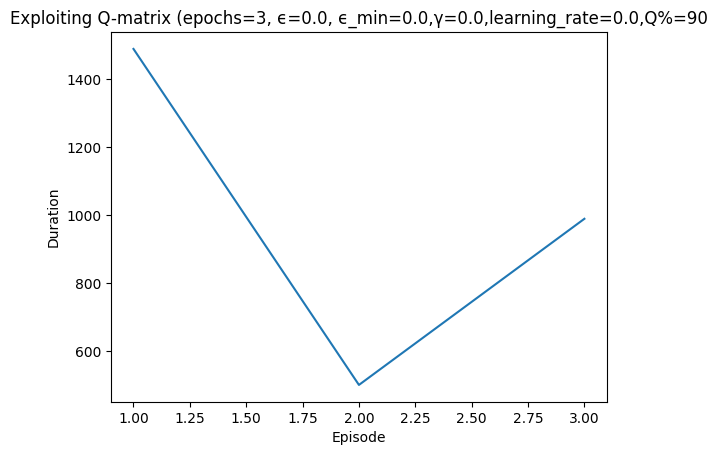

In [10]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, trained=tabularq_run["learner"], gamma=0.0, learning_rate=0.0, exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting Q-matrix",
)

In [11]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01,
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL",
)

###### DQL
Learning with: episode_count=20,iteration_count=2000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/20 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||

/home/wblum/CyberBattleSim/cyberbattle/agents/baseline/agent_dql.py:408: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 21|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:   18.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:   20.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:   20.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 54|reward:  120.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 54|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:  134.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:  134.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  140.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  140.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 87|reward:  148.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 87|reward:  148.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  154.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  154.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 139|reward:  254.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 139|reward:  254.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 1|Iteration 140|reward:  268.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 1|Iteration 140|reward:  268.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 1|Iteration 178|reward:  268.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 1|Iteration 188|reward:  272.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 1|Iteration 188|reward:  272.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 1|Iteration 199|reward:  278.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 1|Iteration 199|reward:  278.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  278.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 1|Iteration 254|reward:  278.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 1|Iteration 279|reward:  278.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 1|Iteration 296|reward:  280.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 1|Iteration 296|reward:  280.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 1|Iteration 330|reward:  280.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 1|Iteration 380|reward:  280.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 1|Iteration 431|reward:  280.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 1|Iteration 482|reward:  280.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 1|Iteration 504|reward:  380.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 1|Iteration 504|reward:  380.0|last_reward_at:  504|Elapsed Time: 0:00:00||

Episode 1|Iteration 512|reward:  380.0|last_reward_at:  504|Elapsed Time: 0:00:01||

Episode 1|Iteration 514|reward:  391.0|last_reward_at:  504|Elapsed Time: 0:00:01||

Episode 1|Iteration 514|reward:  391.0|last_reward_at:  514|Elapsed Time: 0:00:01||

Episode 1|Iteration 519|reward:  391.0|last_reward_at:  514|Elapsed Time: 0:00:01||

Episode 1|Iteration 525|reward:  391.0|last_reward_at:  514|Elapsed Time: 0:00:01||

Episode 1|Iteration 527|reward:  400.0|last_reward_at:  514|Elapsed Time: 0:00:01||

Episode 1|Iteration 527|reward:  400.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 1|Iteration 532|reward:  400.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 1|Iteration 532|reward:  406.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 1|Iteration 532|reward:  406.0|last_reward_at:  532|Elapsed Time: 0:00:01||

Episode 1|Iteration 538|reward:  406.0|last_reward_at:  532|Elapsed Time: 0:00:01||

Episode 1|Iteration 544|reward:  406.0|last_reward_at:  532|Elapsed Time: 0:00:01||

Episode 1|Iteration 547|reward:  406.0|last_reward_at:  532|Elapsed Time: 0:00:01||

Episode 1|Iteration 553|reward:  406.0|last_reward_at:  532|Elapsed Time: 0:00:01||

Episode 1|Iteration 557|reward:  406.0|last_reward_at:  532|Elapsed Time: 0:00:01||

Episode 1|Iteration 562|reward:  406.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 1|Iteration 568|reward:  406.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 1|Iteration 574|reward:  406.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 1|Iteration 580|reward:  406.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 1|Iteration 586|reward:  406.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 1|Iteration 592|reward:  406.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 1|Iteration 598|reward:  406.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 1|Iteration 601|reward:  414.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 1|Iteration 601|reward:  414.0|last_reward_at:  601|Elapsed Time: 0:00:02||

Episode 1|Iteration 607|reward:  414.0|last_reward_at:  601|Elapsed Time: 0:00:02||

Episode 1|Iteration 613|reward:  414.0|last_reward_at:  601|Elapsed Time: 0:00:02||

Episode 1|Iteration 619|reward:  414.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 1|Iteration 625|reward:  414.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 1|Iteration 631|reward:  414.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 1|Iteration 637|reward:  414.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 1|Iteration 643|reward:  414.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 1|Iteration 649|reward:  414.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 1|Iteration 655|reward:  414.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 1|Iteration 659|reward:  414.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 1|Iteration 664|reward:  414.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 1|Iteration 669|reward:  514.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 1|Iteration 669|reward:  514.0|last_reward_at:  669|Elapsed Time: 0:00:03||

Episode 1|Iteration 675|reward:  528.0|last_reward_at:  669|Elapsed Time: 0:00:04||

Episode 1|Iteration 675|reward:  528.0|last_reward_at:  675|Elapsed Time: 0:00:04||

Episode 1|Iteration 681|reward:  528.0|last_reward_at:  675|Elapsed Time: 0:00:04||

Episode 1|Iteration 687|reward:  528.0|last_reward_at:  675|Elapsed Time: 0:00:04||

Episode 1|Iteration 692|reward:  532.0|last_reward_at:  675|Elapsed Time: 0:00:04||

Episode 1|Iteration 692|reward:  532.0|last_reward_at:  692|Elapsed Time: 0:00:04||

Episode 1|Iteration 693|reward:  534.0|last_reward_at:  692|Elapsed Time: 0:00:04||

Episode 1|Iteration 693|reward:  534.0|last_reward_at:  693|Elapsed Time: 0:00:04||

Episode 1|Iteration 699|reward:  534.0|last_reward_at:  693|Elapsed Time: 0:00:04||

Episode 1|Iteration 705|reward:  534.0|last_reward_at:  693|Elapsed Time: 0:00:04||

Episode 1|Iteration 709|reward:  534.0|last_reward_at:  693|Elapsed Time: 0:00:04||

Episode 1|Iteration 714|reward:  534.0|last_reward_at:  693|Elapsed Time: 0:00:04||

Episode 1|Iteration 720|reward:  534.0|last_reward_at:  693|Elapsed Time: 0:00:04||

Episode 1|Iteration 725|reward:  534.0|last_reward_at:  693|Elapsed Time: 0:00:05||

Episode 1|Iteration 730|reward:  540.0|last_reward_at:  693|Elapsed Time: 0:00:05||

Episode 1|Iteration 730|reward:  540.0|last_reward_at:  730|Elapsed Time: 0:00:05||

Episode 1|Iteration 735|reward:  540.0|last_reward_at:  730|Elapsed Time: 0:00:05||

Episode 1|Iteration 740|reward:  540.0|last_reward_at:  730|Elapsed Time: 0:00:05||

Episode 1|Iteration 745|reward:  540.0|last_reward_at:  730|Elapsed Time: 0:00:05||

Episode 1|Iteration 751|reward:  540.0|last_reward_at:  730|Elapsed Time: 0:00:05||

Episode 1|Iteration 757|reward:  540.0|last_reward_at:  730|Elapsed Time: 0:00:05||

Episode 1|Iteration 763|reward:  540.0|last_reward_at:  730|Elapsed Time: 0:00:05||

Episode 1|Iteration 768|reward:  640.0|last_reward_at:  730|Elapsed Time: 0:00:05||

Episode 1|Iteration 768|reward:  640.0|last_reward_at:  768|Elapsed Time: 0:00:05||

Episode 1|Iteration 770|reward:  651.0|last_reward_at:  768|Elapsed Time: 0:00:05||

Episode 1|Iteration 770|reward:  651.0|last_reward_at:  770|Elapsed Time: 0:00:05||

Episode 1|Iteration 771|reward:  657.0|last_reward_at:  770|Elapsed Time: 0:00:05||

Episode 1|Iteration 771|reward:  657.0|last_reward_at:  771|Elapsed Time: 0:00:05||

Episode 1|Iteration 777|reward:  666.0|last_reward_at:  771|Elapsed Time: 0:00:06||

Episode 1|Iteration 777|reward:  666.0|last_reward_at:  777|Elapsed Time: 0:00:06||

Episode 1|Iteration 783|reward:  666.0|last_reward_at:  777|Elapsed Time: 0:00:06||

Episode 1|Iteration 789|reward:  666.0|last_reward_at:  777|Elapsed Time: 0:00:06||

Episode 1|Iteration 795|reward:  666.0|last_reward_at:  777|Elapsed Time: 0:00:06||

Episode 1|Iteration 801|reward:  666.0|last_reward_at:  777|Elapsed Time: 0:00:06||

Episode 1|Iteration 803|reward:  674.0|last_reward_at:  777|Elapsed Time: 0:00:06||

Episode 1|Iteration 803|reward:  674.0|last_reward_at:  803|Elapsed Time: 0:00:06||

Episode 1|Iteration 808|reward:  774.0|last_reward_at:  803|Elapsed Time: 0:00:06||

Episode 1|Iteration 808|reward:  774.0|last_reward_at:  808|Elapsed Time: 0:00:06||

Episode 1|Iteration 812|reward:  788.0|last_reward_at:  808|Elapsed Time: 0:00:06||

Episode 1|Iteration 812|reward:  788.0|last_reward_at:  812|Elapsed Time: 0:00:06||

Episode 1|Iteration 818|reward:  788.0|last_reward_at:  812|Elapsed Time: 0:00:06||

Episode 1|Iteration 823|reward:  788.0|last_reward_at:  812|Elapsed Time: 0:00:06||

Episode 1|Iteration 826|reward:  888.0|last_reward_at:  812|Elapsed Time: 0:00:06||

Episode 1|Iteration 826|reward:  888.0|last_reward_at:  826|Elapsed Time: 0:00:06||

Episode 1|Iteration 829|reward:  902.0|last_reward_at:  826|Elapsed Time: 0:00:06||

Episode 1|Iteration 829|reward:  902.0|last_reward_at:  829|Elapsed Time: 0:00:06||

Episode 1|Iteration 834|reward:  902.0|last_reward_at:  829|Elapsed Time: 0:00:07||

Episode 1|Iteration 838|reward: 1002.0|last_reward_at:  829|Elapsed Time: 0:00:07||

Episode 1|Iteration 838|reward: 1002.0|last_reward_at:  838|Elapsed Time: 0:00:07||

Episode 1|Iteration 844|reward: 1002.0|last_reward_at:  838|Elapsed Time: 0:00:07||

Episode 1|Iteration 845|reward: 1016.0|last_reward_at:  838|Elapsed Time: 0:00:07||

Episode 1|Iteration 845|reward: 1016.0|last_reward_at:  845|Elapsed Time: 0:00:07||

Episode 1|Iteration 850|reward: 1016.0|last_reward_at:  845|Elapsed Time: 0:00:07||

Episode 1|Iteration 853|reward: 1022.0|last_reward_at:  845|Elapsed Time: 0:00:07||

Episode 1|Iteration 853|reward: 1022.0|last_reward_at:  853|Elapsed Time: 0:00:07||

Episode 1|Iteration 859|reward: 1022.0|last_reward_at:  853|Elapsed Time: 0:00:07||

Episode 1|Iteration 863|reward: 1022.0|last_reward_at:  853|Elapsed Time: 0:00:07||

Episode 1|Iteration 864|reward: 1024.0|last_reward_at:  853|Elapsed Time: 0:00:07||

Episode 1|Iteration 864|reward: 1024.0|last_reward_at:  864|Elapsed Time: 0:00:07||

Episode 1|Iteration 869|reward: 1024.0|last_reward_at:  864|Elapsed Time: 0:00:07||

Episode 1|Iteration 872|reward: 1030.0|last_reward_at:  864|Elapsed Time: 0:00:07||

Episode 1|Iteration 872|reward: 1030.0|last_reward_at:  872|Elapsed Time: 0:00:07||

Episode 1|Iteration 874|reward: 1036.0|last_reward_at:  872|Elapsed Time: 0:00:07||

Episode 1|Iteration 874|reward: 1036.0|last_reward_at:  874|Elapsed Time: 0:00:07||

Episode 1|Iteration 876|reward: 1040.0|last_reward_at:  874|Elapsed Time: 0:00:07||

Episode 1|Iteration 876|reward: 1040.0|last_reward_at:  876|Elapsed Time: 0:00:07||

Episode 1|Iteration 880|reward: 1042.0|last_reward_at:  876|Elapsed Time: 0:00:08||

Episode 1|Iteration 880|reward: 1042.0|last_reward_at:  880|Elapsed Time: 0:00:08||

Episode 1|Iteration 886|reward: 1042.0|last_reward_at:  880|Elapsed Time: 0:00:08||

Episode 1|Iteration 890|reward: 1142.0|last_reward_at:  880|Elapsed Time: 0:00:08||

Episode 1|Iteration 890|reward: 1142.0|last_reward_at:  890|Elapsed Time: 0:00:08||

Episode 1|Iteration 893|reward: 1144.0|last_reward_at:  890|Elapsed Time: 0:00:08||

Episode 1|Iteration 893|reward: 1144.0|last_reward_at:  893|Elapsed Time: 0:00:08||

Episode 1|Iteration 894|reward: 1158.0|last_reward_at:  893|Elapsed Time: 0:00:08||

Episode 1|Iteration 894|reward: 1158.0|last_reward_at:  894|Elapsed Time: 0:00:08||

Episode 1|Iteration 900|reward: 1158.0|last_reward_at:  894|Elapsed Time: 0:00:08||

Episode 1|Iteration 904|reward: 1258.0|last_reward_at:  894|Elapsed Time: 0:00:08||

Episode 1|Iteration 904|reward: 1258.0|last_reward_at:  904|Elapsed Time: 0:00:08||

Episode 1|Iteration 905|reward: 1272.0|last_reward_at:  904|Elapsed Time: 0:00:08||

Episode 1|Iteration 905|reward: 1272.0|last_reward_at:  905|Elapsed Time: 0:00:08||

Episode 1|Iteration 911|reward: 1272.0|last_reward_at:  905|Elapsed Time: 0:00:08||

Episode 1|Iteration 917|reward: 1272.0|last_reward_at:  905|Elapsed Time: 0:00:08||

Episode 1|Iteration 923|reward: 1272.0|last_reward_at:  905|Elapsed Time: 0:00:08||

Episode 1|Iteration 928|reward: 1272.0|last_reward_at:  905|Elapsed Time: 0:00:08||

Episode 1|Iteration 931|reward: 6272.0|last_reward_at:  905|Elapsed Time: 0:00:09||

Episode 1|Iteration 931|reward: 6272.0|last_reward_at:  931|Elapsed Time: 0:00:09||

  Episode 1 ended at t=931 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/188 (0.05)
    explore-remote: 17/262 (0.06)
    explore-connect: 3/284 (0.01)
    exploit-local: 8/13 (0.38)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 8/136 (0.06)
  exploit deflected to exploration: 1
  ## Episode: 2/20 'DQL' ϵ=0.7642, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  228.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  234.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  234.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  240.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  242.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  242.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  256.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  256.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  356.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  356.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  362.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  362.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  364.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  364.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  378.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  378.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  380.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  380.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  380.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  386.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  386.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  392.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  392.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  392.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  398.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  398.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  398.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 2|Iteration 62|reward:  398.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 2|Iteration 64|reward:  406.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 2|Iteration 64|reward:  406.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 2|Iteration 70|reward:  406.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 2|Iteration 71|reward:  408.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 2|Iteration 71|reward:  408.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 2|Iteration 72|reward:  508.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 2|Iteration 72|reward:  508.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 2|Iteration 73|reward:  522.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 2|Iteration 73|reward:  522.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 2|Iteration 74|reward:  622.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 2|Iteration 74|reward:  622.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 2|Iteration 79|reward:  636.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 2|Iteration 79|reward:  636.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 2|Iteration 84|reward:  636.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 2|Iteration 91|reward:  636.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 2|Iteration 97|reward:  636.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 2|Iteration 102|reward:  636.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 2|Iteration 104|reward:  638.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 2|Iteration 104|reward:  638.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 2|Iteration 107|reward:  738.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 2|Iteration 107|reward:  738.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 2|Iteration 113|reward:  752.0|last_reward_at:  107|Elapsed Time: 0:00:02||

Episode 2|Iteration 113|reward:  752.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 2|Iteration 118|reward:  754.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 2|Iteration 118|reward:  754.0|last_reward_at:  118|Elapsed Time: 0:00:02||

Episode 2|Iteration 121|reward:  760.0|last_reward_at:  118|Elapsed Time: 0:00:02||

Episode 2|Iteration 121|reward:  760.0|last_reward_at:  121|Elapsed Time: 0:00:02||

Episode 2|Iteration 126|reward:  760.0|last_reward_at:  121|Elapsed Time: 0:00:02||

Episode 2|Iteration 131|reward:  760.0|last_reward_at:  121|Elapsed Time: 0:00:02||

Episode 2|Iteration 133|reward:  860.0|last_reward_at:  121|Elapsed Time: 0:00:02||

Episode 2|Iteration 133|reward:  860.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 2|Iteration 138|reward:  874.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 2|Iteration 138|reward:  874.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 2|Iteration 143|reward:  874.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 2|Iteration 148|reward:  874.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 2|Iteration 149|reward:  974.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 2|Iteration 149|reward:  974.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 2|Iteration 154|reward:  974.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 2|Iteration 158|reward:  988.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 2|Iteration 158|reward:  988.0|last_reward_at:  158|Elapsed Time: 0:00:03||

Episode 2|Iteration 160|reward:  994.0|last_reward_at:  158|Elapsed Time: 0:00:03||

Episode 2|Iteration 160|reward:  994.0|last_reward_at:  160|Elapsed Time: 0:00:03||

Episode 2|Iteration 161|reward: 1000.0|last_reward_at:  160|Elapsed Time: 0:00:03||

Episode 2|Iteration 161|reward: 1000.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 2|Iteration 166|reward: 1000.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 2|Iteration 167|reward: 1100.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 2|Iteration 167|reward: 1100.0|last_reward_at:  167|Elapsed Time: 0:00:03||

Episode 2|Iteration 169|reward: 1114.0|last_reward_at:  167|Elapsed Time: 0:00:03||

Episode 2|Iteration 169|reward: 1114.0|last_reward_at:  169|Elapsed Time: 0:00:03||

Episode 2|Iteration 174|reward: 1114.0|last_reward_at:  169|Elapsed Time: 0:00:03||

Episode 2|Iteration 178|reward: 1114.0|last_reward_at:  169|Elapsed Time: 0:00:03||

Episode 2|Iteration 182|reward: 1114.0|last_reward_at:  169|Elapsed Time: 0:00:03||

Episode 2|Iteration 183|reward: 1116.0|last_reward_at:  169|Elapsed Time: 0:00:03||

Episode 2|Iteration 183|reward: 1116.0|last_reward_at:  183|Elapsed Time: 0:00:03||

Episode 2|Iteration 188|reward: 1116.0|last_reward_at:  183|Elapsed Time: 0:00:03||

Episode 2|Iteration 193|reward: 1116.0|last_reward_at:  183|Elapsed Time: 0:00:03||

Episode 2|Iteration 194|reward: 1118.0|last_reward_at:  183|Elapsed Time: 0:00:03||

Episode 2|Iteration 194|reward: 1118.0|last_reward_at:  194|Elapsed Time: 0:00:03||

Episode 2|Iteration 195|reward: 1124.0|last_reward_at:  194|Elapsed Time: 0:00:03||

Episode 2|Iteration 195|reward: 1124.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 2|Iteration 196|reward: 1224.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 2|Iteration 196|reward: 1224.0|last_reward_at:  196|Elapsed Time: 0:00:03||

Episode 2|Iteration 197|reward: 1238.0|last_reward_at:  196|Elapsed Time: 0:00:03||

Episode 2|Iteration 197|reward: 1238.0|last_reward_at:  197|Elapsed Time: 0:00:03||

Episode 2|Iteration 202|reward: 1238.0|last_reward_at:  197|Elapsed Time: 0:00:04||

Episode 2|Iteration 204|reward: 6238.0|last_reward_at:  197|Elapsed Time: 0:00:04||

Episode 2|Iteration 204|reward: 6238.0|last_reward_at:  204|Elapsed Time: 0:00:04||

  Episode 2 ended at t=204 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/35 (0.19)
    explore-remote: 13/43 (0.23)
    explore-connect: 0/55 (0.00)
    exploit-local: 9/4 (0.69)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/26 (0.30)
  exploit deflected to exploration: 0
  ## Episode: 3/20 'DQL' ϵ=0.7377, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  114.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  114.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  114.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  128.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  128.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  128.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  228.0|last_reward_at:   22|Elapsed Time: 0:00:01||

Episode 3|Iteration 25|reward:  228.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 3|Iteration 27|reward:  230.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 3|Iteration 27|reward:  230.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 3|Iteration 28|reward:  232.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 3|Iteration 28|reward:  232.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 3|Iteration 29|reward:  232.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 3|Iteration 31|reward:  246.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 3|Iteration 31|reward:  246.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 3|Iteration 34|reward:  246.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 3|Iteration 38|reward:  250.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 3|Iteration 38|reward:  250.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 3|Iteration 43|reward:  350.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 3|Iteration 43|reward:  350.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 3|Iteration 44|reward:  364.0|last_reward_at:   43|Elapsed Time: 0:00:02||

Episode 3|Iteration 44|reward:  364.0|last_reward_at:   44|Elapsed Time: 0:00:02||

Episode 3|Iteration 45|reward:  370.0|last_reward_at:   44|Elapsed Time: 0:00:02||

Episode 3|Iteration 45|reward:  370.0|last_reward_at:   45|Elapsed Time: 0:00:02||

Episode 3|Iteration 48|reward:  370.0|last_reward_at:   45|Elapsed Time: 0:00:02||

Episode 3|Iteration 50|reward:  378.0|last_reward_at:   45|Elapsed Time: 0:00:02||

Episode 3|Iteration 50|reward:  378.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 3|Iteration 55|reward:  384.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 3|Iteration 55|reward:  384.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 3|Iteration 59|reward:  384.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 3|Iteration 63|reward:  384.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 3|Iteration 67|reward:  384.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 3|Iteration 72|reward:  384.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 3|Iteration 75|reward:  384.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 3|Iteration 78|reward:  384.0|last_reward_at:   55|Elapsed Time: 0:00:03||

Episode 3|Iteration 82|reward:  390.0|last_reward_at:   55|Elapsed Time: 0:00:03||

Episode 3|Iteration 82|reward:  390.0|last_reward_at:   82|Elapsed Time: 0:00:03||

Episode 3|Iteration 87|reward:  396.0|last_reward_at:   82|Elapsed Time: 0:00:03||

Episode 3|Iteration 87|reward:  396.0|last_reward_at:   87|Elapsed Time: 0:00:03||

Episode 3|Iteration 92|reward:  398.0|last_reward_at:   87|Elapsed Time: 0:00:03||

Episode 3|Iteration 92|reward:  398.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 3|Iteration 98|reward:  398.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 3|Iteration 102|reward:  398.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 3|Iteration 107|reward:  398.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 3|Iteration 113|reward:  398.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 3|Iteration 119|reward:  398.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 3|Iteration 125|reward:  398.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 3|Iteration 127|reward:  404.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 3|Iteration 127|reward:  404.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 3|Iteration 133|reward:  404.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 3|Iteration 134|reward:  504.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 3|Iteration 134|reward:  504.0|last_reward_at:  134|Elapsed Time: 0:00:04||

Episode 3|Iteration 140|reward:  504.0|last_reward_at:  134|Elapsed Time: 0:00:04||

Episode 3|Iteration 142|reward:  518.0|last_reward_at:  134|Elapsed Time: 0:00:04||

Episode 3|Iteration 142|reward:  518.0|last_reward_at:  142|Elapsed Time: 0:00:04||

Episode 3|Iteration 144|reward:  618.0|last_reward_at:  142|Elapsed Time: 0:00:04||

Episode 3|Iteration 144|reward:  618.0|last_reward_at:  144|Elapsed Time: 0:00:04||

Episode 3|Iteration 148|reward:  618.0|last_reward_at:  144|Elapsed Time: 0:00:04||

Episode 3|Iteration 149|reward:  618.0|last_reward_at:  144|Elapsed Time: 0:00:04||

Episode 3|Iteration 155|reward:  618.0|last_reward_at:  144|Elapsed Time: 0:00:04||

Episode 3|Iteration 160|reward:  618.0|last_reward_at:  144|Elapsed Time: 0:00:04||

Episode 3|Iteration 161|reward:  632.0|last_reward_at:  144|Elapsed Time: 0:00:04||

Episode 3|Iteration 161|reward:  632.0|last_reward_at:  161|Elapsed Time: 0:00:04||

Episode 3|Iteration 167|reward:  732.0|last_reward_at:  161|Elapsed Time: 0:00:04||

Episode 3|Iteration 167|reward:  732.0|last_reward_at:  167|Elapsed Time: 0:00:04||

Episode 3|Iteration 168|reward:  746.0|last_reward_at:  167|Elapsed Time: 0:00:04||

Episode 3|Iteration 168|reward:  746.0|last_reward_at:  168|Elapsed Time: 0:00:04||

Episode 3|Iteration 174|reward:  846.0|last_reward_at:  168|Elapsed Time: 0:00:05||

Episode 3|Iteration 174|reward:  846.0|last_reward_at:  174|Elapsed Time: 0:00:05||

Episode 3|Iteration 178|reward:  846.0|last_reward_at:  174|Elapsed Time: 0:00:05||

Episode 3|Iteration 178|reward:  852.0|last_reward_at:  174|Elapsed Time: 0:00:05||

Episode 3|Iteration 178|reward:  852.0|last_reward_at:  178|Elapsed Time: 0:00:05||

Episode 3|Iteration 179|reward:  866.0|last_reward_at:  178|Elapsed Time: 0:00:05||

Episode 3|Iteration 179|reward:  866.0|last_reward_at:  179|Elapsed Time: 0:00:05||

Episode 3|Iteration 181|reward:  872.0|last_reward_at:  179|Elapsed Time: 0:00:05||

Episode 3|Iteration 181|reward:  872.0|last_reward_at:  181|Elapsed Time: 0:00:05||

Episode 3|Iteration 185|reward:  972.0|last_reward_at:  181|Elapsed Time: 0:00:05||

Episode 3|Iteration 185|reward:  972.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 3|Iteration 186|reward:  986.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 3|Iteration 186|reward:  986.0|last_reward_at:  186|Elapsed Time: 0:00:05||

Episode 3|Iteration 192|reward:  986.0|last_reward_at:  186|Elapsed Time: 0:00:05||

Episode 3|Iteration 193|reward:  990.0|last_reward_at:  186|Elapsed Time: 0:00:05||

Episode 3|Iteration 193|reward:  990.0|last_reward_at:  193|Elapsed Time: 0:00:05||

Episode 3|Iteration 198|reward:  990.0|last_reward_at:  193|Elapsed Time: 0:00:05||

Episode 3|Iteration 201|reward: 1090.0|last_reward_at:  193|Elapsed Time: 0:00:05||

Episode 3|Iteration 201|reward: 1090.0|last_reward_at:  201|Elapsed Time: 0:00:05||

Episode 3|Iteration 202|reward: 1104.0|last_reward_at:  201|Elapsed Time: 0:00:05||

Episode 3|Iteration 202|reward: 1104.0|last_reward_at:  202|Elapsed Time: 0:00:05||

Episode 3|Iteration 204|reward: 1204.0|last_reward_at:  202|Elapsed Time: 0:00:05||

Episode 3|Iteration 204|reward: 1204.0|last_reward_at:  204|Elapsed Time: 0:00:05||

Episode 3|Iteration 205|reward: 1218.0|last_reward_at:  204|Elapsed Time: 0:00:05||

Episode 3|Iteration 205|reward: 1218.0|last_reward_at:  205|Elapsed Time: 0:00:05||

Episode 3|Iteration 206|reward: 1224.0|last_reward_at:  205|Elapsed Time: 0:00:05||

Episode 3|Iteration 206|reward: 1224.0|last_reward_at:  206|Elapsed Time: 0:00:05||

Episode 3|Iteration 207|reward: 1230.0|last_reward_at:  206|Elapsed Time: 0:00:05||

Episode 3|Iteration 207|reward: 1230.0|last_reward_at:  207|Elapsed Time: 0:00:05||

Episode 3|Iteration 209|reward: 1236.0|last_reward_at:  207|Elapsed Time: 0:00:05||

Episode 3|Iteration 209|reward: 1236.0|last_reward_at:  209|Elapsed Time: 0:00:05||

Episode 3|Iteration 215|reward: 1236.0|last_reward_at:  209|Elapsed Time: 0:00:05||

Episode 3|Iteration 216|reward: 1238.0|last_reward_at:  209|Elapsed Time: 0:00:05||

Episode 3|Iteration 216|reward: 1238.0|last_reward_at:  216|Elapsed Time: 0:00:05||

Episode 3|Iteration 218|reward: 1244.0|last_reward_at:  216|Elapsed Time: 0:00:05||

Episode 3|Iteration 218|reward: 1244.0|last_reward_at:  218|Elapsed Time: 0:00:05||

Episode 3|Iteration 221|reward: 1250.0|last_reward_at:  218|Elapsed Time: 0:00:06||

Episode 3|Iteration 221|reward: 1250.0|last_reward_at:  221|Elapsed Time: 0:00:06||

Episode 3|Iteration 224|reward: 1252.0|last_reward_at:  221|Elapsed Time: 0:00:06||

Episode 3|Iteration 224|reward: 1252.0|last_reward_at:  224|Elapsed Time: 0:00:06||

Episode 3|Iteration 225|reward: 6252.0|last_reward_at:  224|Elapsed Time: 0:00:06||

Episode 3|Iteration 225|reward: 6252.0|last_reward_at:  225|Elapsed Time: 0:00:06||

  Episode 3 ended at t=225 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/43 (0.02)
    explore-remote: 15/48 (0.24)
    explore-connect: 0/62 (0.00)
    exploit-local: 15/6 (0.71)
    exploit-remote: 0/6 (0.00)
    exploit-connect: 11/18 (0.38)
  exploit deflected to exploration: 4
  ## Episode: 4/20 'DQL' ϵ=0.7096, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  134.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  134.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  234.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  234.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  248.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  248.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  252.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  252.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  254.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  254.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  354.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  354.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  365.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  365.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  365.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward:  374.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward:  374.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  380.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  380.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  380.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  480.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  480.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  494.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  494.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 4|Iteration 51|reward:  594.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 4|Iteration 51|reward:  594.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 4|Iteration 52|reward:  600.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 4|Iteration 52|reward:  600.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 4|Iteration 53|reward:  614.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 4|Iteration 53|reward:  614.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 4|Iteration 57|reward:  620.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 4|Iteration 57|reward:  620.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 4|Iteration 58|reward:  720.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 4|Iteration 58|reward:  720.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 4|Iteration 61|reward:  734.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 4|Iteration 61|reward:  734.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 4|Iteration 67|reward:  740.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 4|Iteration 67|reward:  740.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 4|Iteration 68|reward:  840.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 4|Iteration 68|reward:  840.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 4|Iteration 69|reward:  846.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 4|Iteration 69|reward:  846.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 4|Iteration 70|reward:  860.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 4|Iteration 70|reward:  860.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 4|Iteration 71|reward:  960.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 4|Iteration 71|reward:  960.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 4|Iteration 74|reward:  966.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 4|Iteration 74|reward:  966.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 4|Iteration 75|reward:  980.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 4|Iteration 75|reward:  980.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 4|Iteration 78|reward:  986.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 4|Iteration 78|reward:  986.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 4|Iteration 79|reward: 1086.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 4|Iteration 79|reward: 1086.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 4|Iteration 82|reward: 1100.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 4|Iteration 82|reward: 1100.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 4|Iteration 83|reward: 1200.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 4|Iteration 83|reward: 1200.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 4|Iteration 86|reward: 1202.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 4|Iteration 86|reward: 1202.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 4|Iteration 88|reward: 1208.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 4|Iteration 88|reward: 1208.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 4|Iteration 89|reward: 1222.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 4|Iteration 89|reward: 1222.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 4|Iteration 90|reward: 1228.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 4|Iteration 90|reward: 1228.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 4|Iteration 95|reward: 1228.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 4|Iteration 97|reward: 6228.0|last_reward_at:   90|Elapsed Time: 0:00:02||

Episode 4|Iteration 97|reward: 6228.0|last_reward_at:   97|Elapsed Time: 0:00:02||

  Episode 4 ended at t=97 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/13 (0.28)
    explore-remote: 8/20 (0.29)
    explore-connect: 0/23 (0.00)
    exploit-local: 12/3 (0.80)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 3
  ## Episode: 5/20 'DQL' ϵ=0.6979, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  120.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  131.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  131.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  140.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  140.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  240.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  240.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  246.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  246.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  260.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  260.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  266.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  266.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  266.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  366.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  366.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  380.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  380.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  480.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  480.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  494.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  494.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward:  500.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward:  500.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  500.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  506.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  506.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 46|reward:  508.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 5|Iteration 46|reward:  508.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 5|Iteration 48|reward:  510.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 5|Iteration 48|reward:  510.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 5|Iteration 49|reward:  610.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 5|Iteration 49|reward:  610.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 5|Iteration 54|reward:  616.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 5|Iteration 54|reward:  616.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 5|Iteration 55|reward:  618.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 5|Iteration 55|reward:  618.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 5|Iteration 61|reward:  618.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 5|Iteration 62|reward:  632.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 5|Iteration 62|reward:  632.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 5|Iteration 66|reward:  638.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 5|Iteration 66|reward:  638.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 5|Iteration 71|reward:  638.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 5|Iteration 76|reward:  638.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 5|Iteration 80|reward:  638.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 5|Iteration 81|reward:  644.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 5|Iteration 81|reward:  644.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 5|Iteration 87|reward:  644.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 5|Iteration 88|reward:  650.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 5|Iteration 88|reward:  650.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 5|Iteration 93|reward:  650.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 5|Iteration 98|reward:  650.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 5|Iteration 102|reward:  650.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 5|Iteration 105|reward:  652.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 5|Iteration 105|reward:  652.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 5|Iteration 111|reward:  652.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 5|Iteration 116|reward:  652.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 5|Iteration 122|reward:  652.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 5|Iteration 127|reward:  652.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 5|Iteration 132|reward:  652.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 5|Iteration 137|reward:  652.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 5|Iteration 142|reward:  658.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 5|Iteration 142|reward:  658.0|last_reward_at:  142|Elapsed Time: 0:00:02||

Episode 5|Iteration 147|reward:  658.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 5|Iteration 152|reward:  658.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 5|Iteration 156|reward:  658.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 5|Iteration 161|reward:  658.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 5|Iteration 166|reward:  658.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 5|Iteration 172|reward:  658.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 5|Iteration 178|reward:  658.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 5|Iteration 183|reward:  658.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 5|Iteration 184|reward:  666.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 5|Iteration 184|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:03||

Episode 5|Iteration 189|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:03||

Episode 5|Iteration 194|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:04||

Episode 5|Iteration 200|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:04||

Episode 5|Iteration 206|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:04||

Episode 5|Iteration 212|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:04||

Episode 5|Iteration 218|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:04||

Episode 5|Iteration 224|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:04||

Episode 5|Iteration 228|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:04||

Episode 5|Iteration 233|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:04||

Episode 5|Iteration 239|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:04||

Episode 5|Iteration 245|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:04||

Episode 5|Iteration 251|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:05||

Episode 5|Iteration 257|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:05||

Episode 5|Iteration 263|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:05||

Episode 5|Iteration 269|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:05||

Episode 5|Iteration 275|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:05||

Episode 5|Iteration 279|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:05||

Episode 5|Iteration 284|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:05||

Episode 5|Iteration 290|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:05||

Episode 5|Iteration 296|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:05||

Episode 5|Iteration 302|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:05||

Episode 5|Iteration 308|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:06||

Episode 5|Iteration 313|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:06||

Episode 5|Iteration 319|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:06||

Episode 5|Iteration 324|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:06||

Episode 5|Iteration 330|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:06||

Episode 5|Iteration 335|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:06||

Episode 5|Iteration 341|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:06||

Episode 5|Iteration 346|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:06||

Episode 5|Iteration 351|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:06||

Episode 5|Iteration 355|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:07||

Episode 5|Iteration 359|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:07||

Episode 5|Iteration 365|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:07||

Episode 5|Iteration 370|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:07||

Episode 5|Iteration 375|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:07||

Episode 5|Iteration 380|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:07||

Episode 5|Iteration 385|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:07||

Episode 5|Iteration 390|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:07||

Episode 5|Iteration 395|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:07||

Episode 5|Iteration 400|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:07||

Episode 5|Iteration 403|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:08||

Episode 5|Iteration 408|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:08||

Episode 5|Iteration 413|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:08||

Episode 5|Iteration 418|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:08||

Episode 5|Iteration 424|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:08||

Episode 5|Iteration 430|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:08||

Episode 5|Iteration 435|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:08||

Episode 5|Iteration 440|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:08||

Episode 5|Iteration 446|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:08||

Episode 5|Iteration 451|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:09||

Episode 5|Iteration 456|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:09||

Episode 5|Iteration 460|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:09||

Episode 5|Iteration 465|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:09||

Episode 5|Iteration 471|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:09||

Episode 5|Iteration 477|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:09||

Episode 5|Iteration 482|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:09||

Episode 5|Iteration 487|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:09||

Episode 5|Iteration 493|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:09||

Episode 5|Iteration 499|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:10||

Episode 5|Iteration 505|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:10||

Episode 5|Iteration 511|reward:  666.0|last_reward_at:  184|Elapsed Time: 0:00:10||

Episode 5|Iteration 512|reward:  766.0|last_reward_at:  184|Elapsed Time: 0:00:10||

Episode 5|Iteration 512|reward:  766.0|last_reward_at:  512|Elapsed Time: 0:00:10||

Episode 5|Iteration 513|reward:  780.0|last_reward_at:  512|Elapsed Time: 0:00:10||

Episode 5|Iteration 513|reward:  780.0|last_reward_at:  513|Elapsed Time: 0:00:10||

Episode 5|Iteration 518|reward:  780.0|last_reward_at:  513|Elapsed Time: 0:00:10||

Episode 5|Iteration 523|reward:  780.0|last_reward_at:  513|Elapsed Time: 0:00:10||

Episode 5|Iteration 529|reward:  780.0|last_reward_at:  513|Elapsed Time: 0:00:10||

Episode 5|Iteration 532|reward:  780.0|last_reward_at:  513|Elapsed Time: 0:00:10||

Episode 5|Iteration 537|reward:  880.0|last_reward_at:  513|Elapsed Time: 0:00:10||

Episode 5|Iteration 537|reward:  880.0|last_reward_at:  537|Elapsed Time: 0:00:10||

Episode 5|Iteration 539|reward:  894.0|last_reward_at:  537|Elapsed Time: 0:00:10||

Episode 5|Iteration 539|reward:  894.0|last_reward_at:  539|Elapsed Time: 0:00:10||

Episode 5|Iteration 541|reward:  994.0|last_reward_at:  539|Elapsed Time: 0:00:10||

Episode 5|Iteration 541|reward:  994.0|last_reward_at:  541|Elapsed Time: 0:00:10||

Episode 5|Iteration 542|reward: 1008.0|last_reward_at:  541|Elapsed Time: 0:00:10||

Episode 5|Iteration 542|reward: 1008.0|last_reward_at:  542|Elapsed Time: 0:00:10||

Episode 5|Iteration 543|reward: 1014.0|last_reward_at:  542|Elapsed Time: 0:00:10||

Episode 5|Iteration 543|reward: 1014.0|last_reward_at:  543|Elapsed Time: 0:00:10||

Episode 5|Iteration 547|reward: 1114.0|last_reward_at:  543|Elapsed Time: 0:00:11||

Episode 5|Iteration 547|reward: 1114.0|last_reward_at:  547|Elapsed Time: 0:00:11||

Episode 5|Iteration 551|reward: 1114.0|last_reward_at:  547|Elapsed Time: 0:00:11||

Episode 5|Iteration 552|reward: 1128.0|last_reward_at:  547|Elapsed Time: 0:00:11||

Episode 5|Iteration 552|reward: 1128.0|last_reward_at:  552|Elapsed Time: 0:00:11||

Episode 5|Iteration 553|reward: 1228.0|last_reward_at:  552|Elapsed Time: 0:00:11||

Episode 5|Iteration 553|reward: 1228.0|last_reward_at:  553|Elapsed Time: 0:00:11||

Episode 5|Iteration 556|reward: 1234.0|last_reward_at:  553|Elapsed Time: 0:00:11||

Episode 5|Iteration 556|reward: 1234.0|last_reward_at:  556|Elapsed Time: 0:00:11||

Episode 5|Iteration 558|reward: 1248.0|last_reward_at:  556|Elapsed Time: 0:00:11||

Episode 5|Iteration 558|reward: 1248.0|last_reward_at:  558|Elapsed Time: 0:00:11||

Episode 5|Iteration 560|reward: 6248.0|last_reward_at:  558|Elapsed Time: 0:00:11||

Episode 5|Iteration 560|reward: 6248.0|last_reward_at:  560|Elapsed Time: 0:00:11||

  Episode 5 ended at t=560 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/101 (0.04)
    explore-remote: 13/120 (0.10)
    explore-connect: 0/128 (0.00)
    exploit-local: 13/5 (0.72)
    exploit-remote: 0/55 (0.00)
    exploit-connect: 11/110 (0.09)
  exploit deflected to exploration: 1
  ## Episode: 6/20 'DQL' ϵ=0.6345, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  230.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  230.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  241.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  241.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  245.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  245.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  251.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  251.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  251.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 27|reward:  257.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 27|reward:  257.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:  259.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:  259.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  261.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  261.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  261.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:  270.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:  270.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 42|reward:  270.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 6|Iteration 43|reward:  276.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 6|Iteration 43|reward:  276.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 6|Iteration 48|reward:  276.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 6|Iteration 53|reward:  276.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 6|Iteration 57|reward:  276.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 6|Iteration 59|reward:  376.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 6|Iteration 59|reward:  376.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 6|Iteration 62|reward:  390.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 6|Iteration 62|reward:  390.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 6|Iteration 63|reward:  490.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 6|Iteration 63|reward:  490.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 6|Iteration 66|reward:  504.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 6|Iteration 66|reward:  504.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 6|Iteration 72|reward:  504.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 6|Iteration 74|reward:  510.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 6|Iteration 74|reward:  510.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 6|Iteration 76|reward:  516.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 6|Iteration 76|reward:  516.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 6|Iteration 81|reward:  516.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 6|Iteration 83|reward:  520.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 6|Iteration 83|reward:  520.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 6|Iteration 88|reward:  520.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 6|Iteration 94|reward:  520.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 6|Iteration 100|reward:  520.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 6|Iteration 104|reward:  526.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 6|Iteration 104|reward:  526.0|last_reward_at:  104|Elapsed Time: 0:00:02||

Episode 6|Iteration 105|reward:  626.0|last_reward_at:  104|Elapsed Time: 0:00:02||

Episode 6|Iteration 105|reward:  626.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 6|Iteration 110|reward:  640.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 6|Iteration 110|reward:  640.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 6|Iteration 111|reward:  740.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 6|Iteration 111|reward:  740.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 6|Iteration 115|reward:  754.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 6|Iteration 115|reward:  754.0|last_reward_at:  115|Elapsed Time: 0:00:02||

Episode 6|Iteration 117|reward:  760.0|last_reward_at:  115|Elapsed Time: 0:00:02||

Episode 6|Iteration 117|reward:  760.0|last_reward_at:  117|Elapsed Time: 0:00:02||

Episode 6|Iteration 119|reward:  860.0|last_reward_at:  117|Elapsed Time: 0:00:02||

Episode 6|Iteration 119|reward:  860.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 6|Iteration 122|reward:  866.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 6|Iteration 122|reward:  866.0|last_reward_at:  122|Elapsed Time: 0:00:02||

Episode 6|Iteration 123|reward:  880.0|last_reward_at:  122|Elapsed Time: 0:00:02||

Episode 6|Iteration 123|reward:  880.0|last_reward_at:  123|Elapsed Time: 0:00:02||

Episode 6|Iteration 127|reward:  880.0|last_reward_at:  123|Elapsed Time: 0:00:02||

Episode 6|Iteration 128|reward:  886.0|last_reward_at:  123|Elapsed Time: 0:00:02||

Episode 6|Iteration 128|reward:  886.0|last_reward_at:  128|Elapsed Time: 0:00:02||

Episode 6|Iteration 130|reward:  894.0|last_reward_at:  128|Elapsed Time: 0:00:02||

Episode 6|Iteration 130|reward:  894.0|last_reward_at:  130|Elapsed Time: 0:00:02||

Episode 6|Iteration 133|reward:  994.0|last_reward_at:  130|Elapsed Time: 0:00:03||

Episode 6|Iteration 133|reward:  994.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 6|Iteration 139|reward:  994.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 6|Iteration 140|reward: 1008.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 6|Iteration 140|reward: 1008.0|last_reward_at:  140|Elapsed Time: 0:00:03||

Episode 6|Iteration 142|reward: 1014.0|last_reward_at:  140|Elapsed Time: 0:00:03||

Episode 6|Iteration 142|reward: 1014.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 6|Iteration 143|reward: 1114.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 6|Iteration 143|reward: 1114.0|last_reward_at:  143|Elapsed Time: 0:00:03||

Episode 6|Iteration 146|reward: 1128.0|last_reward_at:  143|Elapsed Time: 0:00:03||

Episode 6|Iteration 146|reward: 1128.0|last_reward_at:  146|Elapsed Time: 0:00:03||

Episode 6|Iteration 149|reward: 1228.0|last_reward_at:  146|Elapsed Time: 0:00:03||

Episode 6|Iteration 149|reward: 1228.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 6|Iteration 150|reward: 1242.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 6|Iteration 150|reward: 1242.0|last_reward_at:  150|Elapsed Time: 0:00:03||

Episode 6|Iteration 156|reward: 1242.0|last_reward_at:  150|Elapsed Time: 0:00:03||

Episode 6|Iteration 157|reward: 1248.0|last_reward_at:  150|Elapsed Time: 0:00:03||

Episode 6|Iteration 157|reward: 1248.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 6|Iteration 158|reward: 6248.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 6|Iteration 158|reward: 6248.0|last_reward_at:  158|Elapsed Time: 0:00:03||

  Episode 6 ended at t=158 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/32 (0.14)
    explore-remote: 10/35 (0.22)
    explore-connect: 0/34 (0.00)
    exploit-local: 13/2 (0.87)
    exploit-remote: 1/10 (0.09)
    exploit-connect: 11/5 (0.69)
  exploit deflected to exploration: 6
  ## Episode: 7/20 'DQL' ϵ=0.6179, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  134.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  134.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:  234.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:  234.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  248.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  248.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:  254.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:  254.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  354.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  354.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward:  356.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward:  356.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:  370.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:  370.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  378.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  378.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 34|reward:  384.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 34|reward:  384.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward:  484.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward:  484.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  498.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  498.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 42|reward:  504.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 42|reward:  504.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 7|Iteration 43|reward:  604.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 7|Iteration 43|reward:  604.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 7|Iteration 44|reward:  618.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 7|Iteration 44|reward:  618.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 7|Iteration 45|reward:  626.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 7|Iteration 45|reward:  626.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  726.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  726.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 7|Iteration 47|reward:  740.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 7|Iteration 47|reward:  740.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 7|Iteration 48|reward:  746.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 7|Iteration 48|reward:  746.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 7|Iteration 50|reward:  846.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 7|Iteration 50|reward:  846.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 7|Iteration 54|reward:  860.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 7|Iteration 54|reward:  860.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 60|reward:  860.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 63|reward:  960.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 63|reward:  960.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 7|Iteration 64|reward:  974.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 7|Iteration 64|reward:  974.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 7|Iteration 69|reward:  980.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 7|Iteration 69|reward:  980.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 7|Iteration 70|reward: 1080.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 7|Iteration 70|reward: 1080.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 7|Iteration 71|reward: 1082.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 7|Iteration 71|reward: 1082.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 7|Iteration 75|reward: 1096.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 7|Iteration 75|reward: 1096.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 7|Iteration 78|reward: 1196.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 7|Iteration 78|reward: 1196.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 7|Iteration 80|reward: 1210.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 7|Iteration 80|reward: 1210.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 7|Iteration 82|reward: 1216.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 7|Iteration 82|reward: 1216.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 7|Iteration 83|reward: 1222.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 7|Iteration 83|reward: 1222.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 7|Iteration 84|reward: 6222.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 7|Iteration 84|reward: 6222.0|last_reward_at:   84|Elapsed Time: 0:00:01||

  Episode 7 ended at t=84 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 8/19 (0.30)
    explore-connect: 1/15 (0.06)
    exploit-local: 14/1 (0.93)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/1 (0.91)
  exploit deflected to exploration: 0
  ## Episode: 8/20 'DQL' ϵ=0.6093, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  250.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  256.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  256.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  356.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  356.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:  370.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:  370.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:  470.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:  470.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:  484.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:  484.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  490.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  490.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:  590.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:  590.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward:  604.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward:  604.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:  606.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:  606.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:  608.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:  608.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:  610.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:  610.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:  710.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:  710.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward:  724.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward:  724.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 8|Iteration 43|reward:  730.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 8|Iteration 43|reward:  730.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 8|Iteration 44|reward:  830.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 8|Iteration 44|reward:  830.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 8|Iteration 45|reward:  844.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 8|Iteration 45|reward:  844.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 8|Iteration 47|reward:  944.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 8|Iteration 47|reward:  944.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:  950.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:  950.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 49|reward:  964.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 49|reward:  964.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 8|Iteration 51|reward:  970.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 8|Iteration 51|reward:  970.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 8|Iteration 52|reward:  972.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 8|Iteration 52|reward:  972.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 8|Iteration 54|reward:  978.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 8|Iteration 54|reward:  978.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 8|Iteration 55|reward:  984.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 8|Iteration 55|reward:  984.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 8|Iteration 56|reward: 1084.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 8|Iteration 56|reward: 1084.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 8|Iteration 57|reward: 1098.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 8|Iteration 57|reward: 1098.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 8|Iteration 62|reward: 1198.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 8|Iteration 62|reward: 1198.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 8|Iteration 66|reward: 1212.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 8|Iteration 66|reward: 1212.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 8|Iteration 67|reward: 1218.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 8|Iteration 67|reward: 1218.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 8|Iteration 70|reward: 6218.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 8|Iteration 70|reward: 6218.0|last_reward_at:   70|Elapsed Time: 0:00:01||

  Episode 8 ended at t=70 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 8/8 (0.50)
    explore-connect: 0/17 (0.00)
    exploit-local: 15/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 9/20 'DQL' ϵ=0.6022, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  348.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  362.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  362.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  462.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  462.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  468.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  468.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  474.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  474.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  488.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  488.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  494.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  494.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  498.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  498.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  500.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  500.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:  600.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:  600.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward:  614.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward:  614.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  714.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  714.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:  728.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:  728.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  730.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  730.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:  736.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:  736.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:  742.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:  742.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:  842.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:  842.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  856.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  856.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  956.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  956.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 40|reward:  970.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 40|reward:  970.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:  976.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:  976.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 43|reward: 1076.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 9|Iteration 43|reward: 1076.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 9|Iteration 46|reward: 1090.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 9|Iteration 46|reward: 1090.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 9|Iteration 47|reward: 1190.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 9|Iteration 47|reward: 1190.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 9|Iteration 49|reward: 1204.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 9|Iteration 49|reward: 1204.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 9|Iteration 50|reward: 1210.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 9|Iteration 50|reward: 1210.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 9|Iteration 51|reward: 6210.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 9|Iteration 51|reward: 6210.0|last_reward_at:   51|Elapsed Time: 0:00:01||

  Episode 9 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/6 (0.33)
    explore-remote: 5/2 (0.71)
    explore-connect: 0/10 (0.00)
    exploit-local: 14/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 10/20 'DQL' ϵ=0.5971, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  129.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  129.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  138.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  138.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:  144.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:  144.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  146.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  146.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  146.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward:  146.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:  146.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 37|reward:  146.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 43|reward:  146.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 44|reward:  154.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 44|reward:  154.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:  254.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:  254.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 51|reward:  268.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 51|reward:  268.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward:  368.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward:  368.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 10|Iteration 54|reward:  382.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 10|Iteration 54|reward:  382.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 10|Iteration 55|reward:  482.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 10|Iteration 55|reward:  482.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 10|Iteration 56|reward:  496.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 10|Iteration 56|reward:  496.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 10|Iteration 57|reward:  498.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 10|Iteration 57|reward:  498.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 10|Iteration 58|reward:  504.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 10|Iteration 58|reward:  504.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 10|Iteration 59|reward:  604.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 10|Iteration 59|reward:  604.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 10|Iteration 61|reward:  618.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 10|Iteration 61|reward:  618.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 10|Iteration 62|reward:  718.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 10|Iteration 62|reward:  718.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 10|Iteration 65|reward:  732.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 10|Iteration 65|reward:  732.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 10|Iteration 68|reward:  738.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 10|Iteration 68|reward:  738.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 10|Iteration 74|reward:  738.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 10|Iteration 76|reward:  744.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 10|Iteration 76|reward:  744.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 10|Iteration 77|reward:  844.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 10|Iteration 77|reward:  844.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 10|Iteration 80|reward:  846.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 10|Iteration 80|reward:  846.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 10|Iteration 83|reward:  860.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 10|Iteration 83|reward:  860.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 10|Iteration 86|reward:  862.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 10|Iteration 86|reward:  862.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 10|Iteration 88|reward:  962.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 10|Iteration 88|reward:  962.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 10|Iteration 89|reward:  976.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 10|Iteration 89|reward:  976.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 10|Iteration 91|reward:  982.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 10|Iteration 91|reward:  982.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 10|Iteration 93|reward: 1082.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 10|Iteration 93|reward: 1082.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 10|Iteration 94|reward: 1096.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 10|Iteration 94|reward: 1096.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 10|Iteration 95|reward: 1196.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 10|Iteration 95|reward: 1196.0|last_reward_at:   95|Elapsed Time: 0:00:01||

Episode 10|Iteration 98|reward: 1210.0|last_reward_at:   95|Elapsed Time: 0:00:01||

Episode 10|Iteration 98|reward: 1210.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 10|Iteration 99|reward: 1216.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 10|Iteration 99|reward: 1216.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 10|Iteration 101|reward: 1222.0|last_reward_at:   99|Elapsed Time: 0:00:02||

Episode 10|Iteration 101|reward: 1222.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 10|Iteration 102|reward: 1228.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 10|Iteration 102|reward: 1228.0|last_reward_at:  102|Elapsed Time: 0:00:02||

Episode 10|Iteration 105|reward: 1230.0|last_reward_at:  102|Elapsed Time: 0:00:02||

Episode 10|Iteration 105|reward: 1230.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 10|Iteration 106|reward: 6230.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 10|Iteration 106|reward: 6230.0|last_reward_at:  106|Elapsed Time: 0:00:02||

  Episode 10 ended at t=106 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/11 (0.15)
    explore-remote: 9/13 (0.41)
    explore-connect: 1/24 (0.04)
    exploit-local: 16/3 (0.84)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/17 (0.37)
  exploit deflected to exploration: 0
  ## Episode: 11/20 'DQL' ϵ=0.5867, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 8|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 11|Iteration 12|reward:  132.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 11|Iteration 12|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 11|Iteration 13|reward:  232.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 11|Iteration 13|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:  234.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:  234.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 11|Iteration 17|reward:  248.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 11|Iteration 17|reward:  248.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 11|Iteration 18|reward:  254.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 11|Iteration 18|reward:  254.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 11|Iteration 20|reward:  354.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 11|Iteration 20|reward:  354.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 11|Iteration 22|reward:  368.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 11|Iteration 22|reward:  368.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 11|Iteration 23|reward:  468.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 11|Iteration 23|reward:  468.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 11|Iteration 25|reward:  470.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 11|Iteration 25|reward:  470.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 11|Iteration 27|reward:  484.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 11|Iteration 27|reward:  484.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 11|Iteration 29|reward:  490.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 11|Iteration 29|reward:  490.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 11|Iteration 30|reward:  496.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 11|Iteration 30|reward:  496.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 11|Iteration 31|reward:  596.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 11|Iteration 31|reward:  596.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward:  610.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward:  610.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 33|reward:  710.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 33|reward:  710.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 11|Iteration 35|reward:  724.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 11|Iteration 35|reward:  724.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:  730.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:  730.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 39|reward:  732.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 39|reward:  732.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 11|Iteration 41|reward:  738.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 11|Iteration 41|reward:  738.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 11|Iteration 42|reward:  838.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 11|Iteration 42|reward:  838.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 11|Iteration 43|reward:  852.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 11|Iteration 43|reward:  852.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 11|Iteration 48|reward:  852.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 11|Iteration 50|reward:  854.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 11|Iteration 50|reward:  854.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 11|Iteration 51|reward:  954.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 11|Iteration 51|reward:  954.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 11|Iteration 52|reward:  968.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 11|Iteration 52|reward:  968.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 11|Iteration 53|reward:  974.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 11|Iteration 53|reward:  974.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 11|Iteration 54|reward: 1074.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 11|Iteration 54|reward: 1074.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 11|Iteration 55|reward: 1088.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 11|Iteration 55|reward: 1088.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 11|Iteration 57|reward: 1188.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 11|Iteration 57|reward: 1188.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 11|Iteration 59|reward: 1194.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 11|Iteration 59|reward: 1194.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 11|Iteration 60|reward: 1194.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 11|Iteration 61|reward: 1208.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 11|Iteration 61|reward: 1208.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 11|Iteration 63|reward: 1208.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 11|Iteration 65|reward: 1208.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 11|Iteration 67|reward: 1214.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 11|Iteration 67|reward: 1214.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 11|Iteration 68|reward: 1220.0|last_reward_at:   67|Elapsed Time: 0:00:02||

Episode 11|Iteration 68|reward: 1220.0|last_reward_at:   68|Elapsed Time: 0:00:02||

Episode 11|Iteration 71|reward: 6220.0|last_reward_at:   68|Elapsed Time: 0:00:02||

Episode 11|Iteration 71|reward: 6220.0|last_reward_at:   71|Elapsed Time: 0:00:02||

  Episode 11 ended at t=71 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 8/12 (0.40)
    explore-connect: 1/18 (0.05)
    exploit-local: 15/2 (0.88)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 12/20 'DQL' ϵ=0.5798, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 12|Iteration 10|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 12|Iteration 10|reward:  114.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 12|Iteration 13|reward:  128.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 12|Iteration 13|reward:  128.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 12|Iteration 14|reward:  130.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 12|Iteration 14|reward:  130.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 12|Iteration 15|reward:  230.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 12|Iteration 15|reward:  230.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 18|reward:  241.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 18|reward:  241.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 12|Iteration 19|reward:  247.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 12|Iteration 19|reward:  247.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 12|Iteration 24|reward:  247.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 12|Iteration 26|reward:  249.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 12|Iteration 26|reward:  249.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 12|Iteration 28|reward:  249.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 12|Iteration 31|reward:  253.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 12|Iteration 31|reward:  253.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 12|Iteration 35|reward:  253.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 12|Iteration 37|reward:  259.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 12|Iteration 37|reward:  259.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 12|Iteration 40|reward:  259.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 12|Iteration 43|reward:  259.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 12|Iteration 45|reward:  259.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 12|Iteration 47|reward:  259.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 12|Iteration 49|reward:  261.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 12|Iteration 49|reward:  261.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 12|Iteration 54|reward:  261.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 12|Iteration 55|reward:  267.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 12|Iteration 55|reward:  267.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 12|Iteration 59|reward:  267.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 12|Iteration 62|reward:  267.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 12|Iteration 64|reward:  267.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 12|Iteration 67|reward:  267.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 12|Iteration 73|reward:  267.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 12|Iteration 76|reward:  267.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 12|Iteration 76|reward:  276.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 12|Iteration 76|reward:  276.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 12|Iteration 78|reward:  376.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 12|Iteration 78|reward:  376.0|last_reward_at:   78|Elapsed Time: 0:00:02||

Episode 12|Iteration 80|reward:  390.0|last_reward_at:   78|Elapsed Time: 0:00:02||

Episode 12|Iteration 80|reward:  390.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 12|Iteration 81|reward:  490.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 12|Iteration 81|reward:  490.0|last_reward_at:   81|Elapsed Time: 0:00:02||

Episode 12|Iteration 82|reward:  504.0|last_reward_at:   81|Elapsed Time: 0:00:02||

Episode 12|Iteration 82|reward:  504.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 12|Iteration 83|reward:  510.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 12|Iteration 83|reward:  510.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 12|Iteration 84|reward:  610.0|last_reward_at:   83|Elapsed Time: 0:00:03||

Episode 12|Iteration 84|reward:  610.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 12|Iteration 85|reward:  624.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 12|Iteration 85|reward:  624.0|last_reward_at:   85|Elapsed Time: 0:00:03||

Episode 12|Iteration 87|reward:  724.0|last_reward_at:   85|Elapsed Time: 0:00:03||

Episode 12|Iteration 87|reward:  724.0|last_reward_at:   87|Elapsed Time: 0:00:03||

Episode 12|Iteration 89|reward:  738.0|last_reward_at:   87|Elapsed Time: 0:00:03||

Episode 12|Iteration 89|reward:  738.0|last_reward_at:   89|Elapsed Time: 0:00:03||

Episode 12|Iteration 91|reward:  838.0|last_reward_at:   89|Elapsed Time: 0:00:03||

Episode 12|Iteration 91|reward:  838.0|last_reward_at:   91|Elapsed Time: 0:00:03||

Episode 12|Iteration 93|reward:  844.0|last_reward_at:   91|Elapsed Time: 0:00:03||

Episode 12|Iteration 93|reward:  844.0|last_reward_at:   93|Elapsed Time: 0:00:03||

Episode 12|Iteration 94|reward:  858.0|last_reward_at:   93|Elapsed Time: 0:00:03||

Episode 12|Iteration 94|reward:  858.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 12|Iteration 95|reward:  958.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 12|Iteration 95|reward:  958.0|last_reward_at:   95|Elapsed Time: 0:00:03||

Episode 12|Iteration 100|reward:  958.0|last_reward_at:   95|Elapsed Time: 0:00:03||

Episode 12|Iteration 102|reward:  960.0|last_reward_at:   95|Elapsed Time: 0:00:03||

Episode 12|Iteration 102|reward:  960.0|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 12|Iteration 104|reward:  974.0|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 12|Iteration 104|reward:  974.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 12|Iteration 106|reward:  980.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 12|Iteration 106|reward:  980.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 12|Iteration 109|reward:  986.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 12|Iteration 109|reward:  986.0|last_reward_at:  109|Elapsed Time: 0:00:03||

Episode 12|Iteration 110|reward:  992.0|last_reward_at:  109|Elapsed Time: 0:00:03||

Episode 12|Iteration 110|reward:  992.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 12|Iteration 113|reward:  998.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 12|Iteration 113|reward:  998.0|last_reward_at:  113|Elapsed Time: 0:00:03||

Episode 12|Iteration 114|reward: 1098.0|last_reward_at:  113|Elapsed Time: 0:00:03||

Episode 12|Iteration 114|reward: 1098.0|last_reward_at:  114|Elapsed Time: 0:00:03||

Episode 12|Iteration 115|reward: 1112.0|last_reward_at:  114|Elapsed Time: 0:00:03||

Episode 12|Iteration 115|reward: 1112.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 12|Iteration 116|reward: 1212.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 12|Iteration 116|reward: 1212.0|last_reward_at:  116|Elapsed Time: 0:00:03||

Episode 12|Iteration 118|reward: 1226.0|last_reward_at:  116|Elapsed Time: 0:00:03||

Episode 12|Iteration 118|reward: 1226.0|last_reward_at:  118|Elapsed Time: 0:00:03||

Episode 12|Iteration 119|reward: 6226.0|last_reward_at:  118|Elapsed Time: 0:00:03||

Episode 12|Iteration 119|reward: 6226.0|last_reward_at:  119|Elapsed Time: 0:00:03||

  Episode 12 ended at t=119 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/17 (0.19)
    explore-remote: 10/27 (0.27)
    explore-connect: 0/33 (0.00)
    exploit-local: 12/4 (0.75)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 16
  ## Episode: 13/20 'DQL' ϵ=0.5685, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 7|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 8|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 8|reward:  125.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:  127.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:  129.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:  129.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 12|reward:  137.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 12|reward:  137.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 13|Iteration 13|reward:  146.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 13|Iteration 13|reward:  146.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 13|Iteration 14|reward:  246.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 13|Iteration 14|reward:  246.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 13|Iteration 15|reward:  260.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 13|Iteration 15|reward:  260.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 13|Iteration 19|reward:  360.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 13|Iteration 19|reward:  360.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 13|Iteration 20|reward:  366.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 13|Iteration 20|reward:  366.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 13|Iteration 21|reward:  380.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 13|Iteration 21|reward:  380.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 13|Iteration 24|reward:  480.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 13|Iteration 24|reward:  480.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 13|Iteration 25|reward:  494.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 13|Iteration 25|reward:  494.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 13|Iteration 28|reward:  500.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 13|Iteration 28|reward:  500.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 13|Iteration 29|reward:  600.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 13|Iteration 29|reward:  600.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 13|Iteration 32|reward:  614.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 13|Iteration 32|reward:  614.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 13|Iteration 33|reward:  714.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 13|Iteration 33|reward:  714.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 13|Iteration 34|reward:  728.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 13|Iteration 34|reward:  728.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 13|Iteration 35|reward:  734.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 13|Iteration 35|reward:  734.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 13|Iteration 36|reward:  740.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 13|Iteration 36|reward:  740.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 13|Iteration 41|reward:  742.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 13|Iteration 41|reward:  742.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 13|Iteration 42|reward:  842.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 13|Iteration 42|reward:  842.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 13|Iteration 43|reward:  856.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 13|Iteration 43|reward:  856.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 13|Iteration 44|reward:  956.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 13|Iteration 44|reward:  956.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 13|Iteration 45|reward:  970.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 13|Iteration 45|reward:  970.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 13|Iteration 46|reward: 1070.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 13|Iteration 46|reward: 1070.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 13|Iteration 48|reward: 1084.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 13|Iteration 48|reward: 1084.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 13|Iteration 49|reward: 1184.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 13|Iteration 49|reward: 1184.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 13|Iteration 50|reward: 1198.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 13|Iteration 50|reward: 1198.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 13|Iteration 51|reward: 6198.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 13|Iteration 51|reward: 6198.0|last_reward_at:   51|Elapsed Time: 0:00:01||

  Episode 13 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 7/6 (0.54)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 3
  ## Episode: 14/20 'DQL' ϵ=0.5638, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 7|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 7|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 9|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 9|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 14|Iteration 14|reward:  132.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 14|Iteration 14|reward:  132.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 14|Iteration 15|reward:  232.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 14|Iteration 15|reward:  232.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 14|Iteration 16|reward:  246.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 14|Iteration 16|reward:  246.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 14|Iteration 17|reward:  250.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 14|Iteration 17|reward:  250.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 14|Iteration 21|reward:  350.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 14|Iteration 21|reward:  350.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:  364.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:  364.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 14|Iteration 23|reward:  464.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 14|Iteration 23|reward:  464.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 14|Iteration 24|reward:  478.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 14|Iteration 24|reward:  478.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 14|Iteration 25|reward:  578.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 14|Iteration 25|reward:  578.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:  592.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:  592.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 27|reward:  594.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 27|reward:  594.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 14|Iteration 29|reward:  694.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 14|Iteration 29|reward:  694.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 14|Iteration 30|reward:  708.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 14|Iteration 30|reward:  708.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 14|Iteration 31|reward:  808.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 14|Iteration 31|reward:  808.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 14|Iteration 32|reward:  822.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 14|Iteration 32|reward:  822.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 14|Iteration 34|reward:  922.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 14|Iteration 34|reward:  922.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 14|Iteration 37|reward:  928.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 14|Iteration 37|reward:  928.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 39|reward:  942.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 39|reward:  942.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 14|Iteration 40|reward: 1042.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 14|Iteration 40|reward: 1042.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 14|Iteration 41|reward: 1056.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 14|Iteration 41|reward: 1056.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 14|Iteration 42|reward: 1156.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 14|Iteration 42|reward: 1156.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 14|Iteration 43|reward: 1162.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 14|Iteration 43|reward: 1162.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 14|Iteration 44|reward: 1164.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 14|Iteration 44|reward: 1164.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 14|Iteration 45|reward: 1178.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 14|Iteration 45|reward: 1178.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 14|Iteration 47|reward: 6178.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 14|Iteration 47|reward: 6178.0|last_reward_at:   47|Elapsed Time: 0:00:01||

  Episode 14 ended at t=47 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 5/10 (0.33)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 15/20 'DQL' ϵ=0.5594, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 8|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 8|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 11|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 11|reward:  130.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 15|Iteration 12|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 15|Iteration 12|reward:  230.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:  244.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:  244.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 15|Iteration 16|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 15|Iteration 16|reward:  344.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 15|Iteration 17|reward:  358.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 15|Iteration 17|reward:  358.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 15|Iteration 18|reward:  458.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 15|Iteration 18|reward:  458.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 15|Iteration 20|reward:  464.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 15|Iteration 20|reward:  464.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 22|reward:  478.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 22|reward:  478.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 15|Iteration 25|reward:  578.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 15|Iteration 25|reward:  578.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 15|Iteration 31|reward:  578.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 15|Iteration 32|reward:  592.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 15|Iteration 32|reward:  592.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 15|Iteration 37|reward:  692.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 15|Iteration 37|reward:  692.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 38|reward:  706.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 38|reward:  706.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 15|Iteration 39|reward:  806.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 15|Iteration 39|reward:  806.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 15|Iteration 40|reward:  820.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 15|Iteration 40|reward:  820.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 15|Iteration 41|reward:  920.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 15|Iteration 41|reward:  920.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 15|Iteration 43|reward:  934.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 15|Iteration 43|reward:  934.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 15|Iteration 44|reward: 1034.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 15|Iteration 44|reward: 1034.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 15|Iteration 45|reward: 1048.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 15|Iteration 45|reward: 1048.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 15|Iteration 46|reward: 1050.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 15|Iteration 46|reward: 1050.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 15|Iteration 51|reward: 1050.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 15|Iteration 51|reward: 1150.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 15|Iteration 51|reward: 1150.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 15|Iteration 52|reward: 1164.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 15|Iteration 52|reward: 1164.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 15|Iteration 53|reward: 6164.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 15|Iteration 53|reward: 6164.0|last_reward_at:   53|Elapsed Time: 0:00:01||

  Episode 15 ended at t=53 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/20 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 16/20 'DQL' ϵ=0.5546, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 6|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 16|Iteration 9|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 16|Iteration 9|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 16|Iteration 10|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 16|Iteration 10|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 13|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 13|reward:  248.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 16|Iteration 18|reward:  250.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 16|Iteration 18|reward:  250.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 16|Iteration 20|reward:  256.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 16|Iteration 20|reward:  256.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 16|Iteration 25|reward:  256.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 16|Iteration 27|reward:  258.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 16|Iteration 27|reward:  258.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 16|Iteration 32|reward:  258.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 16|Iteration 38|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 16|Iteration 38|reward:  264.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 16|Iteration 43|reward:  264.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 16|Iteration 48|reward:  264.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 16|Iteration 50|reward:  364.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 16|Iteration 50|reward:  364.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 16|Iteration 51|reward:  378.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 16|Iteration 51|reward:  378.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 16|Iteration 53|reward:  478.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 16|Iteration 53|reward:  478.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 16|Iteration 54|reward:  492.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 16|Iteration 54|reward:  492.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 16|Iteration 56|reward:  592.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 16|Iteration 56|reward:  592.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 16|Iteration 57|reward:  598.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 16|Iteration 57|reward:  598.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 16|Iteration 59|reward:  612.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 16|Iteration 59|reward:  612.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 16|Iteration 60|reward:  712.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 16|Iteration 60|reward:  712.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 16|Iteration 61|reward:  726.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 16|Iteration 61|reward:  726.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 16|Iteration 62|reward:  826.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 16|Iteration 62|reward:  826.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 16|Iteration 63|reward:  828.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 16|Iteration 63|reward:  828.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 16|Iteration 65|reward:  842.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 16|Iteration 65|reward:  842.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 16|Iteration 67|reward:  942.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 16|Iteration 67|reward:  942.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 16|Iteration 70|reward:  956.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 16|Iteration 70|reward:  956.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 16|Iteration 72|reward: 1056.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 16|Iteration 72|reward: 1056.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 16|Iteration 74|reward: 1058.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 16|Iteration 74|reward: 1058.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 16|Iteration 75|reward: 1072.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 16|Iteration 75|reward: 1072.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 16|Iteration 76|reward: 1172.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 16|Iteration 76|reward: 1172.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 16|Iteration 78|reward: 1186.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 16|Iteration 78|reward: 1186.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 16|Iteration 80|reward: 1192.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 16|Iteration 80|reward: 1192.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 16|Iteration 82|reward: 1198.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 16|Iteration 82|reward: 1198.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 16|Iteration 83|reward: 1200.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 16|Iteration 83|reward: 1200.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 16|Iteration 87|reward: 6200.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 16|Iteration 87|reward: 6200.0|last_reward_at:   87|Elapsed Time: 0:00:01||

  Episode 16 ended at t=87 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 6/12 (0.33)
    explore-connect: 0/20 (0.00)
    exploit-local: 11/1 (0.92)
    exploit-remote: 3/11 (0.21)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 17/20 'DQL' ϵ=0.5468, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:  136.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 6|reward:  142.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 6|reward:  142.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 17|Iteration 8|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 17|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  256.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 12|reward:  356.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 12|reward:  356.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 13|reward:  362.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 13|reward:  362.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 17|Iteration 15|reward:  376.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 17|Iteration 15|reward:  376.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 17|reward:  378.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 17|reward:  378.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:  478.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:  478.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 20|reward:  492.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 20|reward:  492.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:  494.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:  494.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 26|reward:  594.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 26|reward:  594.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:  608.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:  608.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 17|Iteration 29|reward:  708.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 17|Iteration 29|reward:  708.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 17|Iteration 30|reward:  722.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 17|Iteration 30|reward:  722.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 17|Iteration 31|reward:  822.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 17|Iteration 31|reward:  822.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 17|Iteration 33|reward:  836.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 17|Iteration 33|reward:  836.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 17|Iteration 38|reward:  936.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 17|Iteration 38|reward:  936.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 17|Iteration 40|reward:  950.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 17|Iteration 40|reward:  950.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 17|Iteration 41|reward: 1050.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 17|Iteration 41|reward: 1050.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 17|Iteration 42|reward: 1064.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 17|Iteration 42|reward: 1064.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 17|Iteration 43|reward: 1164.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 17|Iteration 43|reward: 1164.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 17|Iteration 44|reward: 1178.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 17|Iteration 44|reward: 1178.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 17|Iteration 48|reward: 1178.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 17|Iteration 50|reward: 1180.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 17|Iteration 50|reward: 1180.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 17|Iteration 52|reward: 1182.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 17|Iteration 52|reward: 1182.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 17|Iteration 56|reward: 6182.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 17|Iteration 56|reward: 6182.0|last_reward_at:   56|Elapsed Time: 0:00:01||

  Episode 17 ended at t=56 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 6/5 (0.55)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 18/20 'DQL' ϵ=0.5418, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:  132.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:  138.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:  138.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 18|Iteration 6|reward:  238.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 18|Iteration 6|reward:  238.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 9|reward:  252.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 9|reward:  252.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 18|Iteration 14|reward:  352.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 18|Iteration 14|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 18|Iteration 17|reward:  366.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 18|Iteration 17|reward:  366.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 18|Iteration 18|reward:  466.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 18|Iteration 18|reward:  466.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 18|Iteration 19|reward:  480.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 18|Iteration 19|reward:  480.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 18|Iteration 20|reward:  482.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 18|Iteration 20|reward:  482.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 18|Iteration 22|reward:  582.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 18|Iteration 22|reward:  582.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 18|Iteration 24|reward:  596.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 18|Iteration 24|reward:  596.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 18|Iteration 28|reward:  696.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 18|Iteration 28|reward:  696.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 18|Iteration 30|reward:  710.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 18|Iteration 30|reward:  710.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 18|Iteration 31|reward:  810.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 18|Iteration 31|reward:  810.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 18|Iteration 33|reward:  816.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 18|Iteration 33|reward:  816.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 18|Iteration 36|reward:  830.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 18|Iteration 36|reward:  830.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 18|Iteration 37|reward:  930.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 18|Iteration 37|reward:  930.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 18|Iteration 38|reward:  944.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 18|Iteration 38|reward:  944.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 18|Iteration 40|reward: 1044.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 18|Iteration 40|reward: 1044.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 18|Iteration 41|reward: 1050.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 18|Iteration 41|reward: 1050.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 18|Iteration 42|reward: 1052.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 18|Iteration 42|reward: 1052.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 18|Iteration 43|reward: 1066.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 18|Iteration 43|reward: 1066.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 18|Iteration 44|reward: 1166.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 18|Iteration 44|reward: 1166.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 18|Iteration 46|reward: 1180.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 18|Iteration 46|reward: 1180.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 18|Iteration 47|reward: 1186.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 18|Iteration 47|reward: 1186.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 18|Iteration 48|reward: 6186.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 18|Iteration 48|reward: 6186.0|last_reward_at:   48|Elapsed Time: 0:00:01||

  Episode 18 ended at t=48 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 7/4 (0.64)
    explore-connect: 0/10 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 19/20 'DQL' ϵ=0.5376, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 8|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 19|Iteration 10|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 19|Iteration 10|reward:  356.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 19|Iteration 11|reward:  456.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 19|Iteration 11|reward:  456.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:  470.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:  470.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 15|reward:  570.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 15|reward:  570.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 19|Iteration 19|reward:  584.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 19|Iteration 19|reward:  584.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 19|Iteration 21|reward:  586.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 19|Iteration 21|reward:  586.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 19|Iteration 22|reward:  686.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 19|Iteration 22|reward:  686.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 19|Iteration 24|reward:  692.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 19|Iteration 24|reward:  692.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 19|Iteration 26|reward:  698.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 19|Iteration 26|reward:  698.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 19|Iteration 27|reward:  712.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 19|Iteration 27|reward:  712.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 19|Iteration 30|reward:  718.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 19|Iteration 30|reward:  718.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 19|Iteration 32|reward:  818.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 19|Iteration 32|reward:  818.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 19|Iteration 33|reward:  820.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 19|Iteration 33|reward:  820.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 19|Iteration 34|reward:  834.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 19|Iteration 34|reward:  834.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 19|Iteration 35|reward:  934.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 19|Iteration 35|reward:  934.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 19|Iteration 36|reward:  948.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 19|Iteration 36|reward:  948.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 19|Iteration 37|reward: 1048.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 19|Iteration 37|reward: 1048.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 19|Iteration 39|reward: 1062.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 19|Iteration 39|reward: 1062.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 19|Iteration 40|reward: 1064.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 19|Iteration 40|reward: 1064.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 19|Iteration 41|reward: 1164.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 19|Iteration 41|reward: 1164.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 19|Iteration 43|reward: 1178.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 19|Iteration 43|reward: 1178.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 19|Iteration 44|reward: 6178.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 19|Iteration 44|reward: 6178.0|last_reward_at:   44|Elapsed Time: 0:00:01||

  Episode 19 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 6/2 (0.75)
    explore-connect: 0/12 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 20/20 'DQL' ϵ=0.5337, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 9|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 9|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 10|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 10|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 20|Iteration 12|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 20|Iteration 12|reward:  118.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:  118.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 23|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 23|reward:  132.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 24|reward:  232.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 24|reward:  232.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 20|Iteration 25|reward:  246.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 20|Iteration 25|reward:  246.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 20|Iteration 26|reward:  346.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 20|Iteration 26|reward:  346.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 20|Iteration 27|reward:  360.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 20|Iteration 27|reward:  360.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 20|Iteration 28|reward:  368.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 20|Iteration 28|reward:  368.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 20|Iteration 29|reward:  468.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 20|Iteration 29|reward:  468.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 20|Iteration 31|reward:  474.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 20|Iteration 31|reward:  474.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 20|Iteration 35|reward:  488.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 20|Iteration 35|reward:  488.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 20|Iteration 36|reward:  494.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 20|Iteration 36|reward:  494.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 20|Iteration 37|reward:  594.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 20|Iteration 37|reward:  594.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 38|reward:  608.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 38|reward:  608.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 20|Iteration 39|reward:  708.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 20|Iteration 39|reward:  708.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 20|Iteration 44|reward:  722.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 20|Iteration 44|reward:  722.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 20|Iteration 45|reward:  728.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 20|Iteration 45|reward:  728.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 20|Iteration 46|reward:  734.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 20|Iteration 46|reward:  734.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 20|Iteration 47|reward:  834.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 20|Iteration 47|reward:  834.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 20|Iteration 48|reward:  848.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 20|Iteration 48|reward:  848.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 20|Iteration 50|reward:  948.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 20|Iteration 50|reward:  948.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 20|Iteration 51|reward:  962.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 20|Iteration 51|reward:  962.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 20|Iteration 53|reward: 1062.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 20|Iteration 53|reward: 1062.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 20|Iteration 56|reward: 1076.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 20|Iteration 56|reward: 1076.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 20|Iteration 57|reward: 1176.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 20|Iteration 57|reward: 1176.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 20|Iteration 58|reward: 1190.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 20|Iteration 58|reward: 1190.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 20|Iteration 60|reward: 6190.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 20|Iteration 60|reward: 6190.0|last_reward_at:   60|Elapsed Time: 0:00:01||

  Episode 20 ended at t=60 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 4/11 (0.27)
    explore-connect: 1/15 (0.06)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 1
simulation ended


In [12]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run["learner"],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL",
)

###### Exploiting DQL
Learning with: episode_count=3,iteration_count=2000,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/3 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 1 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 2/3 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 2 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 3/3 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 3 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


In [13]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search",
)

###### Random search
Learning with: episode_count=3,iteration_count=2000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/3 'Random search' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:   18.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:   20.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:   20.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  120.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  120.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  134.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  134.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  142.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  142.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  148.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  148.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:  154.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:  154.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 127|reward:  154.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 140|reward:  254.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 140|reward:  254.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 1|Iteration 183|reward:  265.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 1|Iteration 183|reward:  265.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  269.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  269.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 1|Iteration 218|reward:  271.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 1|Iteration 218|reward:  271.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 1|Iteration 238|reward:  280.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 1|Iteration 238|reward:  280.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 1|Iteration 304|reward:  280.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 1|Iteration 355|reward:  280.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 1|Iteration 406|reward:  280.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 1|Iteration 454|reward:  380.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 1|Iteration 454|reward:  380.0|last_reward_at:  454|Elapsed Time: 0:00:00||

Episode 1|Iteration 491|reward:  391.0|last_reward_at:  454|Elapsed Time: 0:00:00||

Episode 1|Iteration 491|reward:  391.0|last_reward_at:  491|Elapsed Time: 0:00:00||

Episode 1|Iteration 496|reward:  397.0|last_reward_at:  491|Elapsed Time: 0:00:00||

Episode 1|Iteration 496|reward:  397.0|last_reward_at:  496|Elapsed Time: 0:00:00||

Episode 1|Iteration 524|reward:  405.0|last_reward_at:  496|Elapsed Time: 0:00:00||

Episode 1|Iteration 524|reward:  405.0|last_reward_at:  524|Elapsed Time: 0:00:00||

Episode 1|Iteration 571|reward:  414.0|last_reward_at:  524|Elapsed Time: 0:00:00||

Episode 1|Iteration 571|reward:  414.0|last_reward_at:  571|Elapsed Time: 0:00:00||

Episode 1|Iteration 633|reward:  414.0|last_reward_at:  571|Elapsed Time: 0:00:00||

Episode 1|Iteration 684|reward:  414.0|last_reward_at:  571|Elapsed Time: 0:00:00||

Episode 1|Iteration 735|reward:  414.0|last_reward_at:  571|Elapsed Time: 0:00:00||

Episode 1|Iteration 785|reward:  414.0|last_reward_at:  571|Elapsed Time: 0:00:00||

Episode 1|Iteration 836|reward:  414.0|last_reward_at:  571|Elapsed Time: 0:00:00||

Episode 1|Iteration 887|reward:  414.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 1|Iteration 937|reward:  414.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 1|Iteration 988|reward:  414.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 1|Iteration 1038|reward:  414.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 1|Iteration 1089|reward:  414.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 1|Iteration 1140|reward:  414.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 1|Iteration 1190|reward:  414.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 1|Iteration 1241|reward:  414.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 1|Iteration 1283|reward:  514.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 1|Iteration 1283|reward:  514.0|last_reward_at: 1283|Elapsed Time: 0:00:01||

Episode 1|Iteration 1288|reward:  528.0|last_reward_at: 1283|Elapsed Time: 0:00:01||

Episode 1|Iteration 1288|reward:  528.0|last_reward_at: 1288|Elapsed Time: 0:00:01||

Episode 1|Iteration 1304|reward:  530.0|last_reward_at: 1288|Elapsed Time: 0:00:01||

Episode 1|Iteration 1304|reward:  530.0|last_reward_at: 1304|Elapsed Time: 0:00:01||

Episode 1|Iteration 1313|reward:  534.0|last_reward_at: 1304|Elapsed Time: 0:00:01||

Episode 1|Iteration 1313|reward:  534.0|last_reward_at: 1313|Elapsed Time: 0:00:01||

Episode 1|Iteration 1351|reward:  540.0|last_reward_at: 1313|Elapsed Time: 0:00:01||

Episode 1|Iteration 1351|reward:  540.0|last_reward_at: 1351|Elapsed Time: 0:00:01||

Episode 1|Iteration 1393|reward:  540.0|last_reward_at: 1351|Elapsed Time: 0:00:01||

Episode 1|Iteration 1444|reward:  540.0|last_reward_at: 1351|Elapsed Time: 0:00:01||

Episode 1|Iteration 1494|reward:  540.0|last_reward_at: 1351|Elapsed Time: 0:00:01||

Episode 1|Iteration 1545|reward:  540.0|last_reward_at: 1351|Elapsed Time: 0:00:01||

Episode 1|Iteration 1595|reward:  540.0|last_reward_at: 1351|Elapsed Time: 0:00:02||

Episode 1|Iteration 1646|reward:  540.0|last_reward_at: 1351|Elapsed Time: 0:00:02||

Episode 1|Iteration 1697|reward:  540.0|last_reward_at: 1351|Elapsed Time: 0:00:02||

Episode 1|Iteration 1747|reward:  540.0|last_reward_at: 1351|Elapsed Time: 0:00:02||

Episode 1|Iteration 1798|reward:  540.0|last_reward_at: 1351|Elapsed Time: 0:00:02||

Episode 1|Iteration 1849|reward:  540.0|last_reward_at: 1351|Elapsed Time: 0:00:02||

Episode 1|Iteration 1899|reward:  540.0|last_reward_at: 1351|Elapsed Time: 0:00:02||

Episode 1|Iteration 1950|reward:  540.0|last_reward_at: 1351|Elapsed Time: 0:00:02||

Episode 1|Iteration 2000|reward:  540.0|last_reward_at: 1351|Elapsed Time: 0:00:02||

Episode 1|Iteration 2000|reward:  540.0|last_reward_at: 1351|Elapsed Time: 0:00:02||

  Episode 1 stopped at t=2000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/515 (0.02)
    explore-remote: 10/711 (0.01)
    explore-connect: 4/751 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/3 'Random search' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:   20.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 101|reward:  120.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 101|reward:  120.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 2|Iteration 127|reward:  134.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 2|Iteration 127|reward:  134.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 2|Iteration 134|reward:  140.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 2|Iteration 134|reward:  140.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 2|Iteration 155|reward:  240.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 2|Iteration 155|reward:  240.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 2|Iteration 156|reward:  251.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 2|Iteration 156|reward:  251.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 2|Iteration 158|reward:  253.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 2|Iteration 158|reward:  253.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 2|Iteration 161|reward:  259.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 2|Iteration 161|reward:  259.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 2|Iteration 164|reward:  265.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 2|Iteration 164|reward:  265.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 2|Iteration 184|reward:  274.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 2|Iteration 184|reward:  274.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 2|Iteration 211|reward:  278.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 2|Iteration 211|reward:  278.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 2|Iteration 279|reward:  278.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 2|Iteration 355|reward:  278.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 2|Iteration 406|reward:  278.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 2|Iteration 482|reward:  278.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 2|Iteration 532|reward:  278.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 2|Iteration 583|reward:  278.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 2|Iteration 659|reward:  278.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 2|Iteration 709|reward:  278.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 2|Iteration 709|reward:  378.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 2|Iteration 709|reward:  378.0|last_reward_at:  709|Elapsed Time: 0:00:00||

Episode 2|Iteration 710|reward:  392.0|last_reward_at:  709|Elapsed Time: 0:00:00||

Episode 2|Iteration 710|reward:  392.0|last_reward_at:  710|Elapsed Time: 0:00:00||

Episode 2|Iteration 718|reward:  400.0|last_reward_at:  710|Elapsed Time: 0:00:00||

Episode 2|Iteration 718|reward:  400.0|last_reward_at:  718|Elapsed Time: 0:00:00||

Episode 2|Iteration 721|reward:  406.0|last_reward_at:  718|Elapsed Time: 0:00:00||

Episode 2|Iteration 721|reward:  406.0|last_reward_at:  721|Elapsed Time: 0:00:00||

Episode 2|Iteration 785|reward:  406.0|last_reward_at:  721|Elapsed Time: 0:00:00||

Episode 2|Iteration 836|reward:  406.0|last_reward_at:  721|Elapsed Time: 0:00:00||

Episode 2|Iteration 871|reward:  412.0|last_reward_at:  721|Elapsed Time: 0:00:00||

Episode 2|Iteration 871|reward:  412.0|last_reward_at:  871|Elapsed Time: 0:00:00||

Episode 2|Iteration 937|reward:  412.0|last_reward_at:  871|Elapsed Time: 0:00:00||

Episode 2|Iteration 988|reward:  412.0|last_reward_at:  871|Elapsed Time: 0:00:01||

Episode 2|Iteration 1038|reward:  412.0|last_reward_at:  871|Elapsed Time: 0:00:01||

Episode 2|Iteration 1089|reward:  412.0|last_reward_at:  871|Elapsed Time: 0:00:01||

Episode 2|Iteration 1140|reward:  412.0|last_reward_at:  871|Elapsed Time: 0:00:01||

Episode 2|Iteration 1190|reward:  412.0|last_reward_at:  871|Elapsed Time: 0:00:01||

Episode 2|Iteration 1207|reward:  512.0|last_reward_at:  871|Elapsed Time: 0:00:01||

Episode 2|Iteration 1207|reward:  512.0|last_reward_at: 1207|Elapsed Time: 0:00:01||

Episode 2|Iteration 1214|reward:  526.0|last_reward_at: 1207|Elapsed Time: 0:00:01||

Episode 2|Iteration 1214|reward:  526.0|last_reward_at: 1214|Elapsed Time: 0:00:01||

Episode 2|Iteration 1220|reward:  530.0|last_reward_at: 1214|Elapsed Time: 0:00:01||

Episode 2|Iteration 1220|reward:  530.0|last_reward_at: 1220|Elapsed Time: 0:00:01||

Episode 2|Iteration 1253|reward:  630.0|last_reward_at: 1220|Elapsed Time: 0:00:01||

Episode 2|Iteration 1253|reward:  630.0|last_reward_at: 1253|Elapsed Time: 0:00:01||

Episode 2|Iteration 1255|reward:  632.0|last_reward_at: 1253|Elapsed Time: 0:00:01||

Episode 2|Iteration 1255|reward:  632.0|last_reward_at: 1255|Elapsed Time: 0:00:01||

Episode 2|Iteration 1292|reward:  632.0|last_reward_at: 1255|Elapsed Time: 0:00:01||

Episode 2|Iteration 1320|reward:  643.0|last_reward_at: 1255|Elapsed Time: 0:00:01||

Episode 2|Iteration 1320|reward:  643.0|last_reward_at: 1320|Elapsed Time: 0:00:01||

Episode 2|Iteration 1321|reward:  649.0|last_reward_at: 1320|Elapsed Time: 0:00:01||

Episode 2|Iteration 1321|reward:  649.0|last_reward_at: 1321|Elapsed Time: 0:00:01||

Episode 2|Iteration 1359|reward:  657.0|last_reward_at: 1321|Elapsed Time: 0:00:01||

Episode 2|Iteration 1359|reward:  657.0|last_reward_at: 1359|Elapsed Time: 0:00:01||

Episode 2|Iteration 1393|reward:  657.0|last_reward_at: 1359|Elapsed Time: 0:00:01||

Episode 2|Iteration 1444|reward:  657.0|last_reward_at: 1359|Elapsed Time: 0:00:01||

Episode 2|Iteration 1444|reward:  663.0|last_reward_at: 1359|Elapsed Time: 0:00:01||

Episode 2|Iteration 1444|reward:  663.0|last_reward_at: 1444|Elapsed Time: 0:00:01||

Episode 2|Iteration 1456|reward:  672.0|last_reward_at: 1444|Elapsed Time: 0:00:01||

Episode 2|Iteration 1456|reward:  672.0|last_reward_at: 1456|Elapsed Time: 0:00:01||

Episode 2|Iteration 1461|reward:  772.0|last_reward_at: 1456|Elapsed Time: 0:00:01||

Episode 2|Iteration 1461|reward:  772.0|last_reward_at: 1461|Elapsed Time: 0:00:01||

Episode 2|Iteration 1469|reward:  786.0|last_reward_at: 1461|Elapsed Time: 0:00:01||

Episode 2|Iteration 1469|reward:  786.0|last_reward_at: 1469|Elapsed Time: 0:00:01||

Episode 2|Iteration 1516|reward:  790.0|last_reward_at: 1469|Elapsed Time: 0:00:01||

Episode 2|Iteration 1516|reward:  790.0|last_reward_at: 1516|Elapsed Time: 0:00:01||

Episode 2|Iteration 1545|reward:  790.0|last_reward_at: 1516|Elapsed Time: 0:00:01||

Episode 2|Iteration 1565|reward:  796.0|last_reward_at: 1516|Elapsed Time: 0:00:01||

Episode 2|Iteration 1565|reward:  796.0|last_reward_at: 1565|Elapsed Time: 0:00:01||

Episode 2|Iteration 1573|reward:  798.0|last_reward_at: 1565|Elapsed Time: 0:00:01||

Episode 2|Iteration 1573|reward:  798.0|last_reward_at: 1573|Elapsed Time: 0:00:01||

Episode 2|Iteration 1621|reward:  798.0|last_reward_at: 1573|Elapsed Time: 0:00:02||

Episode 2|Iteration 1646|reward:  798.0|last_reward_at: 1573|Elapsed Time: 0:00:02||

Episode 2|Iteration 1666|reward:  898.0|last_reward_at: 1573|Elapsed Time: 0:00:02||

Episode 2|Iteration 1666|reward:  898.0|last_reward_at: 1666|Elapsed Time: 0:00:02||

Episode 2|Iteration 1692|reward:  912.0|last_reward_at: 1666|Elapsed Time: 0:00:02||

Episode 2|Iteration 1692|reward:  912.0|last_reward_at: 1692|Elapsed Time: 0:00:02||

Episode 2|Iteration 1720|reward:  918.0|last_reward_at: 1692|Elapsed Time: 0:00:02||

Episode 2|Iteration 1720|reward:  918.0|last_reward_at: 1720|Elapsed Time: 0:00:02||

Episode 2|Iteration 1729|reward:  926.0|last_reward_at: 1720|Elapsed Time: 0:00:02||

Episode 2|Iteration 1729|reward:  926.0|last_reward_at: 1729|Elapsed Time: 0:00:02||

Episode 2|Iteration 1769|reward:  926.0|last_reward_at: 1729|Elapsed Time: 0:00:02||

Episode 2|Iteration 1798|reward:  926.0|last_reward_at: 1729|Elapsed Time: 0:00:02||

Episode 2|Iteration 1821|reward:  932.0|last_reward_at: 1729|Elapsed Time: 0:00:02||

Episode 2|Iteration 1821|reward:  932.0|last_reward_at: 1821|Elapsed Time: 0:00:02||

Episode 2|Iteration 1849|reward:  932.0|last_reward_at: 1821|Elapsed Time: 0:00:02||

Episode 2|Iteration 1874|reward:  932.0|last_reward_at: 1821|Elapsed Time: 0:00:02||

Episode 2|Iteration 1899|reward:  932.0|last_reward_at: 1821|Elapsed Time: 0:00:02||

Episode 2|Iteration 1925|reward:  932.0|last_reward_at: 1821|Elapsed Time: 0:00:02||

Episode 2|Iteration 1950|reward:  932.0|last_reward_at: 1821|Elapsed Time: 0:00:02||

Episode 2|Iteration 1975|reward:  932.0|last_reward_at: 1821|Elapsed Time: 0:00:02||

Episode 2|Iteration 2000|reward:  932.0|last_reward_at: 1821|Elapsed Time: 0:00:02||

Episode 2|Iteration 2000|reward:  932.0|last_reward_at: 1821|Elapsed Time: 0:00:02||

  Episode 2 stopped at t=2000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/474 (0.03)
    explore-remote: 16/754 (0.02)
    explore-connect: 7/734 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/3 'Random search' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   16.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:   20.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:   20.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 107|reward:  120.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 107|reward:  120.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 110|reward:  131.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 110|reward:  131.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  139.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  139.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 3|Iteration 120|reward:  148.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 3|Iteration 120|reward:  148.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 3|Iteration 131|reward:  154.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 3|Iteration 131|reward:  154.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 3|Iteration 203|reward:  154.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 3|Iteration 214|reward:  254.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 3|Iteration 214|reward:  254.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 3|Iteration 233|reward:  265.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 3|Iteration 233|reward:  265.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 3|Iteration 234|reward:  269.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 3|Iteration 234|reward:  269.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 3|Iteration 247|reward:  271.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 3|Iteration 247|reward:  271.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 3|Iteration 304|reward:  271.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 3|Iteration 342|reward:  280.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 3|Iteration 342|reward:  280.0|last_reward_at:  342|Elapsed Time: 0:00:00||

Episode 3|Iteration 355|reward:  380.0|last_reward_at:  342|Elapsed Time: 0:00:00||

Episode 3|Iteration 355|reward:  380.0|last_reward_at:  355|Elapsed Time: 0:00:00||

Episode 3|Iteration 359|reward:  391.0|last_reward_at:  355|Elapsed Time: 0:00:00||

Episode 3|Iteration 359|reward:  391.0|last_reward_at:  359|Elapsed Time: 0:00:00||

Episode 3|Iteration 360|reward:  399.0|last_reward_at:  359|Elapsed Time: 0:00:00||

Episode 3|Iteration 360|reward:  399.0|last_reward_at:  360|Elapsed Time: 0:00:00||

Episode 3|Iteration 384|reward:  405.0|last_reward_at:  360|Elapsed Time: 0:00:00||

Episode 3|Iteration 384|reward:  405.0|last_reward_at:  384|Elapsed Time: 0:00:00||

Episode 3|Iteration 407|reward:  414.0|last_reward_at:  384|Elapsed Time: 0:00:00||

Episode 3|Iteration 407|reward:  414.0|last_reward_at:  407|Elapsed Time: 0:00:00||

Episode 3|Iteration 456|reward:  414.0|last_reward_at:  407|Elapsed Time: 0:00:00||

Episode 3|Iteration 473|reward:  514.0|last_reward_at:  407|Elapsed Time: 0:00:00||

Episode 3|Iteration 473|reward:  514.0|last_reward_at:  473|Elapsed Time: 0:00:00||

Episode 3|Iteration 516|reward:  525.0|last_reward_at:  473|Elapsed Time: 0:00:00||

Episode 3|Iteration 516|reward:  525.0|last_reward_at:  516|Elapsed Time: 0:00:00||

Episode 3|Iteration 524|reward:  527.0|last_reward_at:  516|Elapsed Time: 0:00:00||

Episode 3|Iteration 524|reward:  527.0|last_reward_at:  524|Elapsed Time: 0:00:00||

Episode 3|Iteration 527|reward:  531.0|last_reward_at:  524|Elapsed Time: 0:00:00||

Episode 3|Iteration 527|reward:  531.0|last_reward_at:  527|Elapsed Time: 0:00:00||

Episode 3|Iteration 583|reward:  531.0|last_reward_at:  527|Elapsed Time: 0:00:00||

Episode 3|Iteration 633|reward:  531.0|last_reward_at:  527|Elapsed Time: 0:00:00||

Episode 3|Iteration 684|reward:  531.0|last_reward_at:  527|Elapsed Time: 0:00:00||

Episode 3|Iteration 714|reward:  540.0|last_reward_at:  527|Elapsed Time: 0:00:00||

Episode 3|Iteration 714|reward:  540.0|last_reward_at:  714|Elapsed Time: 0:00:00||

Episode 3|Iteration 759|reward:  640.0|last_reward_at:  714|Elapsed Time: 0:00:00||

Episode 3|Iteration 759|reward:  640.0|last_reward_at:  759|Elapsed Time: 0:00:00||

Episode 3|Iteration 811|reward:  640.0|last_reward_at:  759|Elapsed Time: 0:00:00||

Episode 3|Iteration 824|reward:  651.0|last_reward_at:  759|Elapsed Time: 0:00:01||

Episode 3|Iteration 824|reward:  651.0|last_reward_at:  824|Elapsed Time: 0:00:01||

Episode 3|Iteration 844|reward:  659.0|last_reward_at:  824|Elapsed Time: 0:00:01||

Episode 3|Iteration 844|reward:  659.0|last_reward_at:  844|Elapsed Time: 0:00:01||

Episode 3|Iteration 850|reward:  665.0|last_reward_at:  844|Elapsed Time: 0:00:01||

Episode 3|Iteration 850|reward:  665.0|last_reward_at:  850|Elapsed Time: 0:00:01||

Episode 3|Iteration 877|reward:  674.0|last_reward_at:  850|Elapsed Time: 0:00:01||

Episode 3|Iteration 877|reward:  674.0|last_reward_at:  877|Elapsed Time: 0:00:01||

Episode 3|Iteration 912|reward:  674.0|last_reward_at:  877|Elapsed Time: 0:00:01||

Episode 3|Iteration 963|reward:  674.0|last_reward_at:  877|Elapsed Time: 0:00:01||

Episode 3|Iteration 1013|reward:  674.0|last_reward_at:  877|Elapsed Time: 0:00:01||

Episode 3|Iteration 1064|reward:  674.0|last_reward_at:  877|Elapsed Time: 0:00:01||

Episode 3|Iteration 1069|reward:  774.0|last_reward_at:  877|Elapsed Time: 0:00:01||

Episode 3|Iteration 1069|reward:  774.0|last_reward_at: 1069|Elapsed Time: 0:00:01||

Episode 3|Iteration 1114|reward:  774.0|last_reward_at: 1069|Elapsed Time: 0:00:01||

Episode 3|Iteration 1127|reward:  788.0|last_reward_at: 1069|Elapsed Time: 0:00:01||

Episode 3|Iteration 1127|reward:  788.0|last_reward_at: 1127|Elapsed Time: 0:00:01||

Episode 3|Iteration 1138|reward:  790.0|last_reward_at: 1127|Elapsed Time: 0:00:01||

Episode 3|Iteration 1138|reward:  790.0|last_reward_at: 1138|Elapsed Time: 0:00:01||

Episode 3|Iteration 1165|reward:  790.0|last_reward_at: 1138|Elapsed Time: 0:00:01||

Episode 3|Iteration 1190|reward:  790.0|last_reward_at: 1138|Elapsed Time: 0:00:01||

Episode 3|Iteration 1216|reward:  790.0|last_reward_at: 1138|Elapsed Time: 0:00:01||

Episode 3|Iteration 1216|reward:  796.0|last_reward_at: 1138|Elapsed Time: 0:00:01||

Episode 3|Iteration 1216|reward:  796.0|last_reward_at: 1216|Elapsed Time: 0:00:01||

Episode 3|Iteration 1231|reward:  800.0|last_reward_at: 1216|Elapsed Time: 0:00:01||

Episode 3|Iteration 1231|reward:  800.0|last_reward_at: 1231|Elapsed Time: 0:00:01||

Episode 3|Iteration 1266|reward:  800.0|last_reward_at: 1231|Elapsed Time: 0:00:01||

Episode 3|Iteration 1317|reward:  800.0|last_reward_at: 1231|Elapsed Time: 0:00:01||

Episode 3|Iteration 1368|reward:  800.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 3|Iteration 1393|reward:  800.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 3|Iteration 1444|reward:  800.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 3|Iteration 1494|reward:  800.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 3|Iteration 1545|reward:  800.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 3|Iteration 1595|reward:  800.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 3|Iteration 1646|reward:  800.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 3|Iteration 1697|reward:  800.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 3|Iteration 1747|reward:  800.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 3|Iteration 1773|reward:  800.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 3|Iteration 1823|reward:  800.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 3|Iteration 1874|reward:  800.0|last_reward_at: 1231|Elapsed Time: 0:00:02||

Episode 3|Iteration 1925|reward:  800.0|last_reward_at: 1231|Elapsed Time: 0:00:03||

Episode 3|Iteration 1973|reward:  900.0|last_reward_at: 1231|Elapsed Time: 0:00:03||

Episode 3|Iteration 1973|reward:  900.0|last_reward_at: 1973|Elapsed Time: 0:00:03||

Episode 3|Iteration 2000|reward:  900.0|last_reward_at: 1973|Elapsed Time: 0:00:03||

Episode 3|Iteration 2000|reward:  900.0|last_reward_at: 1973|Elapsed Time: 0:00:03||

  Episode 3 stopped at t=2000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/498 (0.03)
    explore-remote: 14/715 (0.02)
    explore-connect: 7/753 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


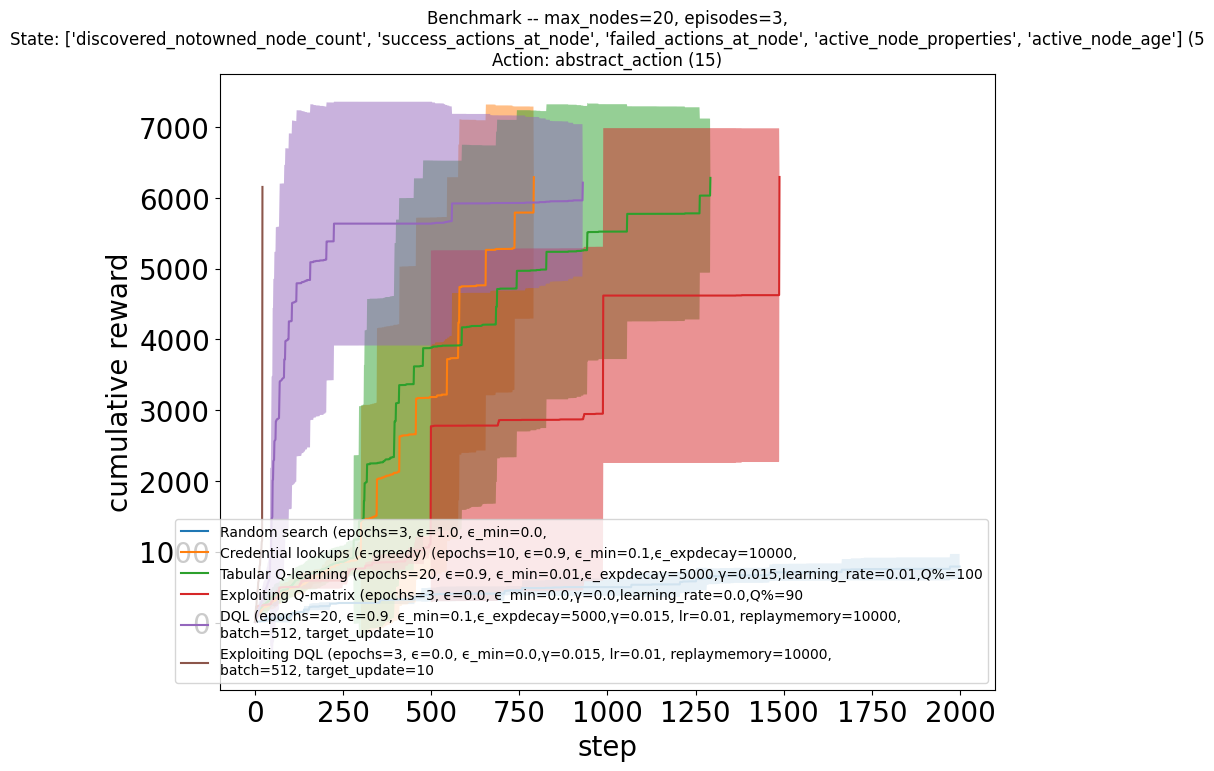

In [14]:
# Compare and plot results for all the agents
all_runs = [random_run, credlookup_run, tabularq_run, tabularq_exploit_run, dql_run, dql_exploit_run]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n"
    f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
    f"({len(themodel.state_space.feature_selection)}\n"
    f"Action: abstract_action ({themodel.action_space.flat_size()})",
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumrewards.png"),
)

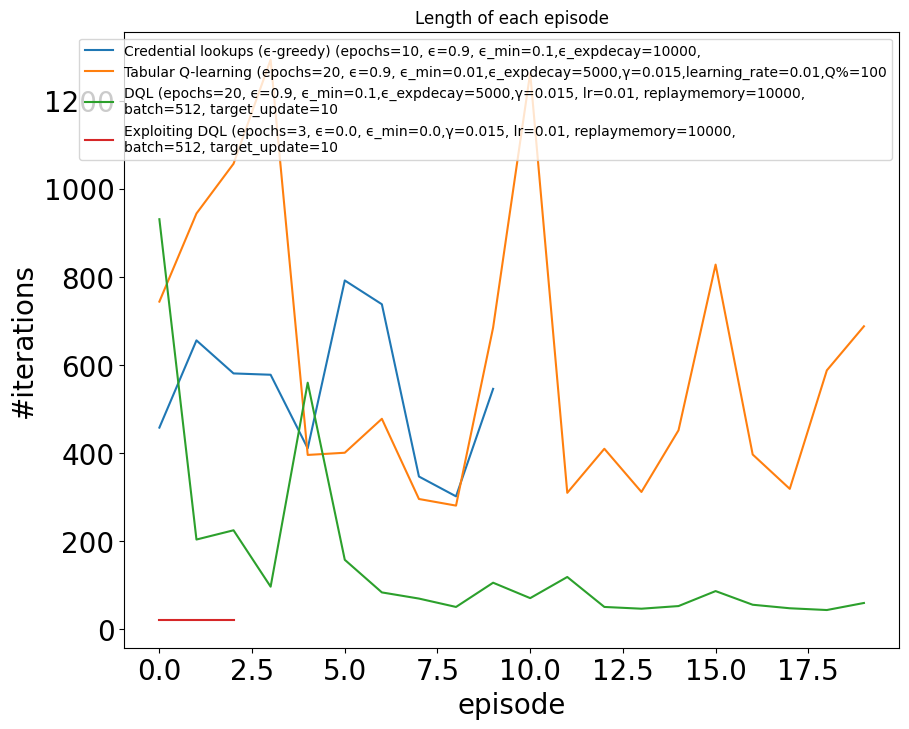

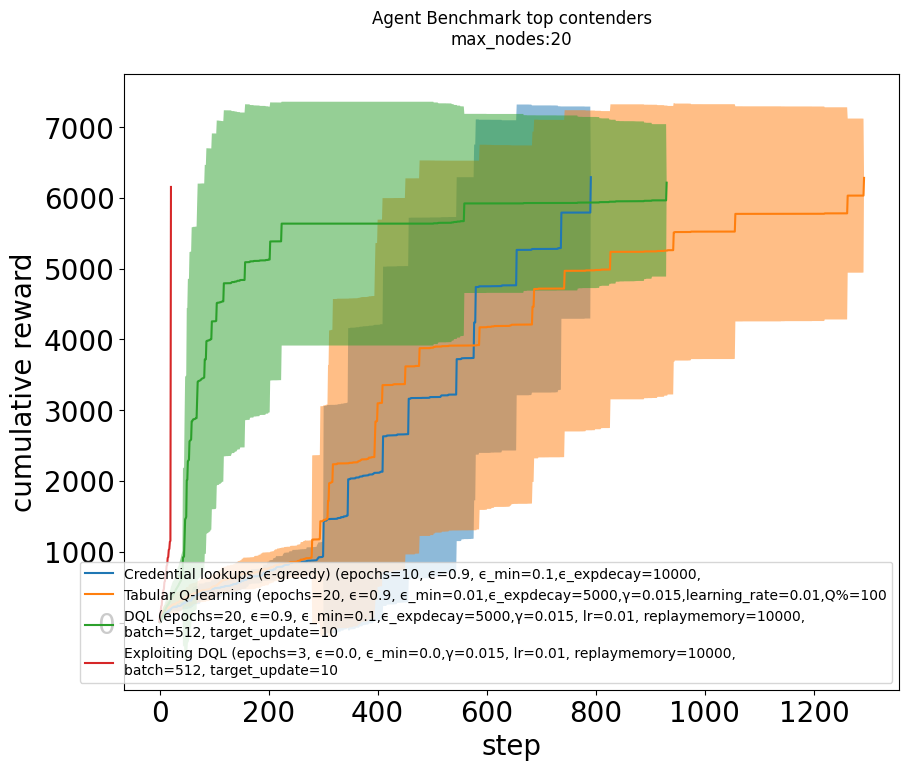

In [15]:
contenders = [credlookup_run, tabularq_run, dql_run, dql_exploit_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(title=f"Agent Benchmark top contenders\n" f"max_nodes:{ep.maximum_node_count}\n", all_runs=contenders,
                                    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumreward_contenders.png"))

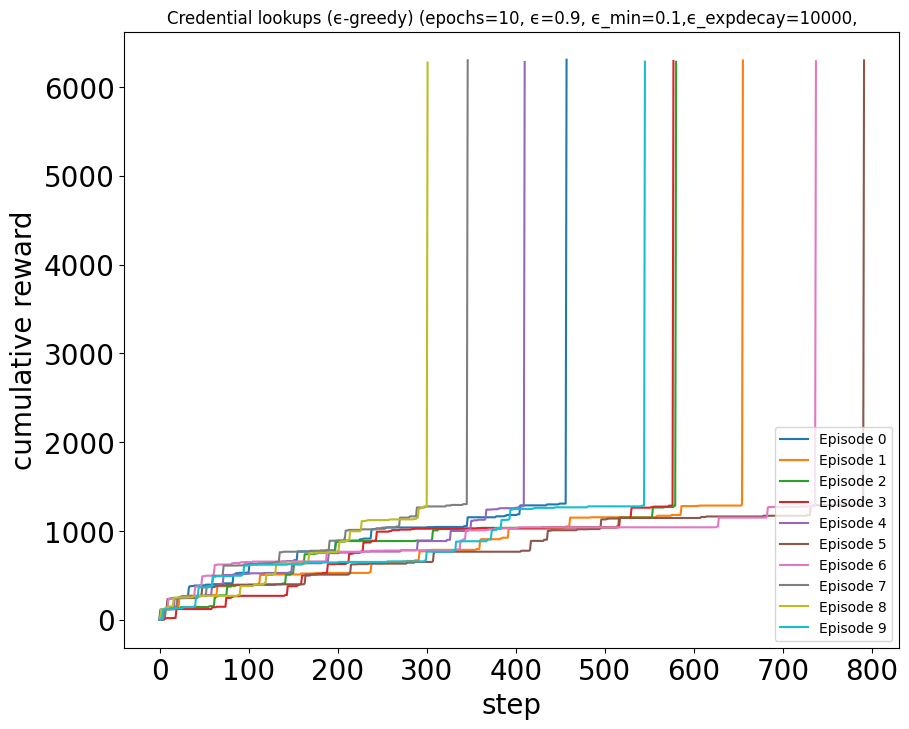

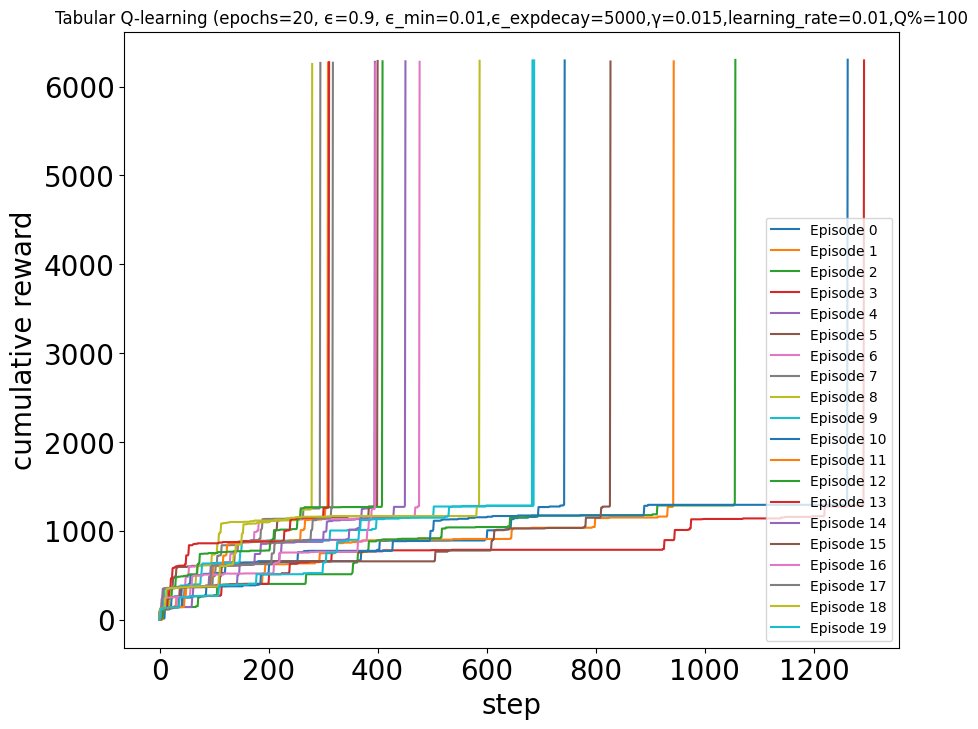

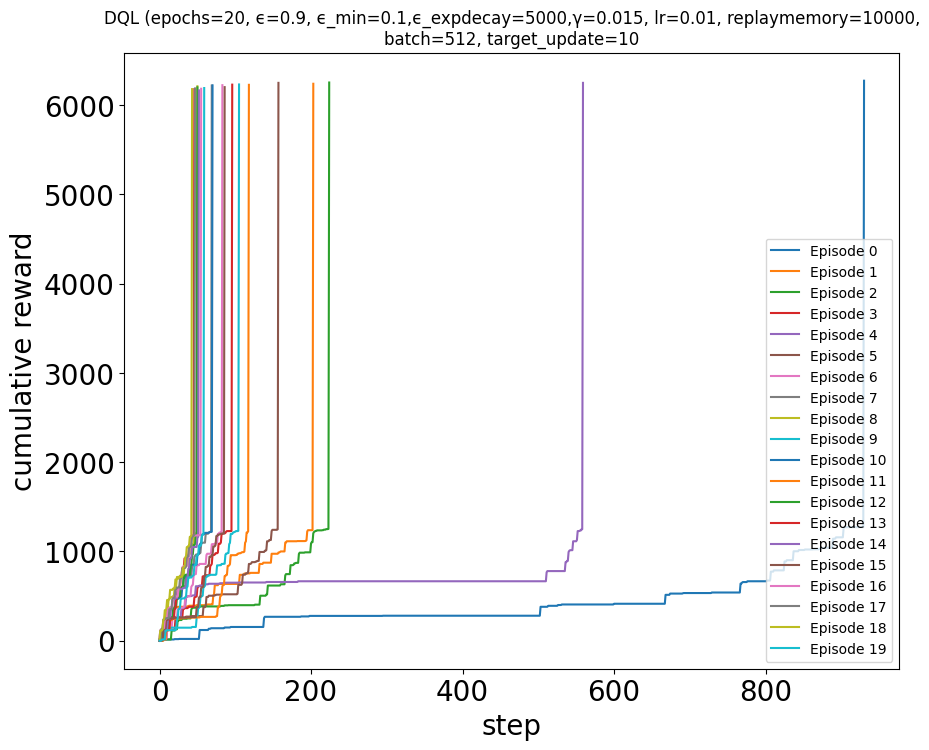

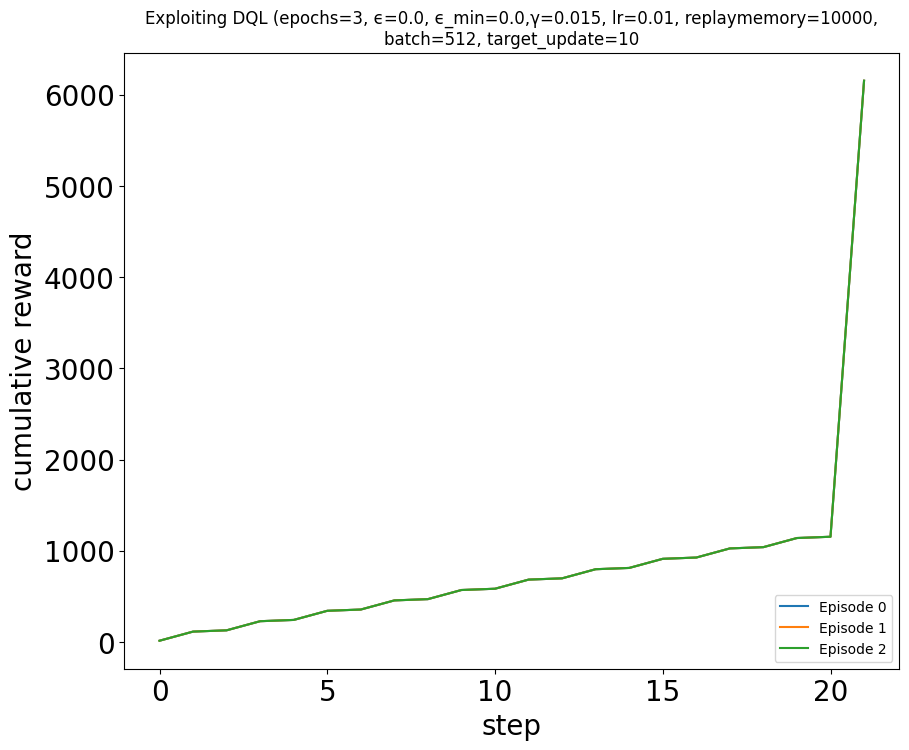

In [16]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)